In [1]:
import pandas as pd
import numpy as np
import glob
from scipy import stats

In [2]:
print(pd.__version__)

1.4.4


In [3]:
carpeta="data/base_training_QQP_salida/"

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/base_training_QQP_salida\\pTEST_new_0.05_0.csv.pickle'

In [6]:
df= pd.read_pickle(a[0])
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.14889279, 0.104384616, 0.0161...","[0.7330875, 0.26503438, 0.001878084]","[0.0, 1.0, 0.0]",0,1446,entailment,neutral
1,1,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, couple{couple,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17860392, 0.1662...","[0.839204, 0.15999468, 0.0008013443]","[0.0, 1.0, 0.0]",0,2160,entailment,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, tan{tan,NOUN}, -{...","[NULL{null,ADJ}, a{a,DET}, man{man,NOUN}, sitt...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.12952...","[0.9210948, 0.0663313, 0.012574027]","[1.0, 0.0, 0.0]",0,4171,entailment,entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, sign{sign,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, giant{giant,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17921524, 0.1633...","[0.63405293, 0.32265246, 0.04329467]","[0.0, 1.0, 0.0]",0,5885,entailment,neutral
4,4,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.9157257, 0.08173129, 0.0025429872]","[1.0, 0.0, 0.0]",0,1252,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wa...","[NULL{null,ADJ}, almost{almost,ADV}, had{have,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.23029745, 0.09098914, 0.02092...","[0.008494461, 0.9910766, 0.0004290199]","[0.0, 1.0, 0.0]",1,9681,neutral,neutral
598,598,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, what{what,NOUN}, are{be,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.011193112, 0.0606...","[0.065547444, 0.22682504, 0.70762753]","[0.0, 0.0, 1.0]",1,9694,contradiction,contradiction
599,599,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, a{a,DET}, red{red,ADJ}, pla...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.06875465, 0.1684...","[0.003225121, 0.9687075, 0.0280674]","[0.0, 1.0, 0.0]",1,9695,neutral,neutral
600,600,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,INTJ}, what{what,NOUN}, if{if,ADP},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.24369477, 0.08687...","[0.772184, 0.20669158, 0.021124437]","[1.0, 0.0, 0.0]",1,9697,entailment,entailment


In [7]:
df.Hipotesis[0]

['NULL{null,ADJ}',
 'times{time,NOUN}',
 'square{square,ADJ}',
 'is{be,VERB}',
 'packed{pack,VERB}',
 '.{.,PUNCT}']

In [8]:
df.Text[0]

['NULL{null,ADJ}',
 'times{time,NOUN}',
 'square{square,ADJ}',
 'in{in,ADP}',
 'new{new,ADJ}',
 'york{york,NOUN}',
 '.{.,PUNCT}']

In [9]:
print(len(df.Hipotesis[0]))
print(len(df.Text[0]))

6
7


In [10]:
m=df.M_Align[0][1:11,1:10]

In [11]:
m

array([[1.5194842e+00, 1.2662871e-01, 6.5819025e-02, 6.2051970e-01,
        2.1054387e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.2662871e-01, 3.3272541e+00, 3.0331423e-03, 1.0245488e+00,
        3.1034287e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [5.8184113e-02, 2.4350184e-01, 3.4059514e-03, 3.8123831e-02,
        1.6951300e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [3.0574179e-01, 4.8497349e-01, 1.4442946e-02, 5.8939111e-01,
        5.8835471e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [2.7953646e-01, 2.0574427e+00, 2.0795504e-02, 6.3406491e-01,
        4.8893265e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [2.1054387e-02, 3.1034287e-02, 1.0016573e-02, 1.4475664e-02,
        3.2226380e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.

In [12]:
import scipy.stats

In [13]:
c=np.corrcoef(m)

c:\Users\Ninja\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\Ninja\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [14]:
c

array([[1.        , 0.01544493, 0.15213736, 0.53714905, 0.10276868,
        0.32361168,        nan,        nan,        nan,        nan],
       [0.01544493, 1.        , 0.96269538, 0.73042985, 0.99540974,
        0.56392626,        nan,        nan,        nan,        nan],
       [0.15213736, 0.96269538, 1.        , 0.67626601, 0.97929469,
        0.65526463,        nan,        nan,        nan,        nan],
       [0.53714905, 0.73042985, 0.67626601, 1.        , 0.75689947,
        0.5175216 ,        nan,        nan,        nan,        nan],
       [0.10276868, 0.99540974, 0.97929469, 0.75689947, 1.        ,
        0.60298998,        nan,        nan,        nan,        nan],
       [0.32361168, 0.56392626, 0.65526463, 0.5175216 , 0.60298998,
        1.        ,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        na

In [15]:
import seaborn as sns

In [16]:
df.Hipotesis[0]

['NULL{null,ADJ}',
 'times{time,NOUN}',
 'square{square,ADJ}',
 'is{be,VERB}',
 'packed{pack,VERB}',
 '.{.,PUNCT}']

In [17]:
df.Text[0]

['NULL{null,ADJ}',
 'times{time,NOUN}',
 'square{square,ADJ}',
 'in{in,ADP}',
 'new{new,ADJ}',
 'york{york,NOUN}',
 '.{.,PUNCT}']

<AxesSubplot:>

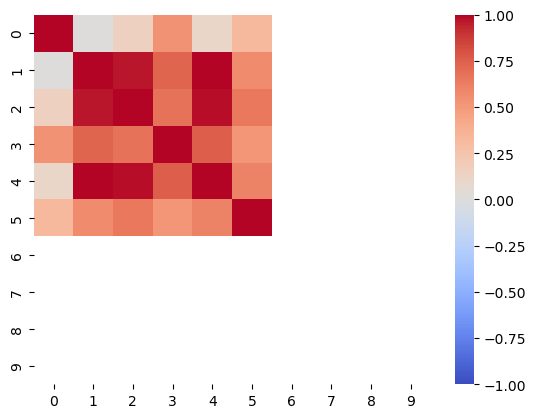

In [18]:
sns.heatmap(c,vmin=-1,vmax=1,cmap="coolwarm")

<AxesSubplot:>

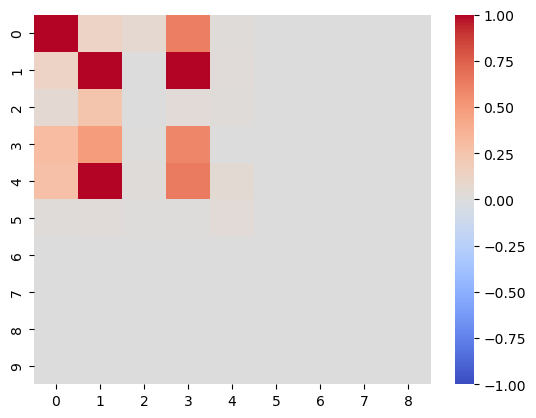

In [19]:
sns.heatmap(m,vmin=-1,vmax=1,cmap="coolwarm")

In [20]:
def normalize_2d(matrix,axis):
    norm = np.linalg.norm(matrix,axis=axis)
    if(axis==1):
        print(norm)
        matrix = matrix.T/norm  # normalized matrix
        return matrix.T
    else:
        matrix = matrix/norm  # normalized matrix
        return matrix

In [21]:
A=np.array([[1,2],[0,4],[5,6]]) 
B=np.array([[1,2,3],[3,4,5]])

In [22]:
np.dot(A,B)

array([[ 7, 10, 13],
       [12, 16, 20],
       [23, 34, 45]])

In [23]:
A

array([[1, 2],
       [0, 4],
       [5, 6]])

In [24]:
normalize_2d(A,1)

[2.23606798 4.         7.81024968]


array([[0.4472136 , 0.89442719],
       [0.        , 1.        ],
       [0.6401844 , 0.76822128]])

In [25]:
sas=pd.read_pickle(a[0])
sas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.14889279, 0.104384616, 0.0161...","[0.7330875, 0.26503438, 0.001878084]","[0.0, 1.0, 0.0]",0,1446,entailment,neutral
1,1,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, couple{couple,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17860392, 0.1662...","[0.839204, 0.15999468, 0.0008013443]","[0.0, 1.0, 0.0]",0,2160,entailment,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, tan{tan,NOUN}, -{...","[NULL{null,ADJ}, a{a,DET}, man{man,NOUN}, sitt...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.12952...","[0.9210948, 0.0663313, 0.012574027]","[1.0, 0.0, 0.0]",0,4171,entailment,entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, sign{sign,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, giant{giant,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17921524, 0.1633...","[0.63405293, 0.32265246, 0.04329467]","[0.0, 1.0, 0.0]",0,5885,entailment,neutral
4,4,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.9157257, 0.08173129, 0.0025429872]","[1.0, 0.0, 0.0]",0,1252,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wa...","[NULL{null,ADJ}, almost{almost,ADV}, had{have,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.23029745, 0.09098914, 0.02092...","[0.008494461, 0.9910766, 0.0004290199]","[0.0, 1.0, 0.0]",1,9681,neutral,neutral
598,598,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, what{what,NOUN}, are{be,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.011193112, 0.0606...","[0.065547444, 0.22682504, 0.70762753]","[0.0, 0.0, 1.0]",1,9694,contradiction,contradiction
599,599,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, a{a,DET}, red{red,ADJ}, pla...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.06875465, 0.1684...","[0.003225121, 0.9687075, 0.0280674]","[0.0, 1.0, 0.0]",1,9695,neutral,neutral
600,600,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,INTJ}, what{what,NOUN}, if{if,ADP},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.24369477, 0.08687...","[0.772184, 0.20669158, 0.021124437]","[1.0, 0.0, 0.0]",1,9697,entailment,entailment


In [26]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'eigenvalues' : [],'eigenvectors' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_eigenvalues=[]
                l_eigenvectors=[]
                for index,strings in temp.iterrows():
                    m=strings[5][1:len(strings[1]),1:len(strings[2])]
                    m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))
                    x, v = np.linalg.eig (m_norm)
                    l_eigenvalues.append(x)
                    l_eigenvectors.append(v)
                new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
                new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
                new_data['Paraphrase'].append(i)
                l_eigenvalues.clear()
                l_eigenvectors.clear()
dfn=pd.DataFrame(new_data)

C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\2097832507.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

In [27]:
dfn.to_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [28]:
dfn=pd.read_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [29]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,97,entailment_entailment,"[[114.70649, 82.42258, 34.64626, 21.15576, 14....","[[[0.37243488, 0.19709408, -0.2394539, -0.1326...",0
1,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,8,entailment_neutral,"[[88.39253, 57.254005, 19.980639, 5.6733956, 2...","[[[-0.37234813, -0.033167005, 0.63599914, -0.4...",0
2,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,4,entailment_contradiction,"[[71.07207, 47.660233, 41.123753, 18.320171, 9...","[[[0.5307356, 0.10117844, -0.05637662, -0.1218...",0
3,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,104,16,neutral_entailment,"[[13.380632, 11.358755, 5.1285253, 0.001018649...","[[[-0.5844506, 0.34903237, -0.040323786, -0.50...",0
4,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,104,80,neutral_neutral,"[[28.180984, 19.359364, 15.321128, 3.679802, 2...","[[[0.23121148, 0.61972266, -0.06120507, -0.207...",0
...,...,...,...,...,...,...,...,...,...
2173,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2042,1574,neutral_neutral,"[[26.090057, 21.702816, 5.0010853, 7.2060432],...","[[[-0.5517189, -0.4622125, 0.69050384, 0.07190...",1
2174,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2042,258,neutral_contradiction,"[[89.243706, 32.6968, 6.080889, 3.667561, 0.89...","[[[0.44578424, 0.172819, 0.049907323, -0.03091...",1
2175,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2023,116,contradiction_entailment,"[[115.013985, 14.479787, 10.11949, 2.115631, 0...","[[[0.31971943, 0.21179418, 0.028826592, 0.4732...",1
2176,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2023,261,contradiction_neutral,"[[139.21754, 58.024616, 31.033537, 18.929893, ...","[[[0.35913745, -0.21606442, 0.09851299, 0.1225...",1


In [30]:
ejemplo1=dfn.eigenvalues[0][0]
ejemplo2=dfn.eigenvalues[0][1]
ejemplo3=dfn.eigenvalues[0][2]

In [31]:
import matplotlib.pyplot as plt
import math

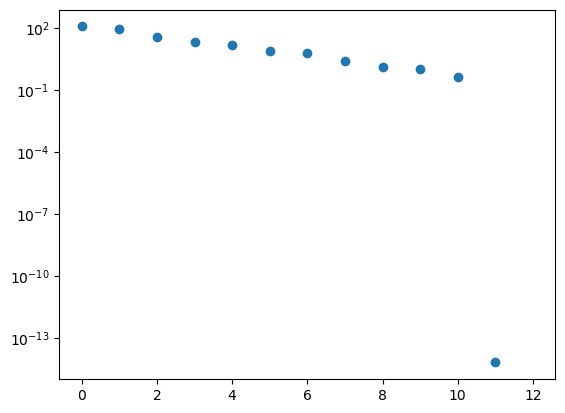

In [32]:
plt.scatter(x=np.arange(len(ejemplo1)),y=ejemplo1)
plt.yscale("log")

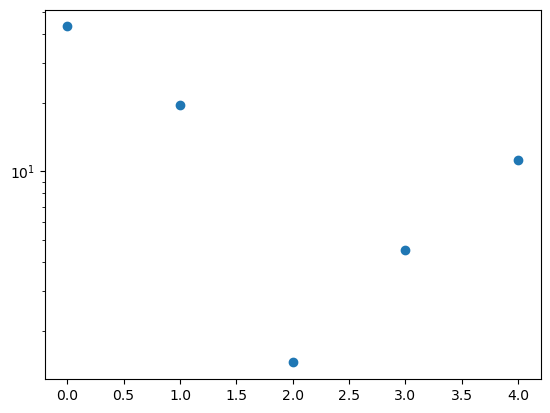

In [33]:
plt.scatter(x=np.arange(len(ejemplo2)),y=ejemplo2)
plt.yscale("log")

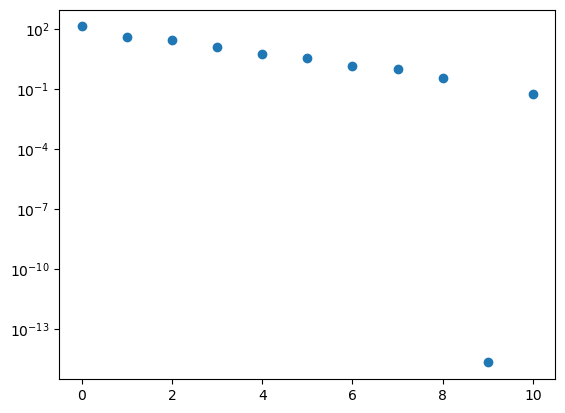

In [34]:
plt.scatter(x=np.arange(len(ejemplo3)),y=ejemplo3)
plt.yscale("log")

In [35]:
a=dfn.eigenvalues[0][4]

In [36]:
a

array([1.2292427e+02, 6.8268547e+01, 4.7750366e+01, 4.4519566e+01,
       1.9837368e+01, 1.3249905e+01, 8.1832428e+00, 5.9080082e-15,
       4.6160391e-01, 2.6654935e+00, 2.1396477e+00], dtype=float32)

In [37]:
lista_eigenvalues=[]

In [38]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,97,entailment_entailment,"[[114.70649, 82.42258, 34.64626, 21.15576, 14....","[[[0.37243488, 0.19709408, -0.2394539, -0.1326...",0
1,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,8,entailment_neutral,"[[88.39253, 57.254005, 19.980639, 5.6733956, 2...","[[[-0.37234813, -0.033167005, 0.63599914, -0.4...",0
2,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,4,entailment_contradiction,"[[71.07207, 47.660233, 41.123753, 18.320171, 9...","[[[0.5307356, 0.10117844, -0.05637662, -0.1218...",0
3,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,104,16,neutral_entailment,"[[13.380632, 11.358755, 5.1285253, 0.001018649...","[[[-0.5844506, 0.34903237, -0.040323786, -0.50...",0
4,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,104,80,neutral_neutral,"[[28.180984, 19.359364, 15.321128, 3.679802, 2...","[[[0.23121148, 0.61972266, -0.06120507, -0.207...",0
...,...,...,...,...,...,...,...,...,...
2173,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2042,1574,neutral_neutral,"[[26.090057, 21.702816, 5.0010853, 7.2060432],...","[[[-0.5517189, -0.4622125, 0.69050384, 0.07190...",1
2174,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2042,258,neutral_contradiction,"[[89.243706, 32.6968, 6.080889, 3.667561, 0.89...","[[[0.44578424, 0.172819, 0.049907323, -0.03091...",1
2175,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2023,116,contradiction_entailment,"[[115.013985, 14.479787, 10.11949, 2.115631, 0...","[[[0.31971943, 0.21179418, 0.028826592, 0.4732...",1
2176,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2023,261,contradiction_neutral,"[[139.21754, 58.024616, 31.033537, 18.929893, ...","[[[0.35913745, -0.21606442, 0.09851299, 0.1225...",1


In [39]:
grupos_box=dfn["grupo"].unique()

In [40]:
eti_box=dfn["E_P"].unique()

C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15544\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for f

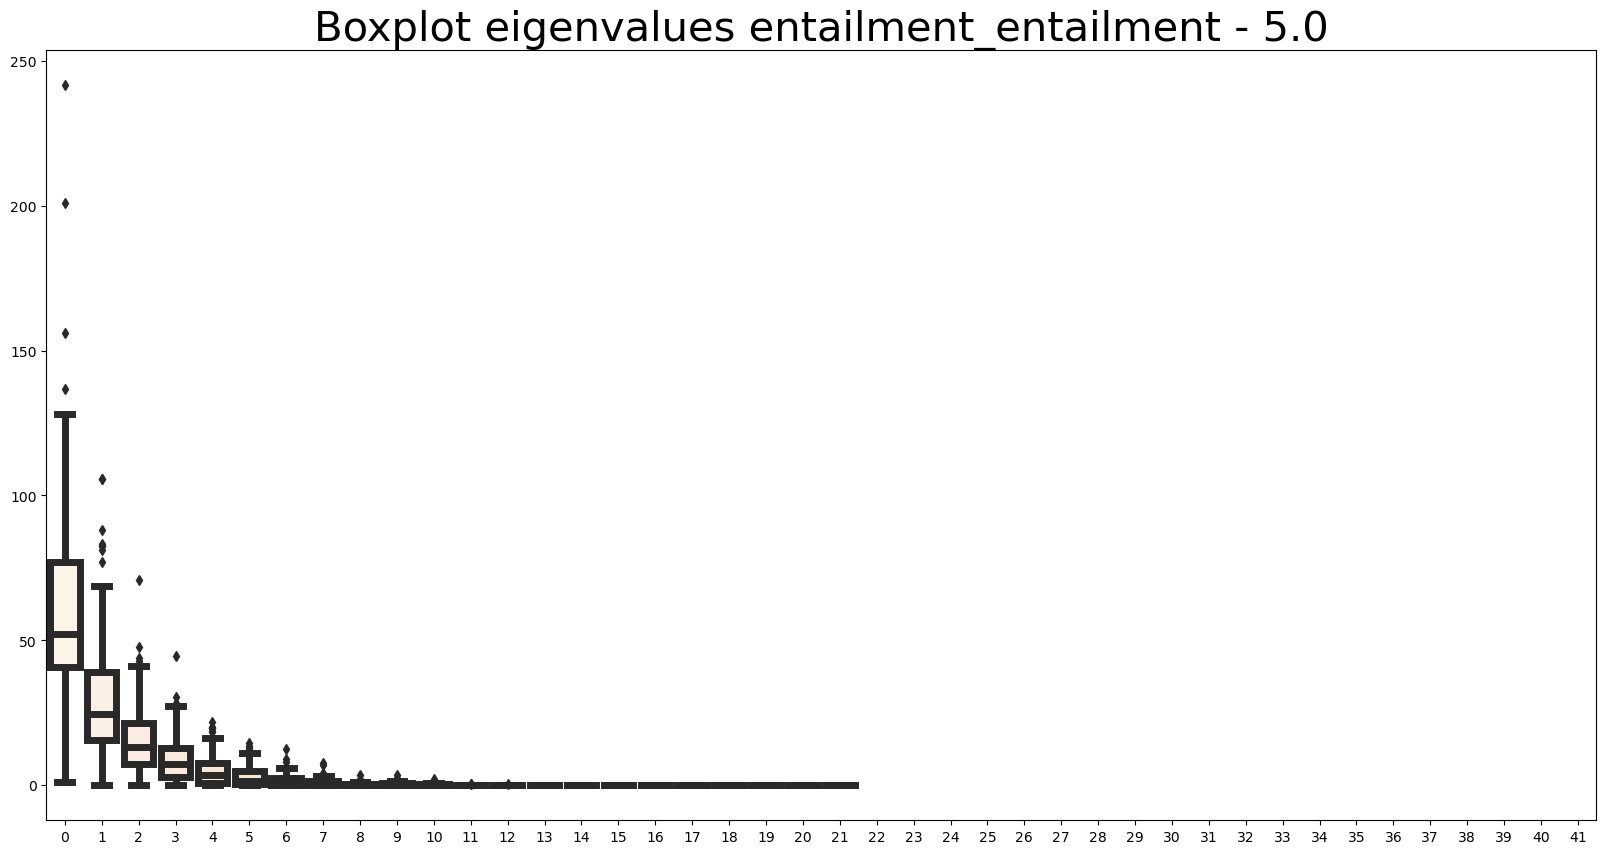

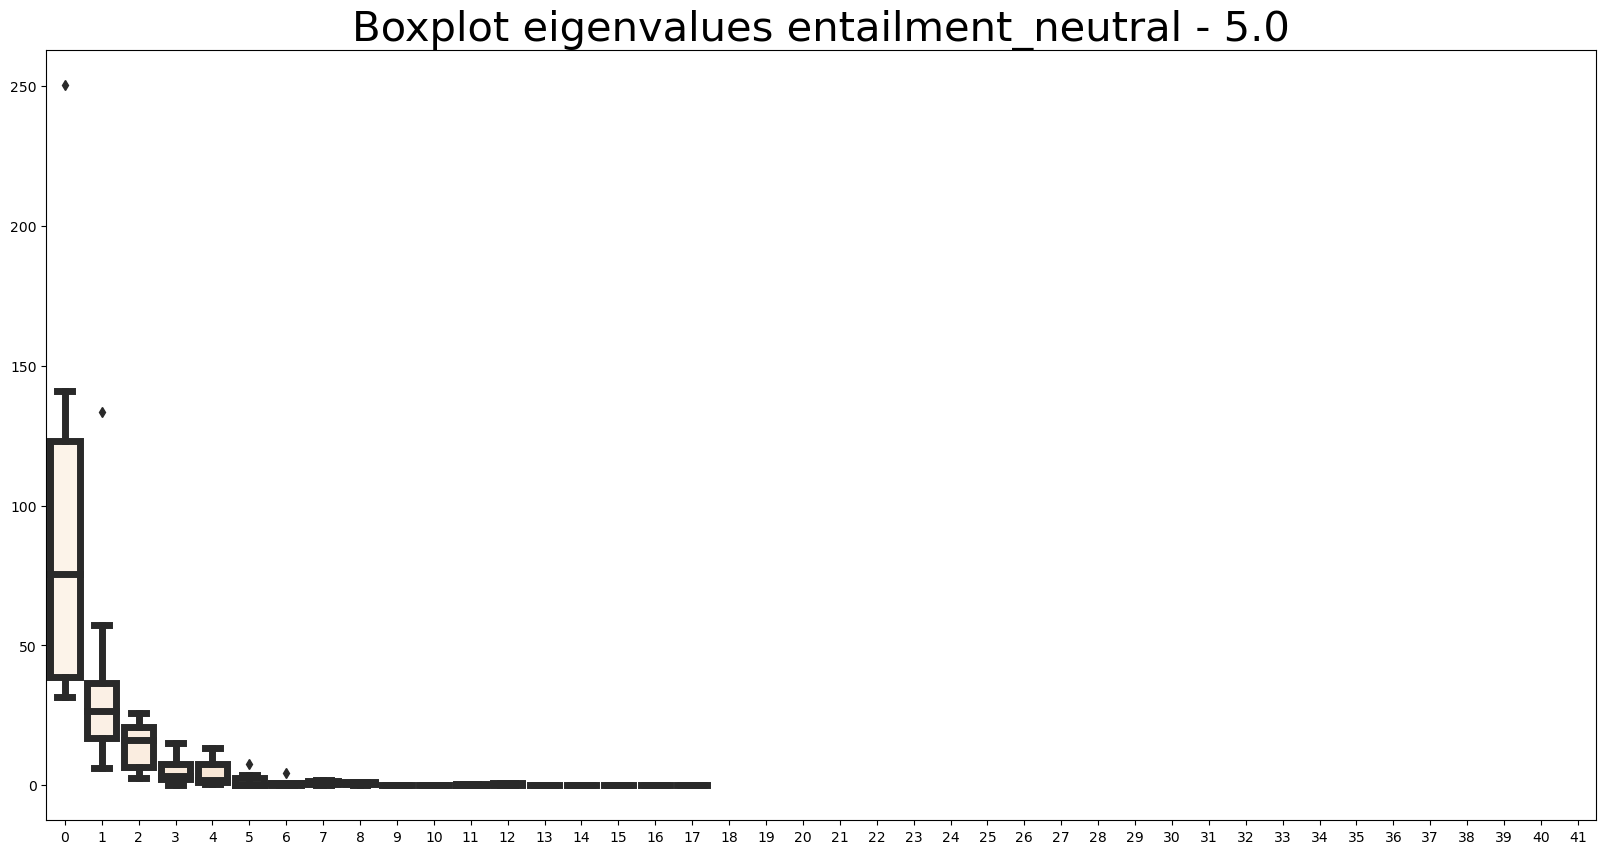

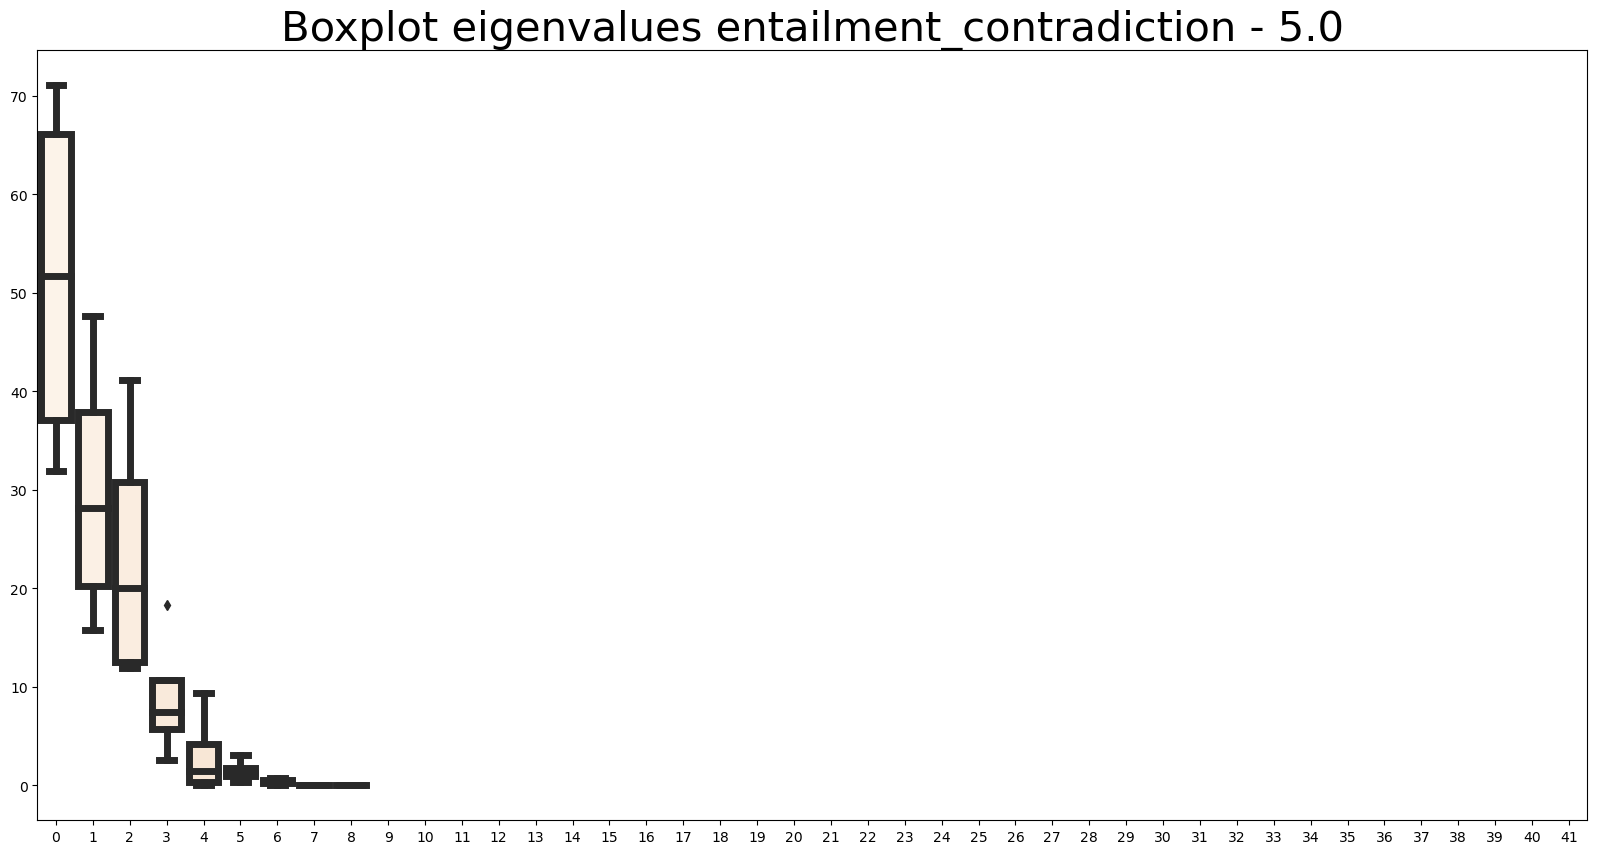

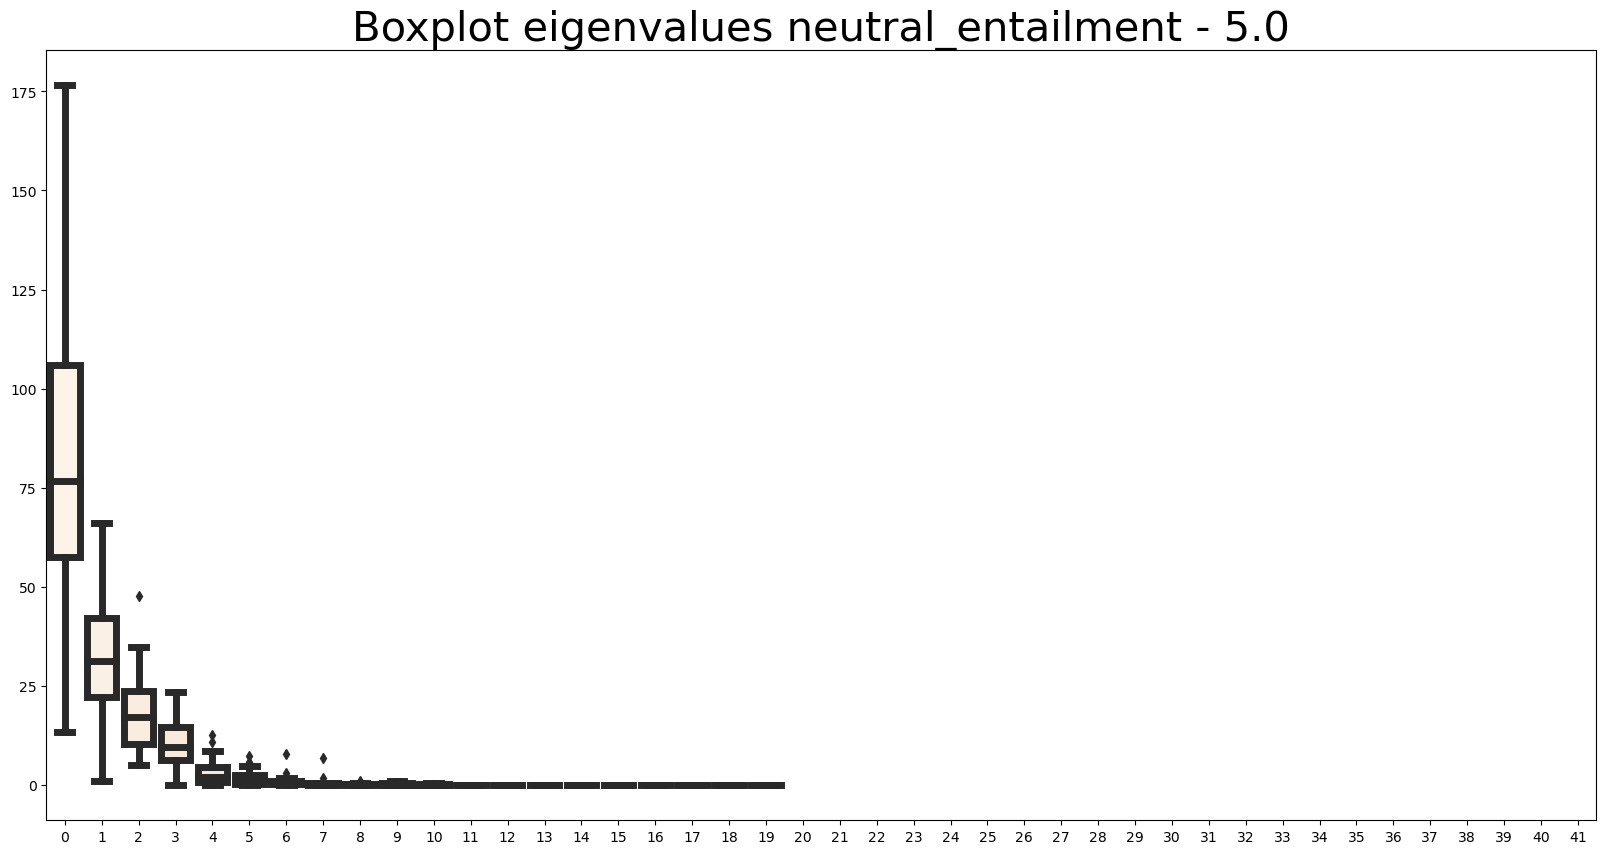

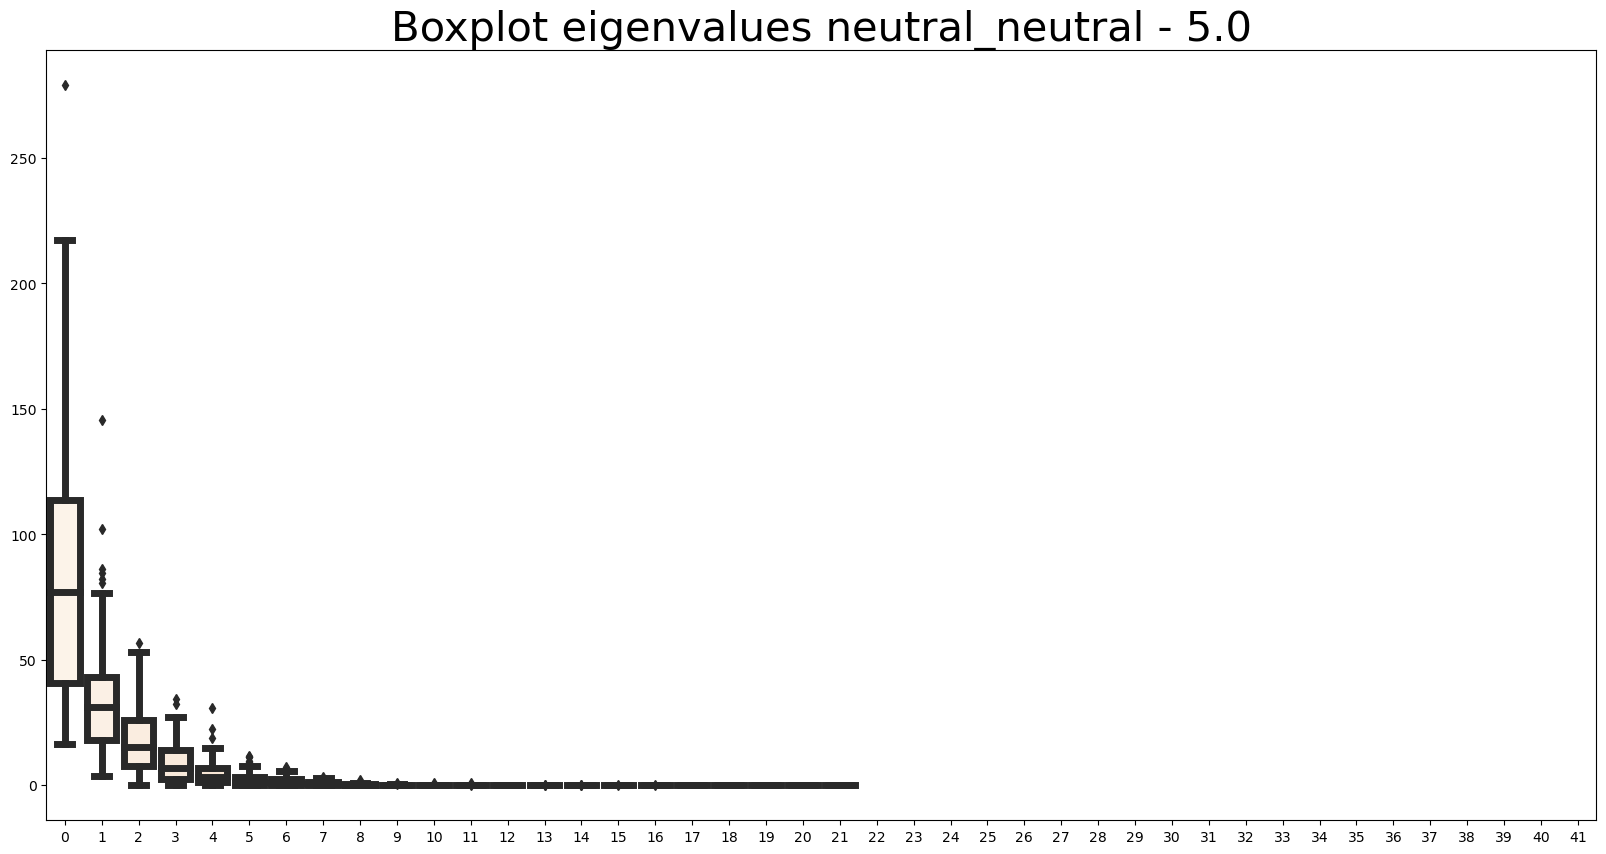

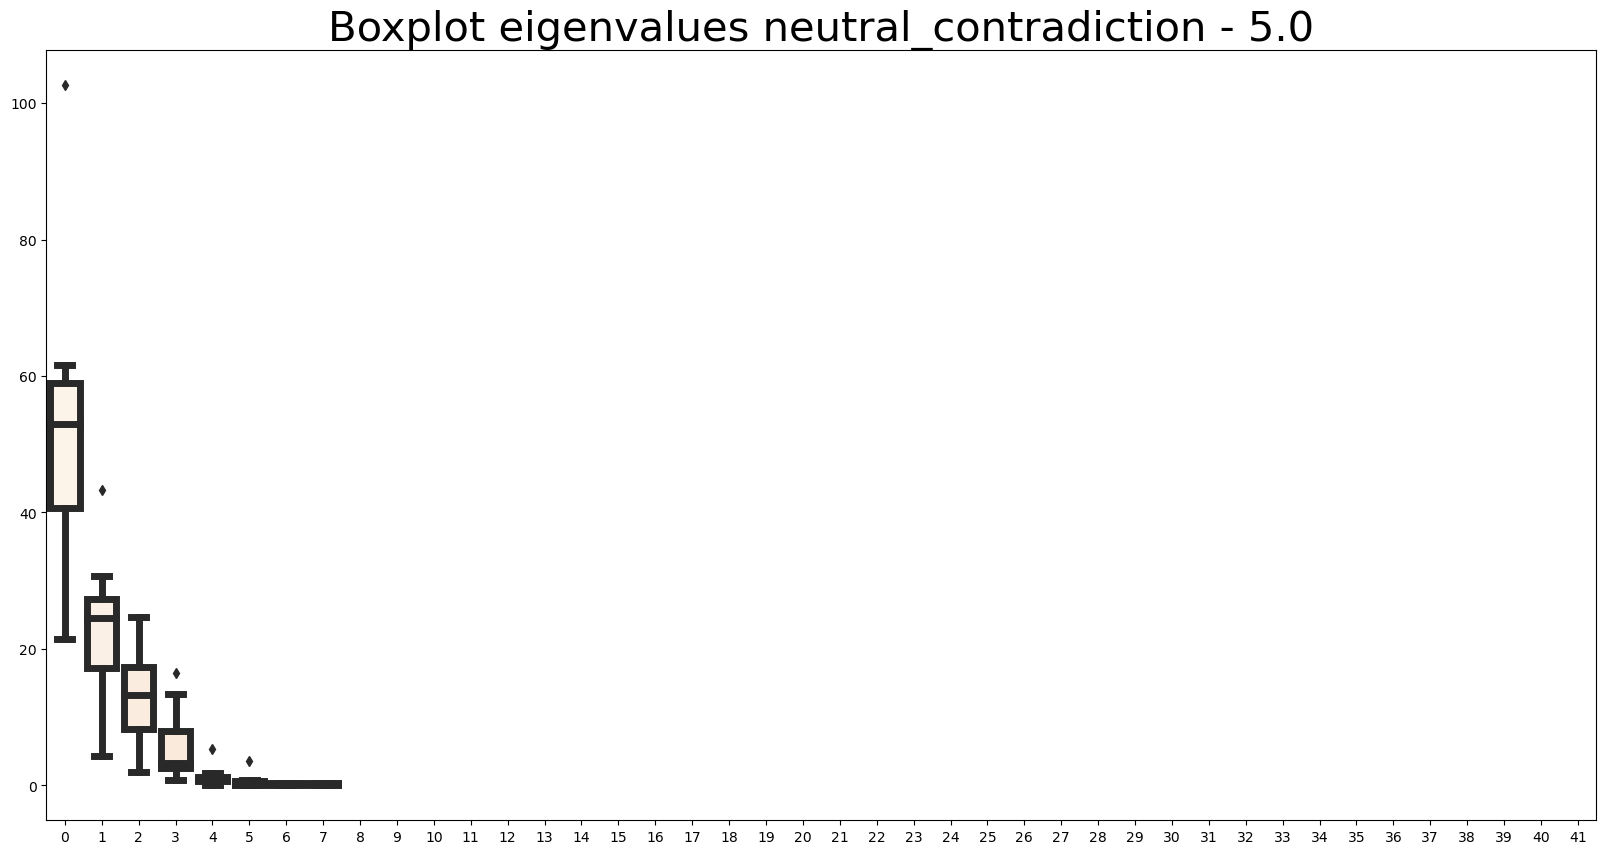

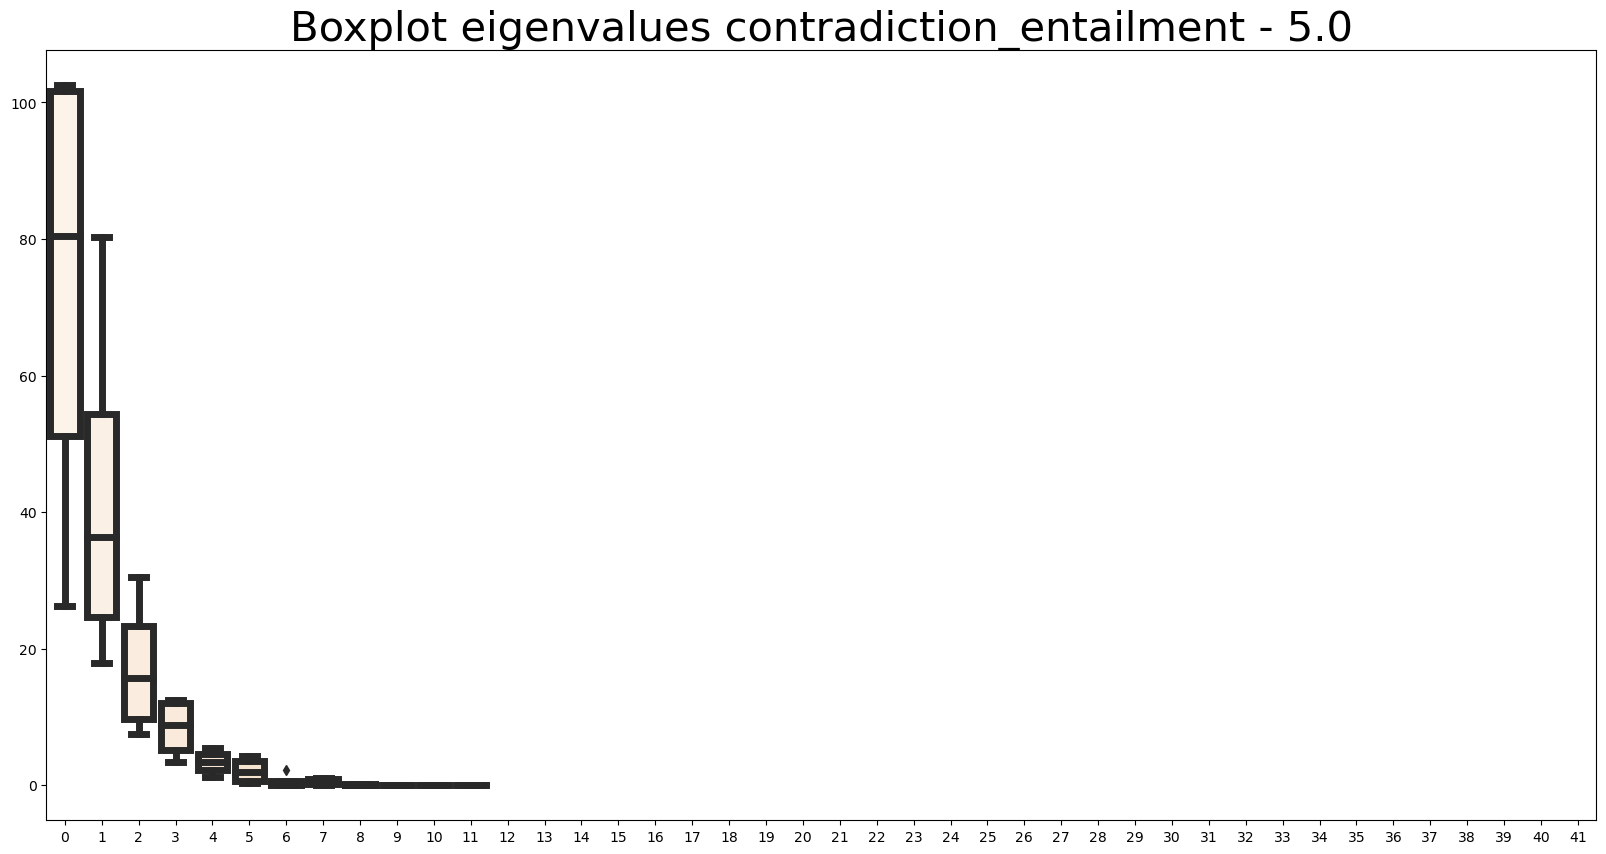

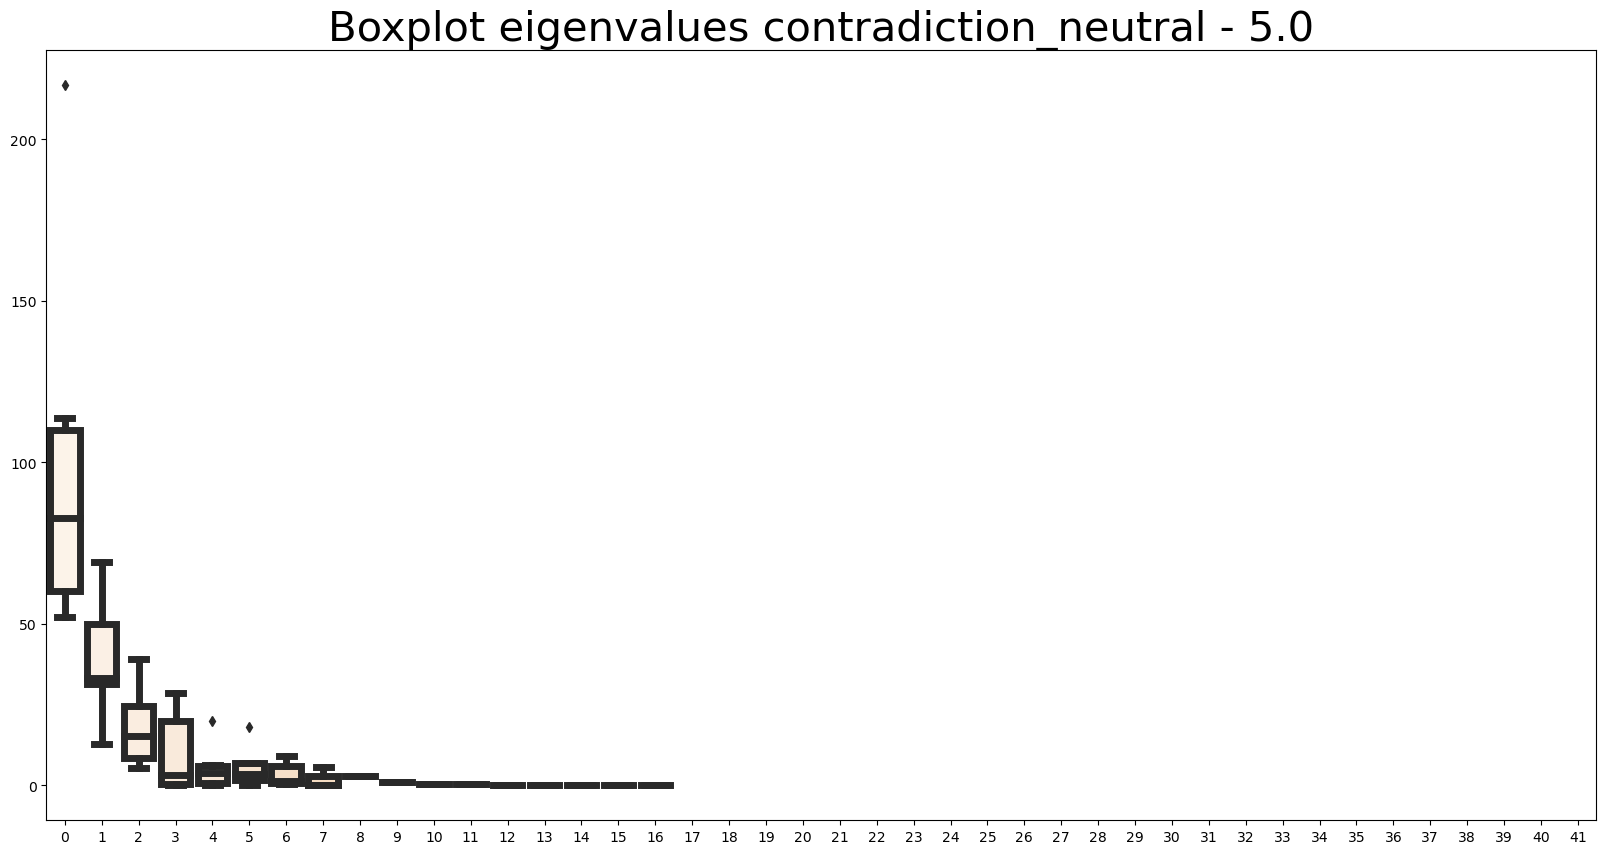

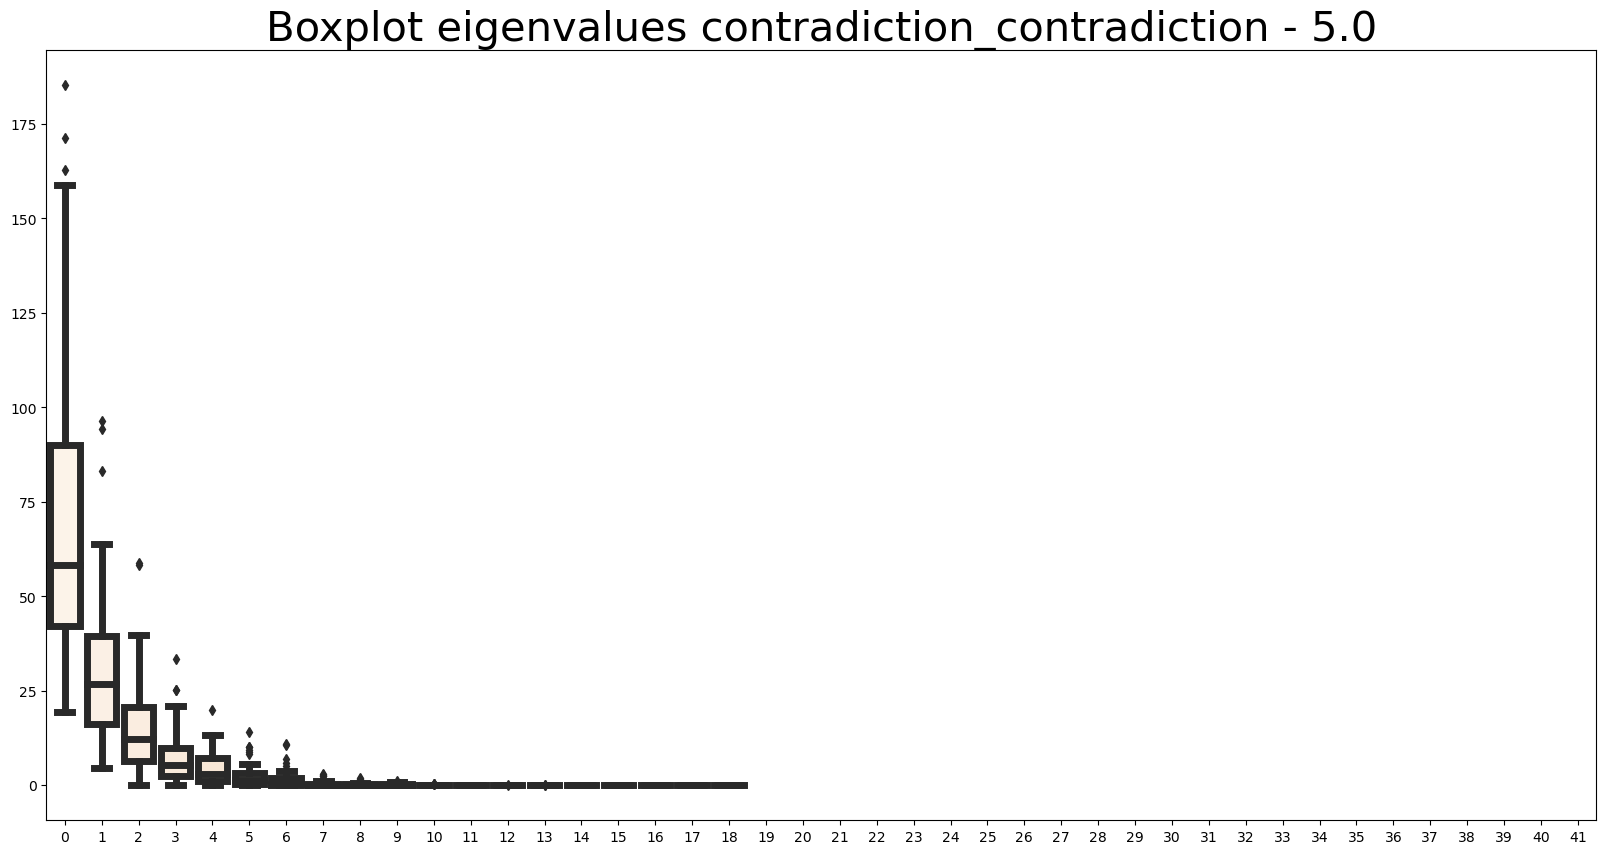

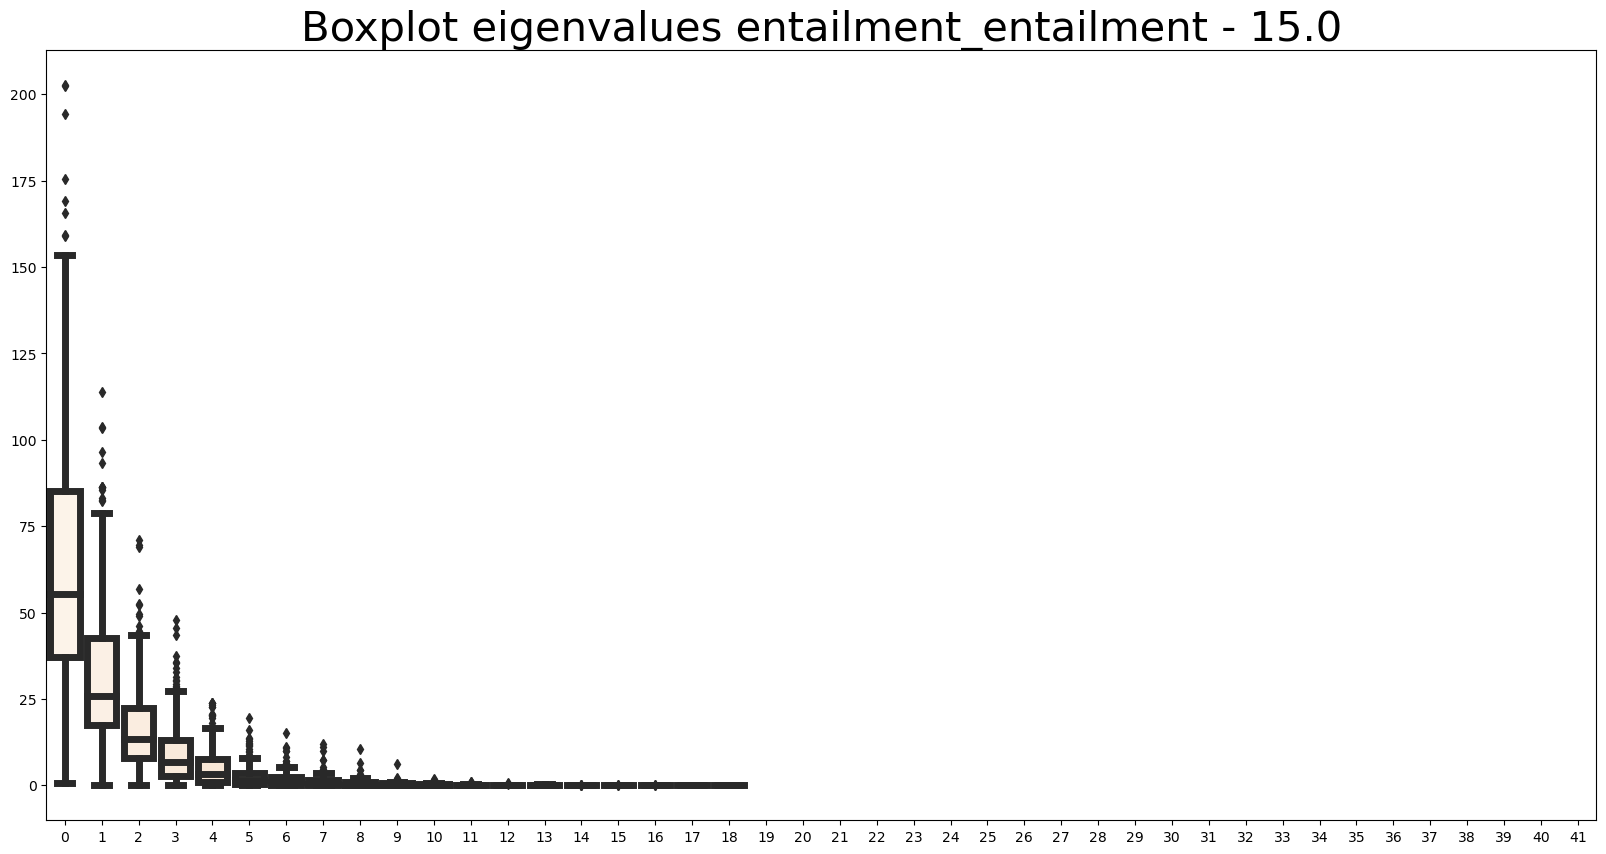

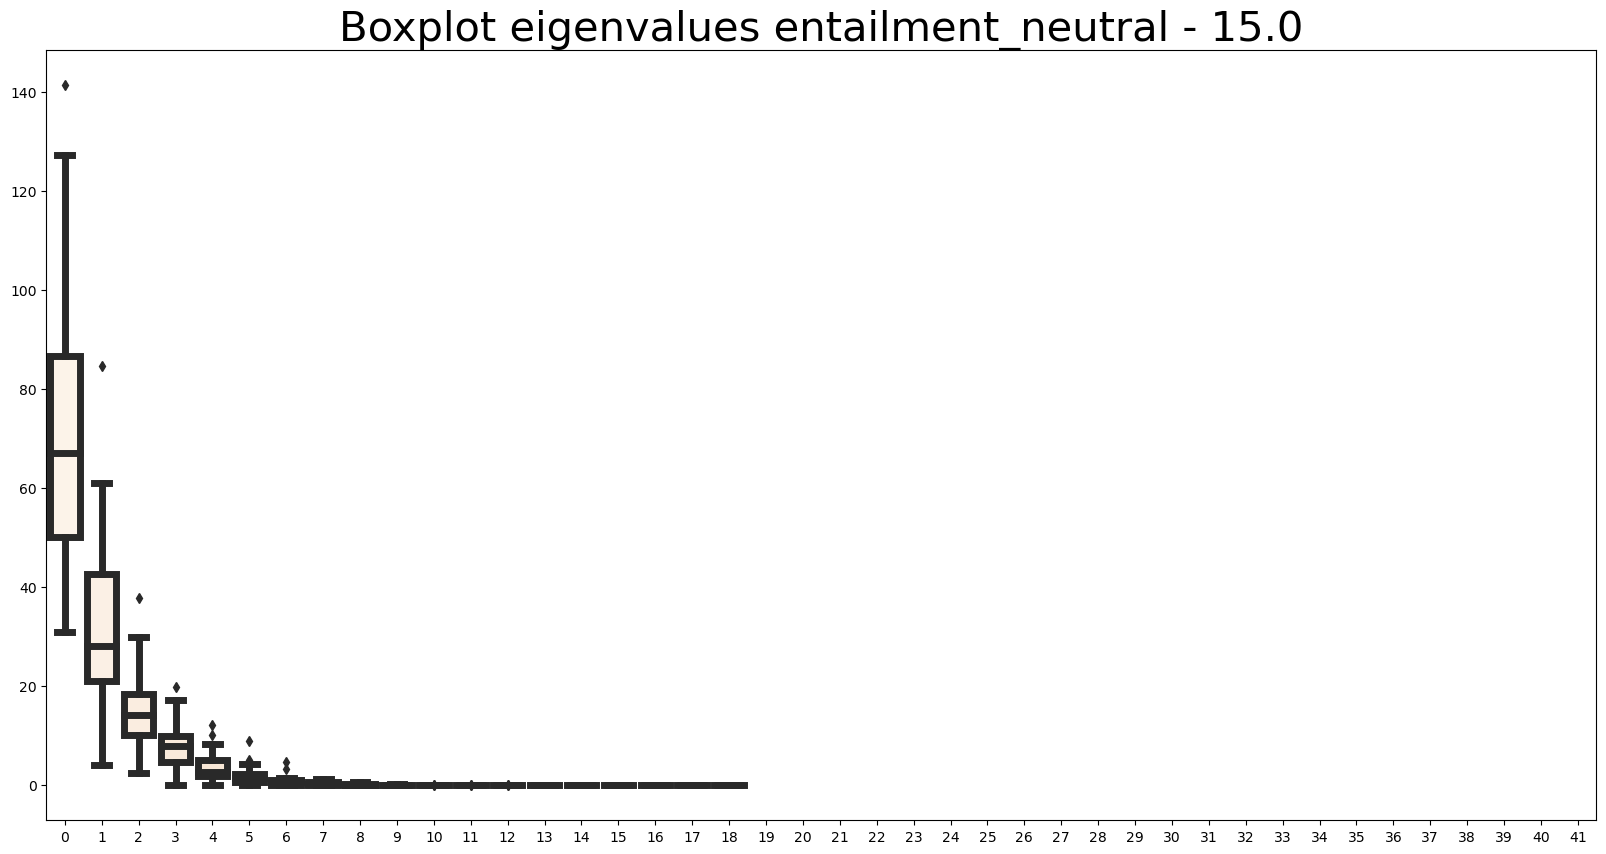

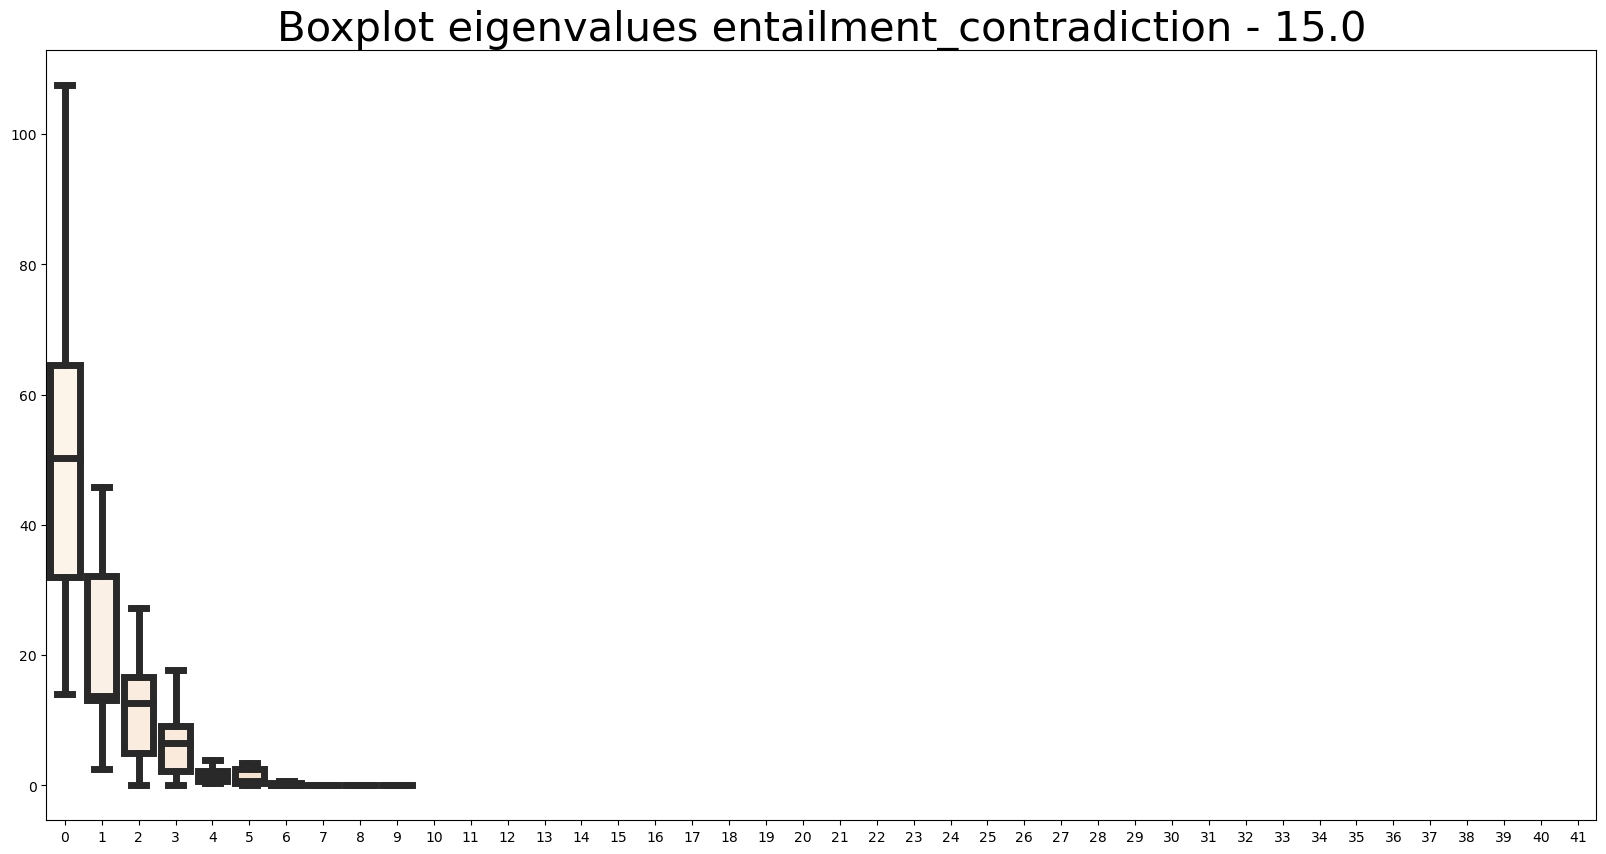

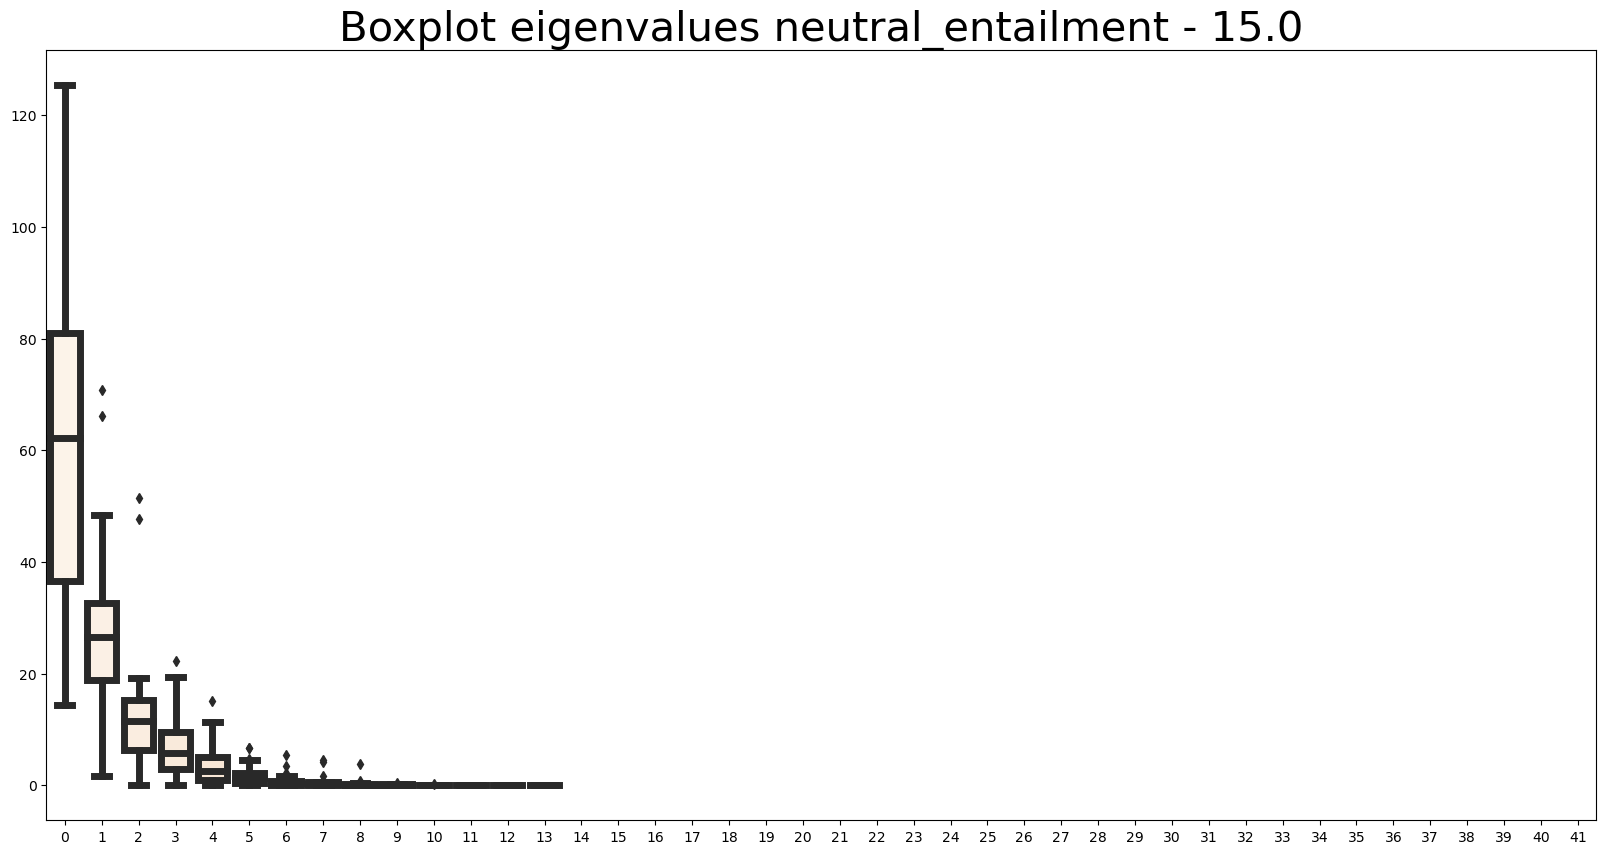

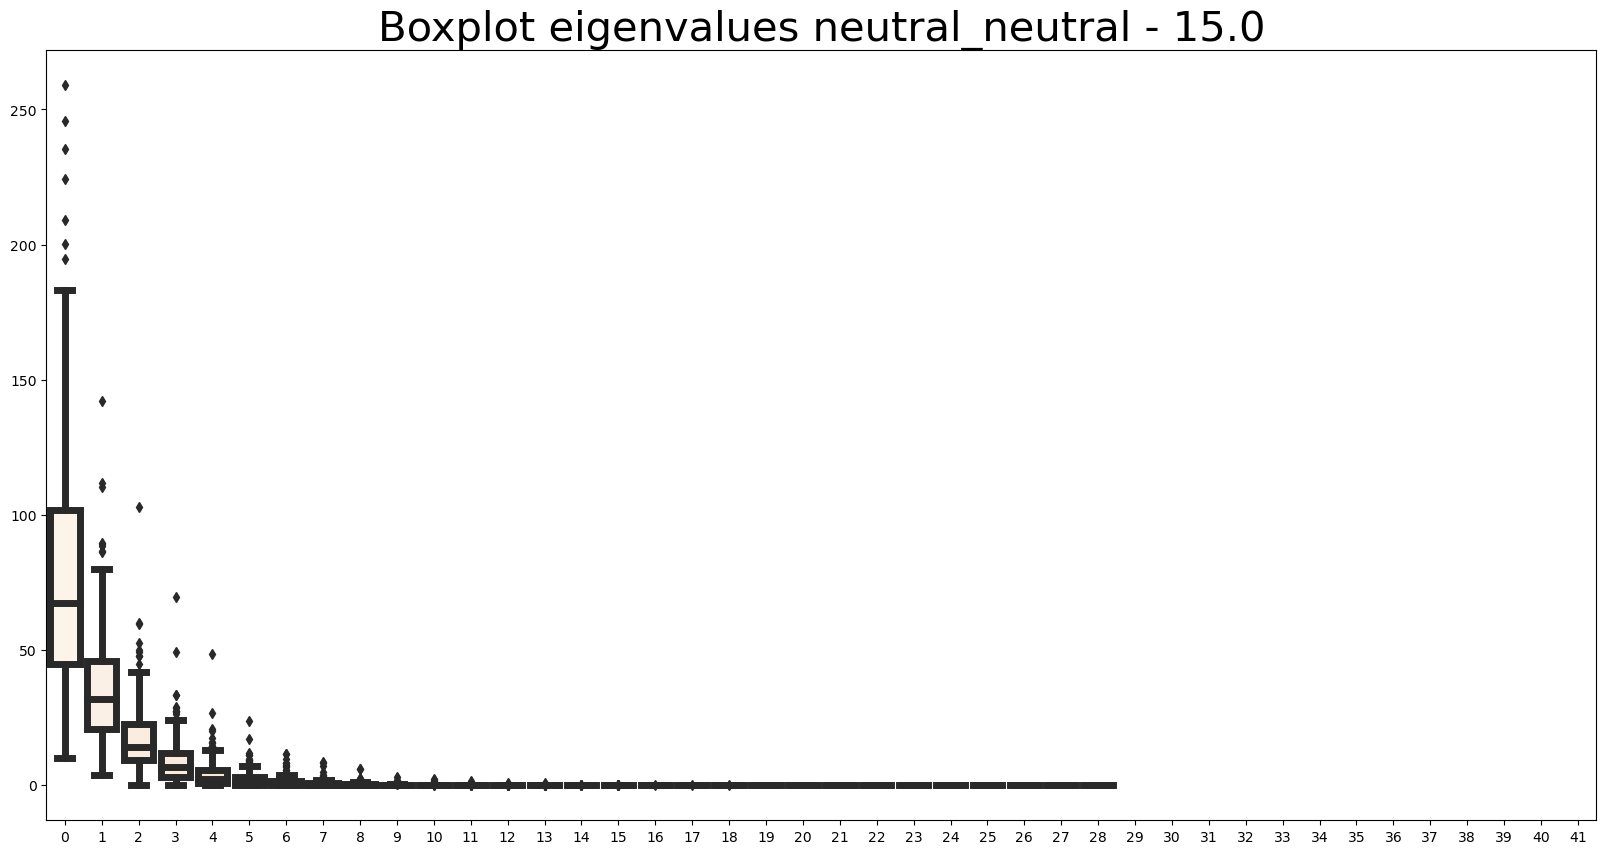

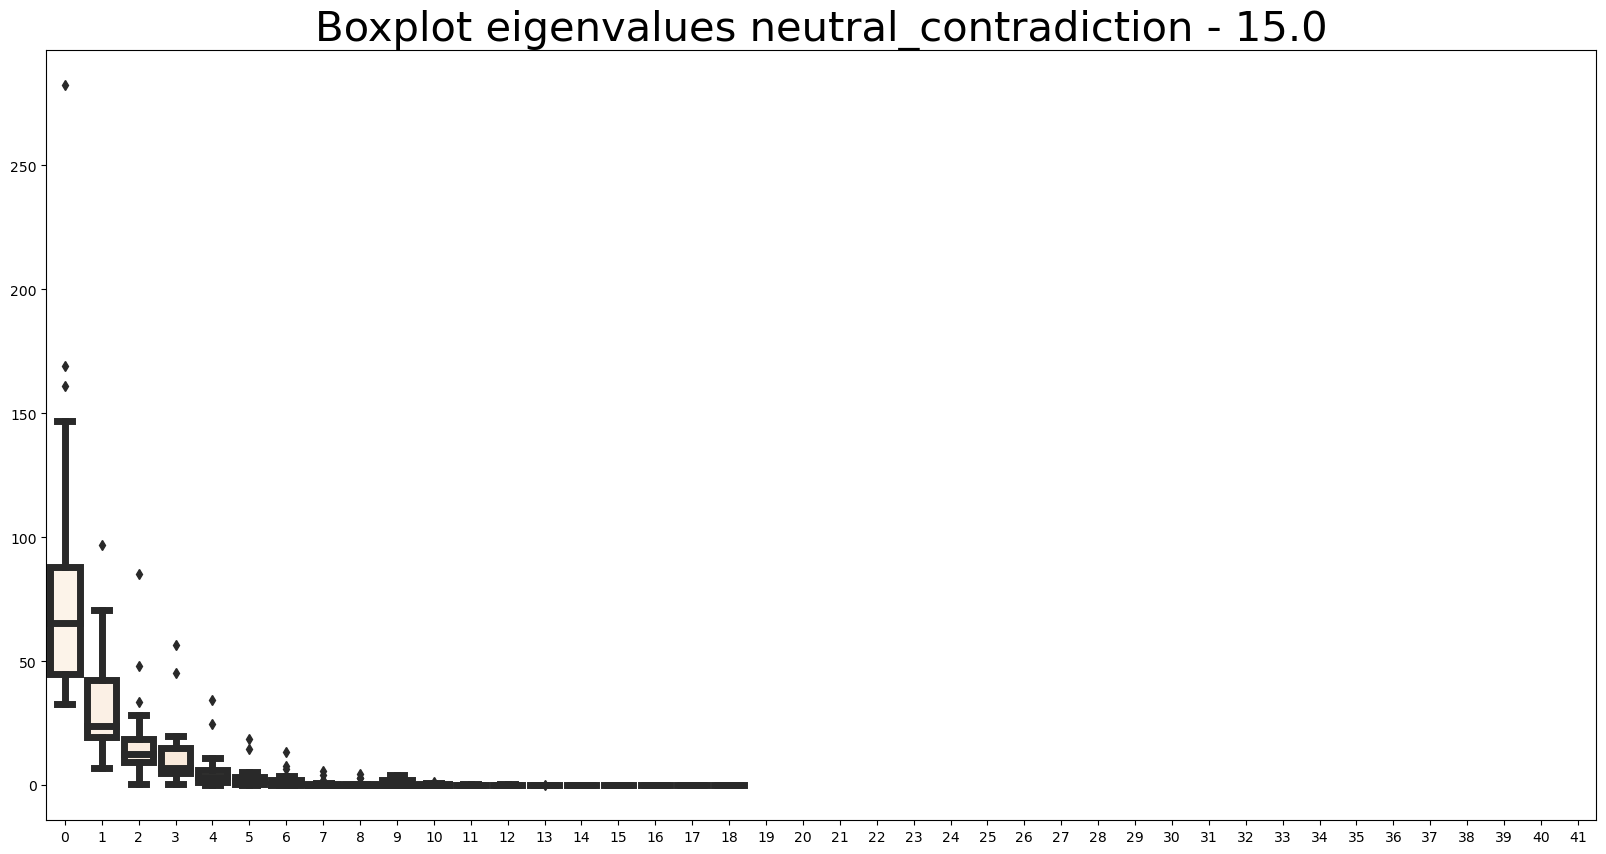

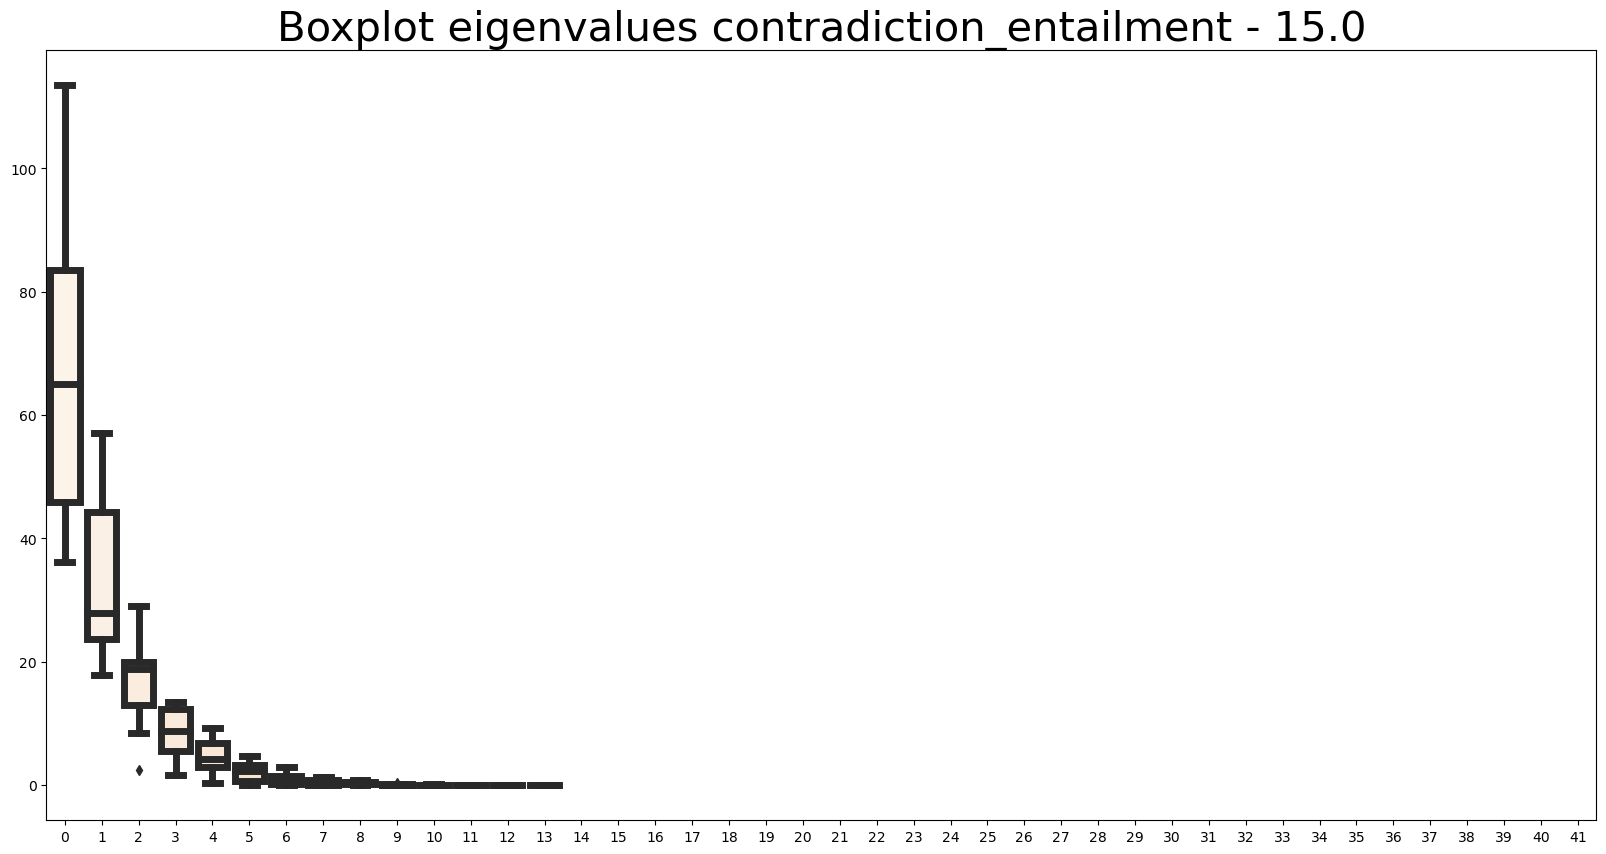

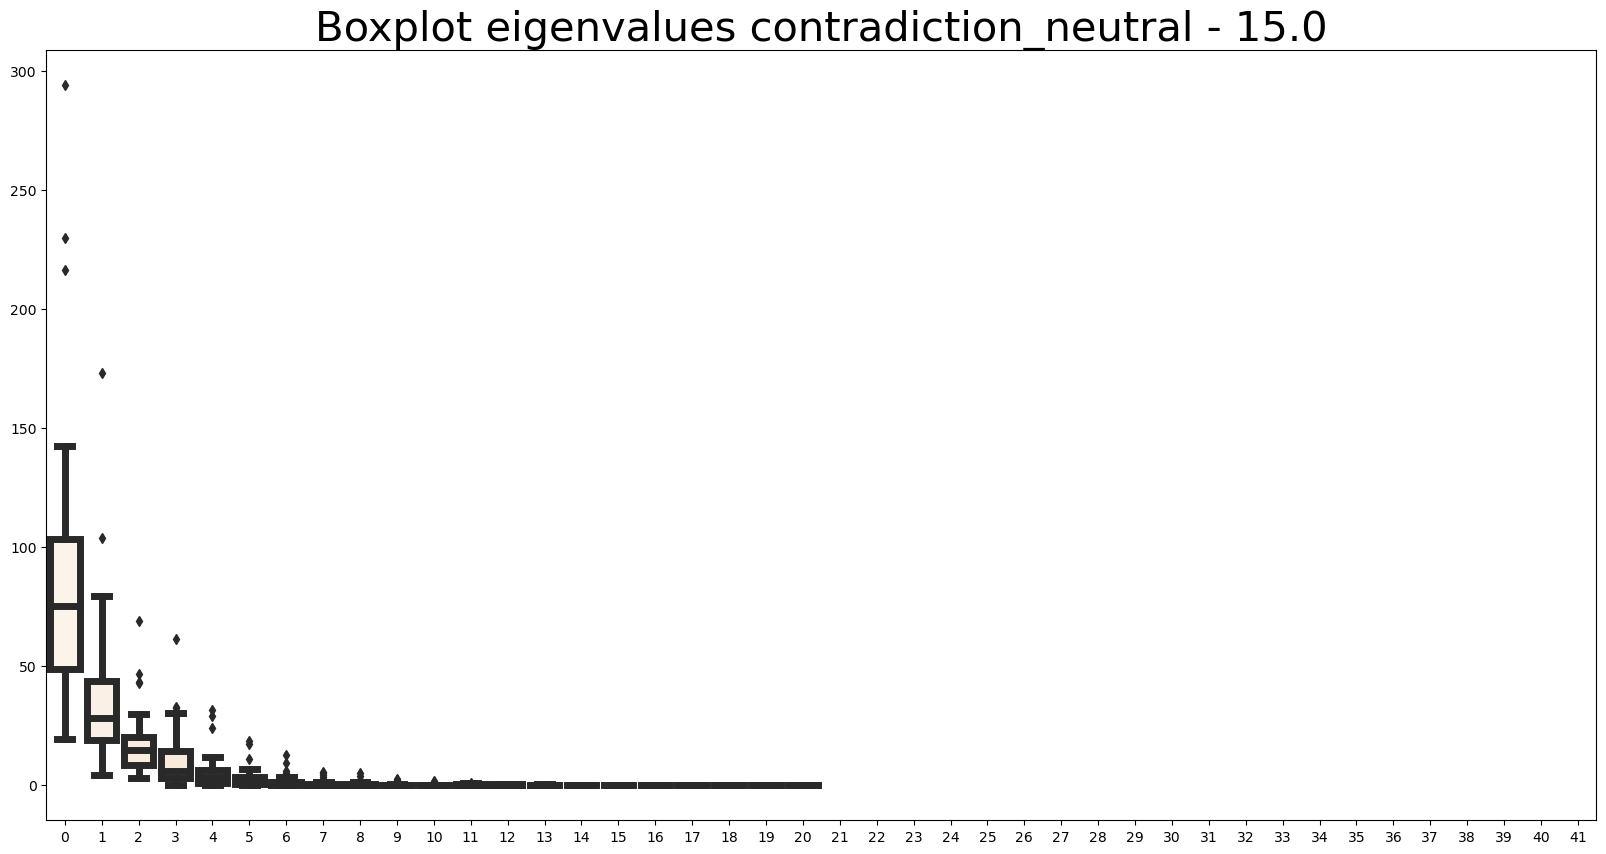

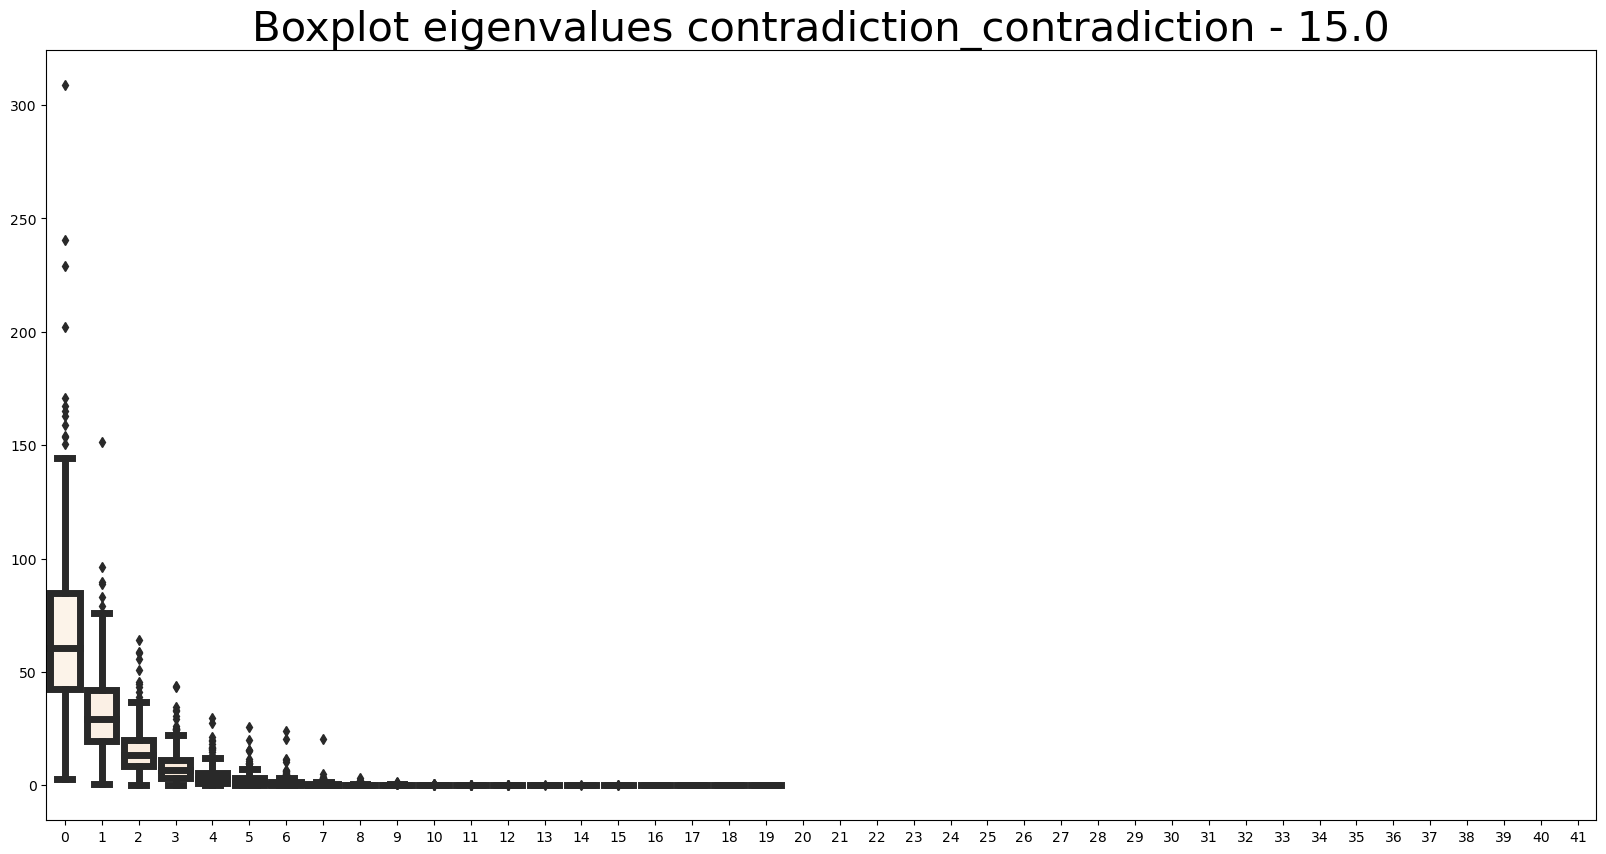

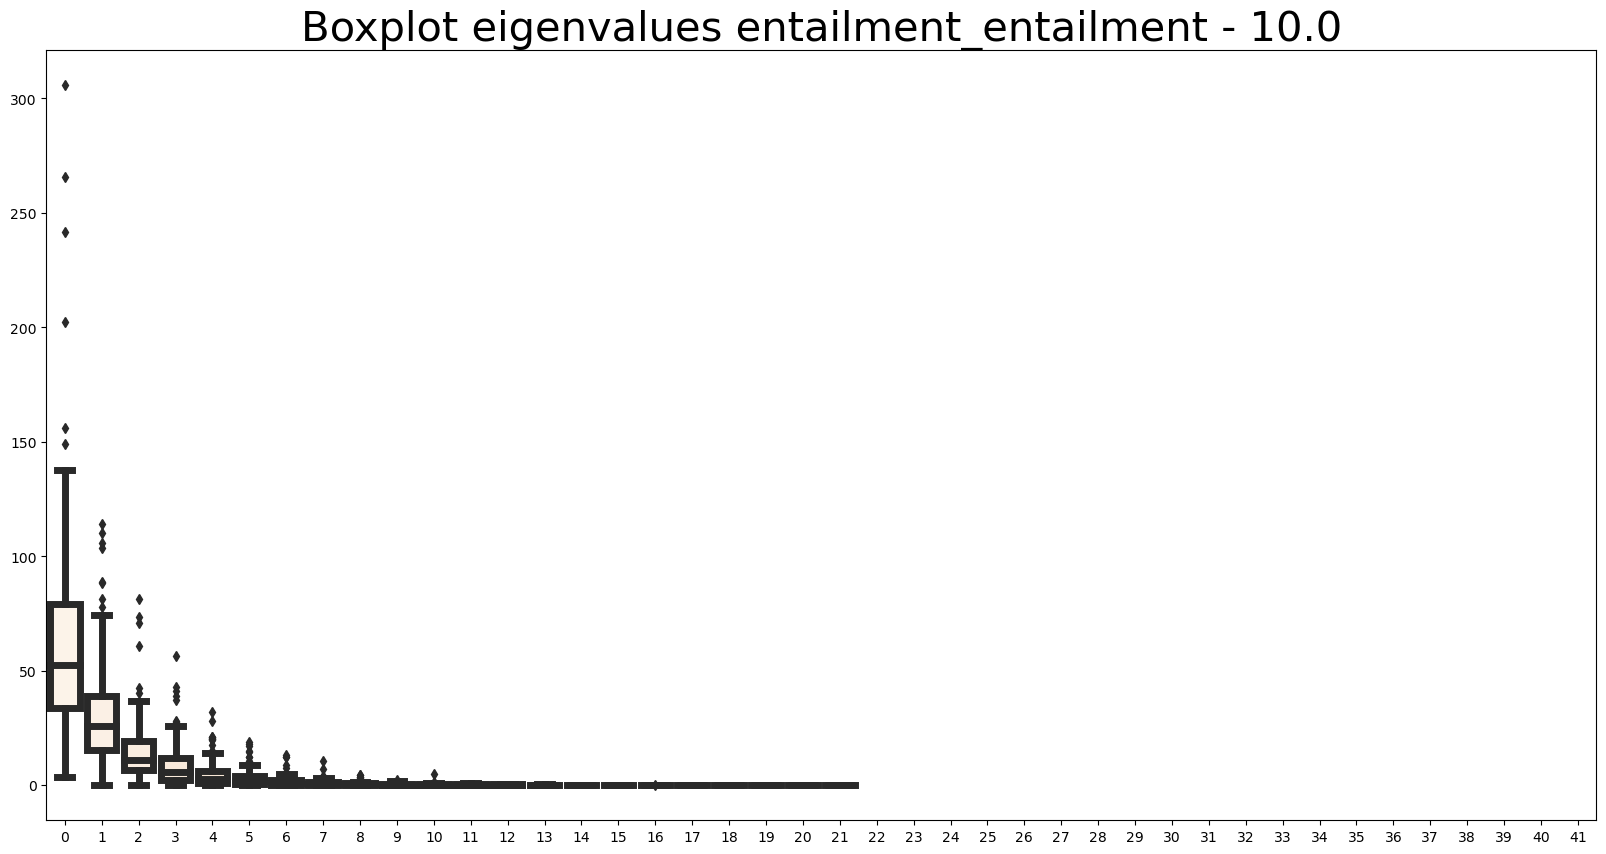

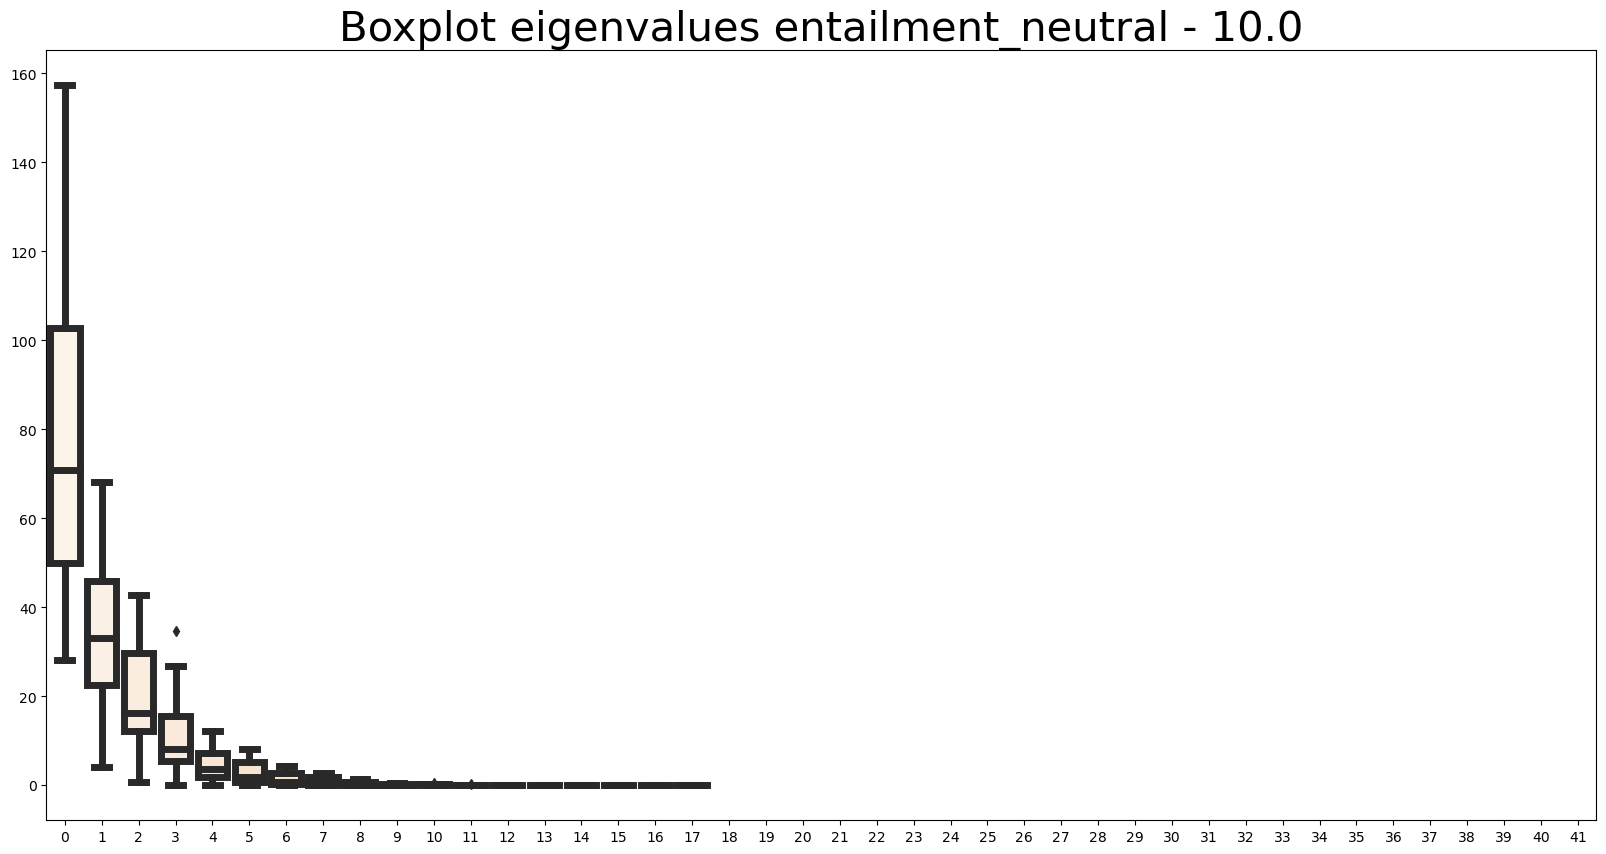

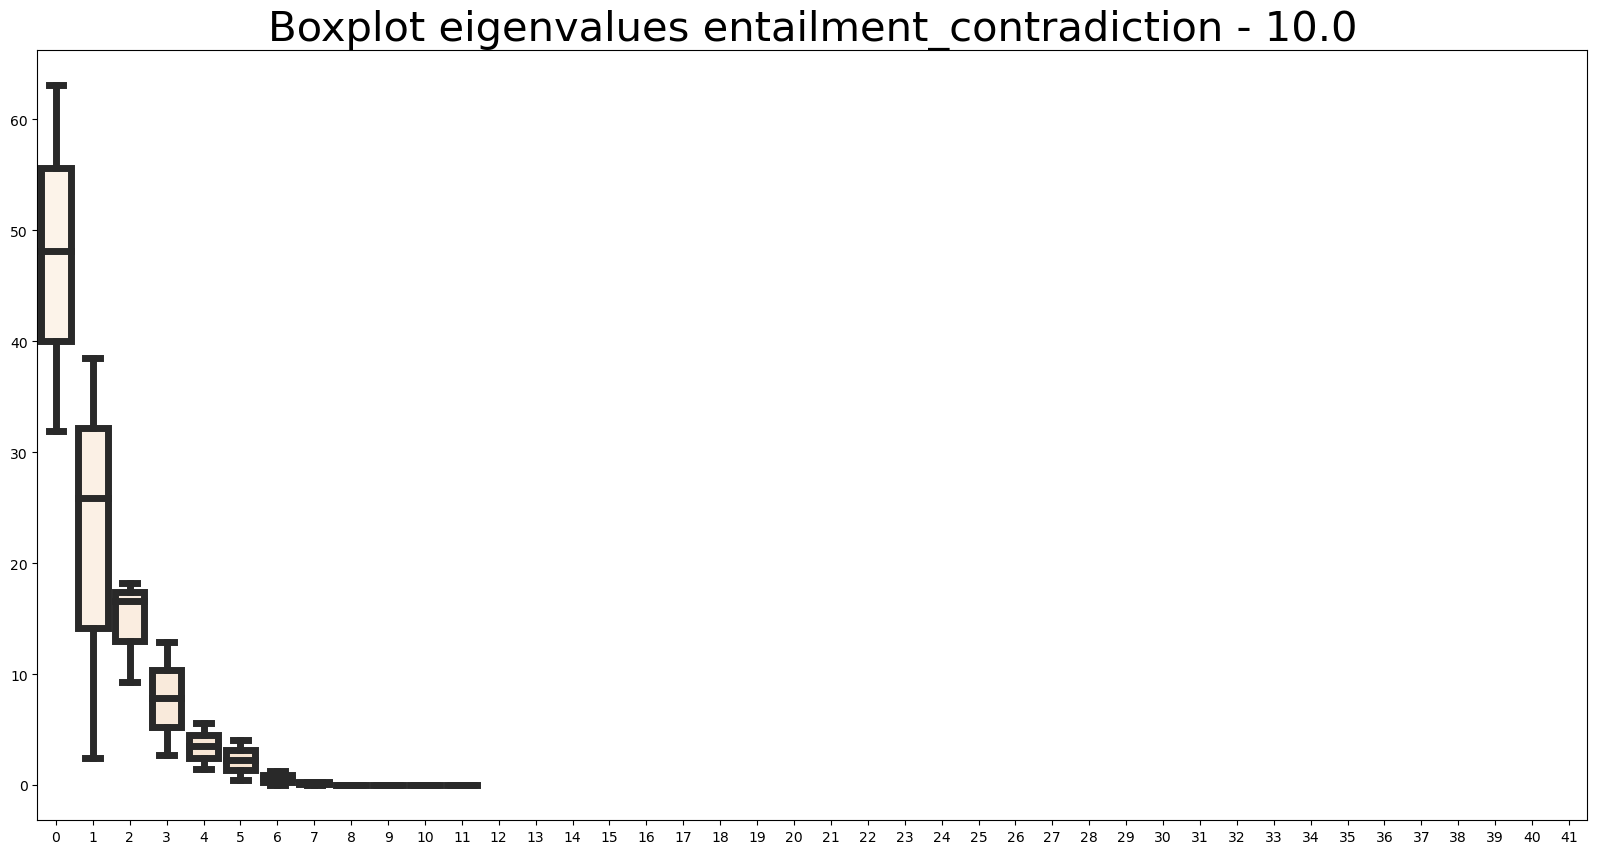

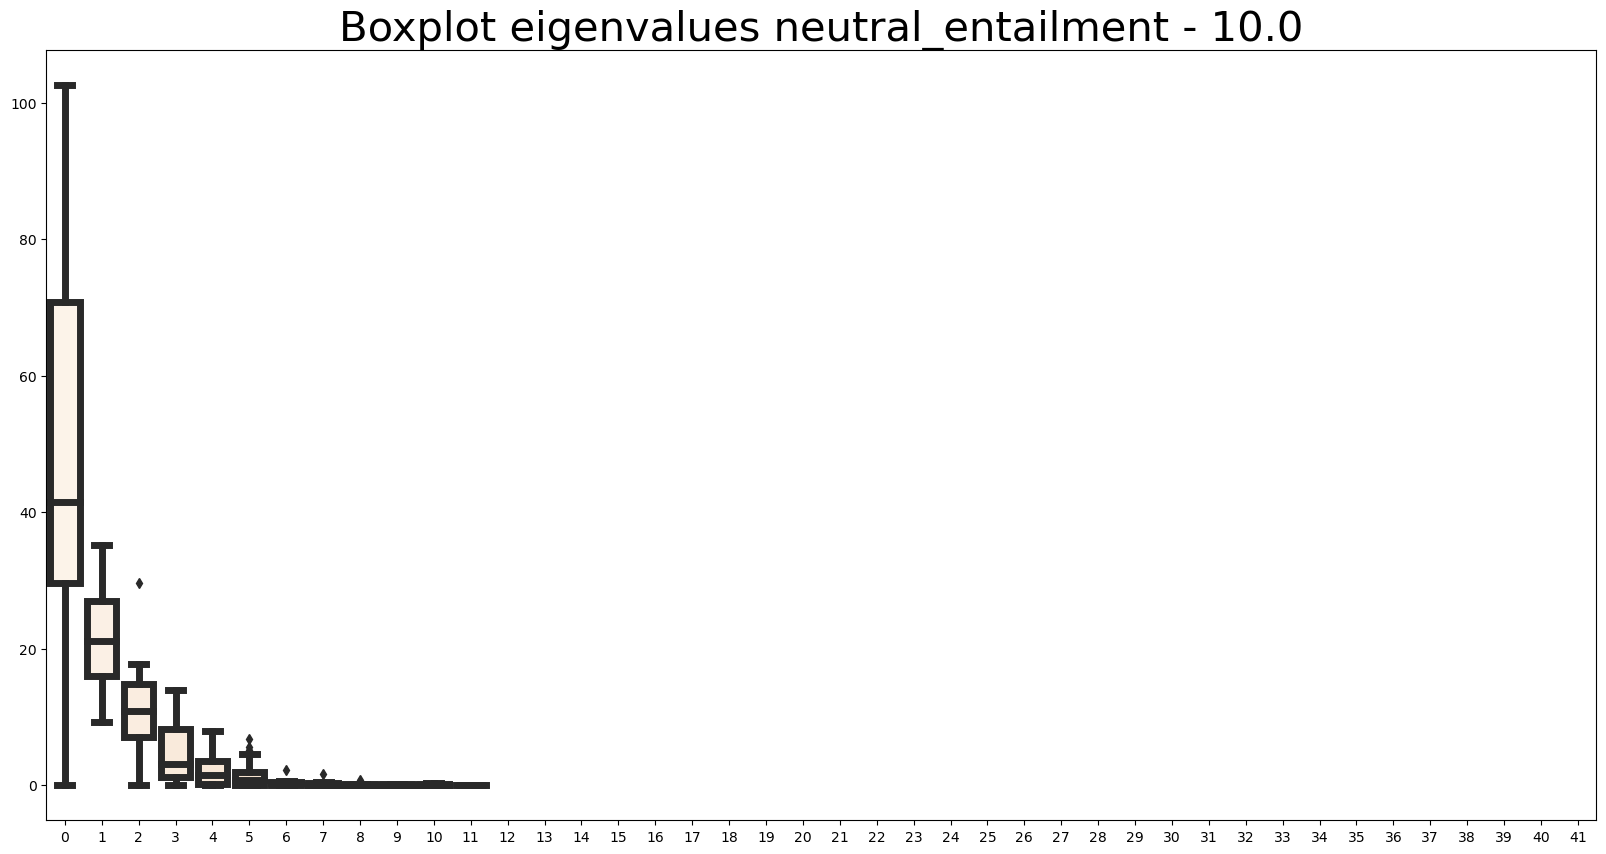

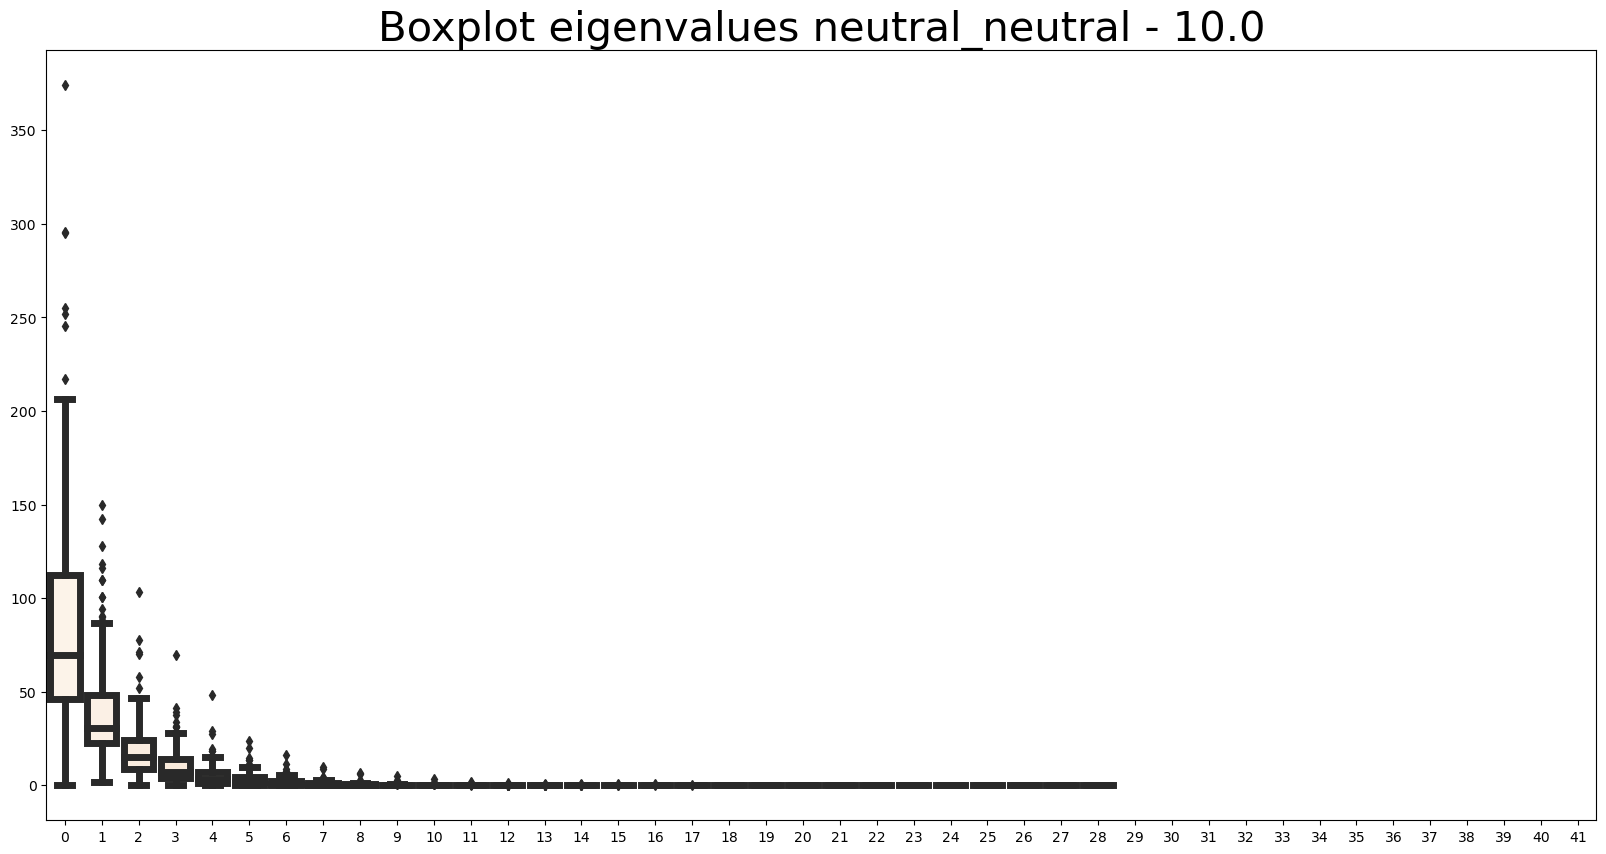

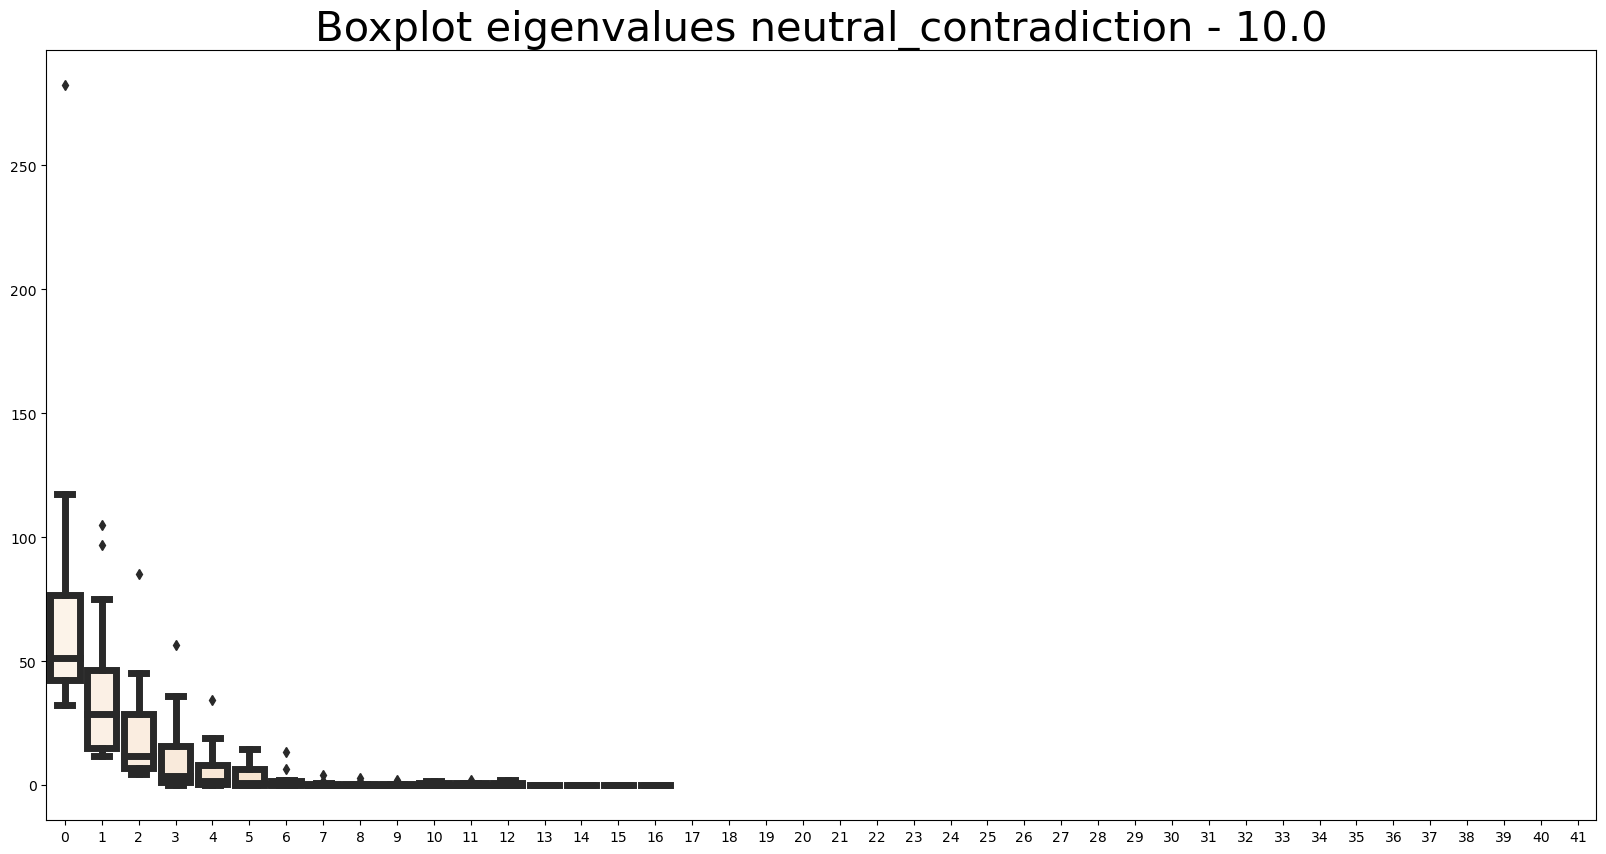

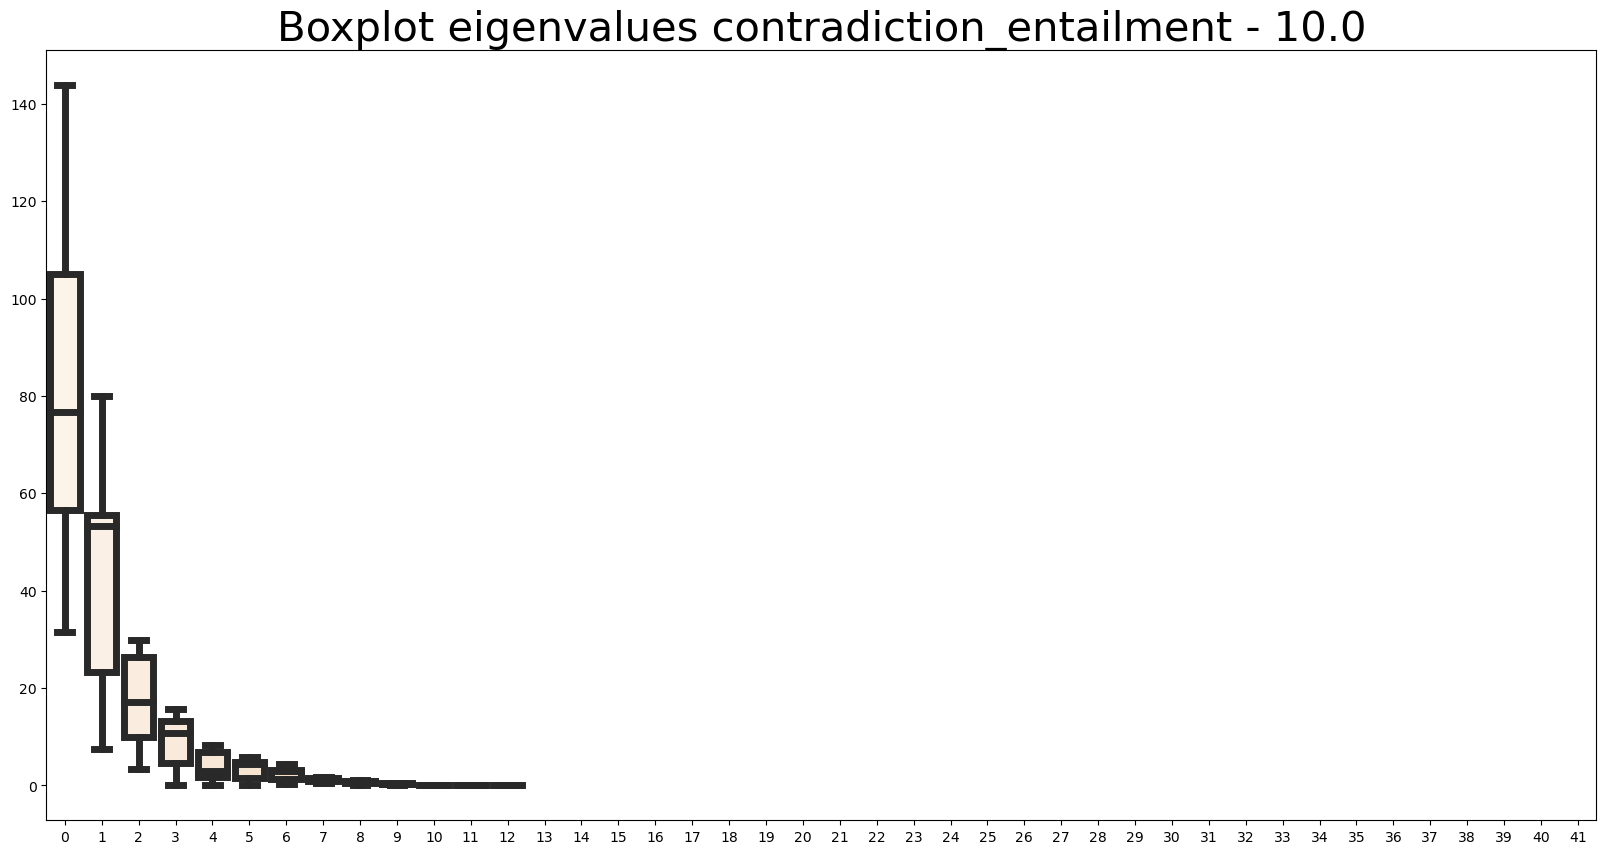

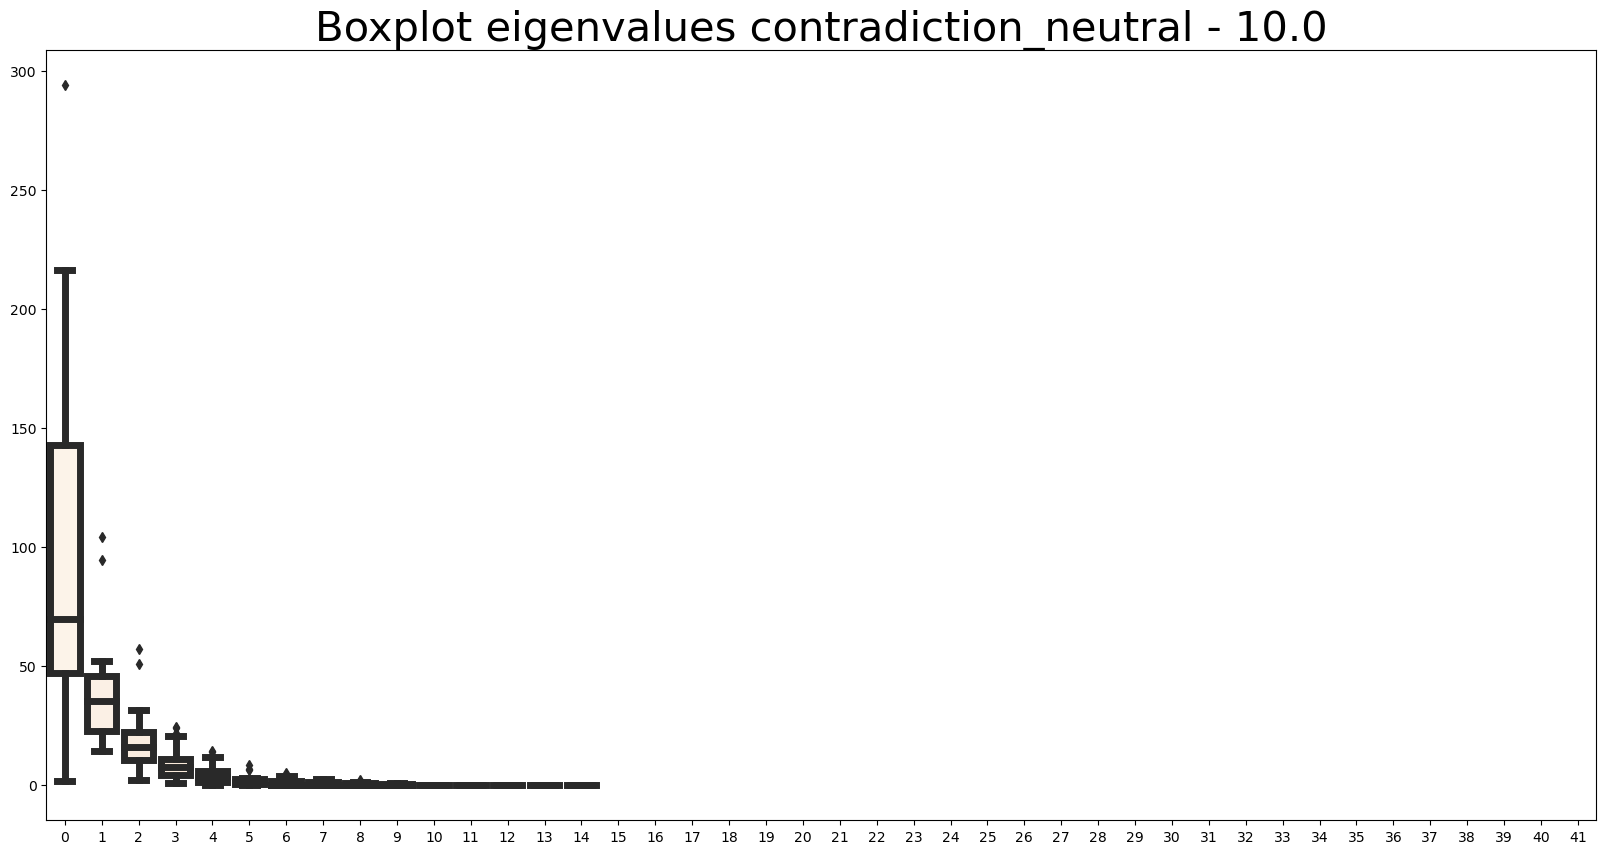

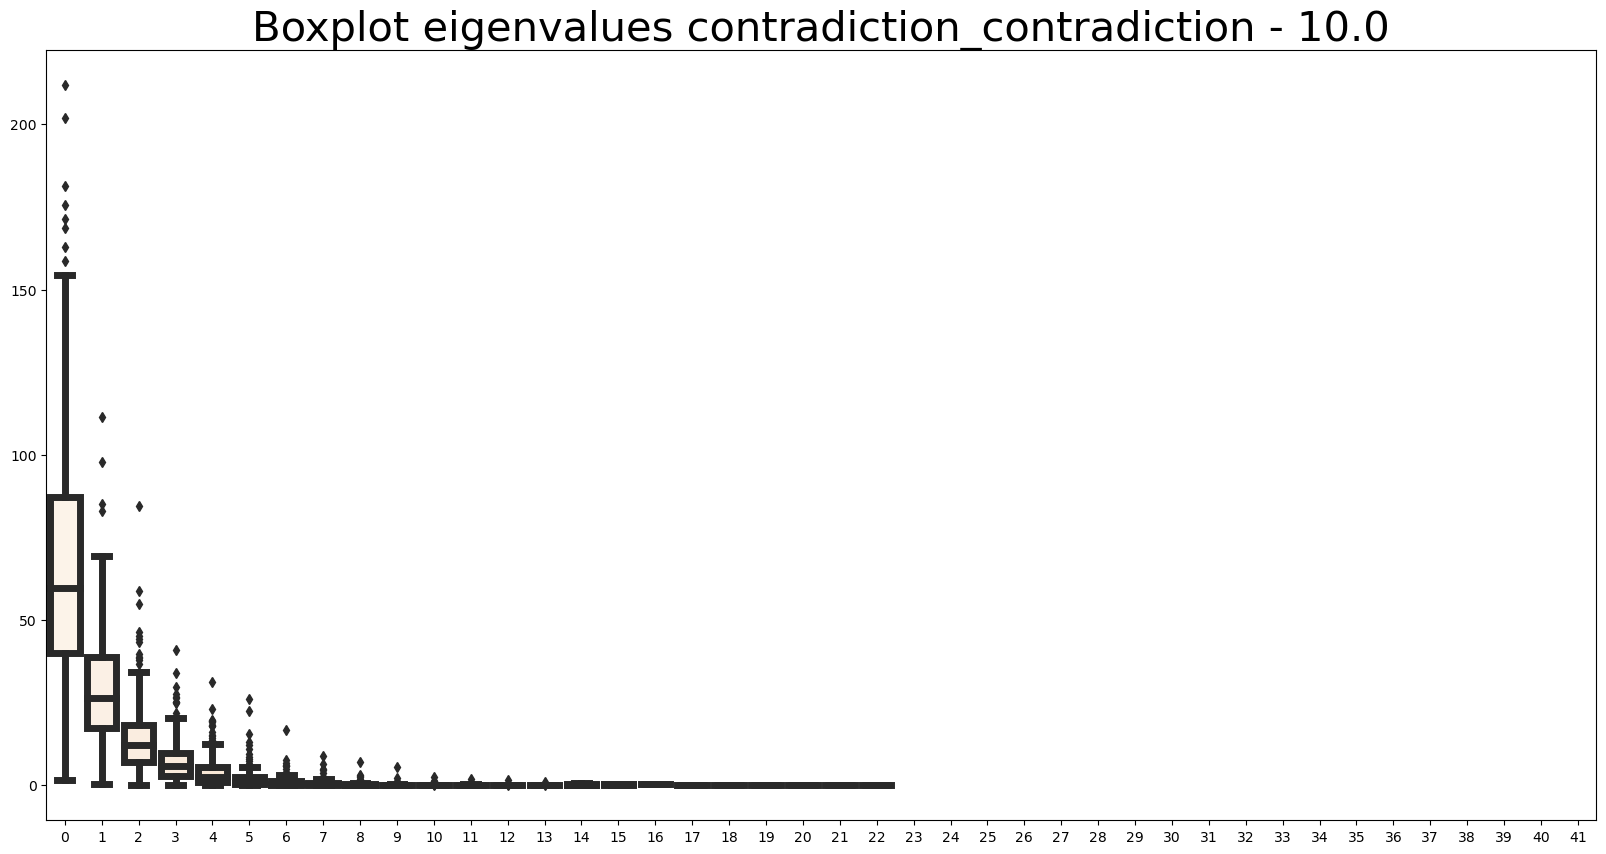

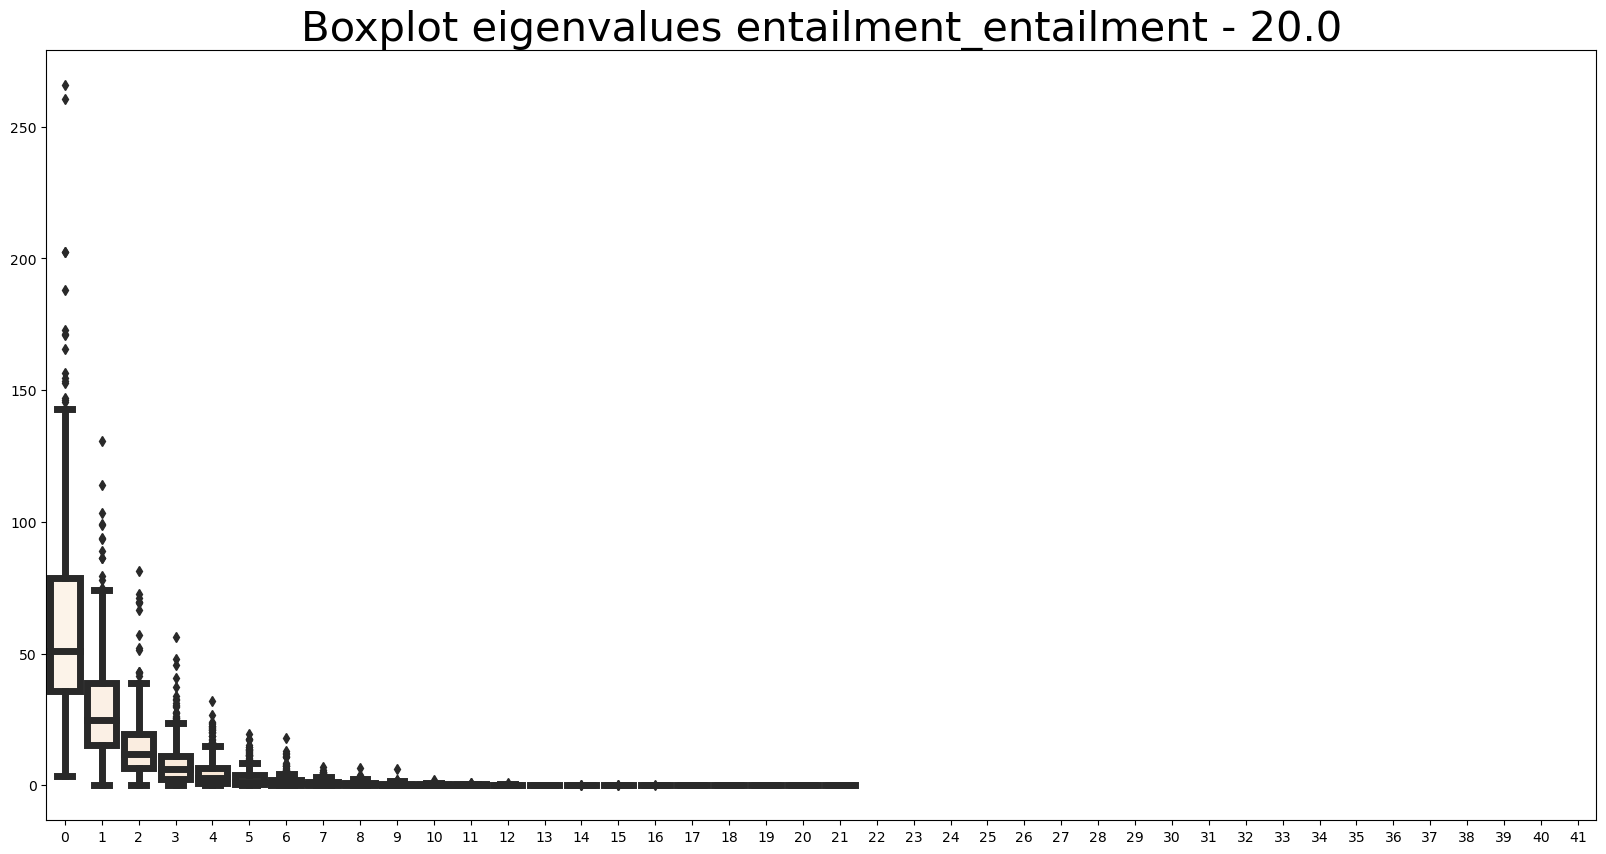

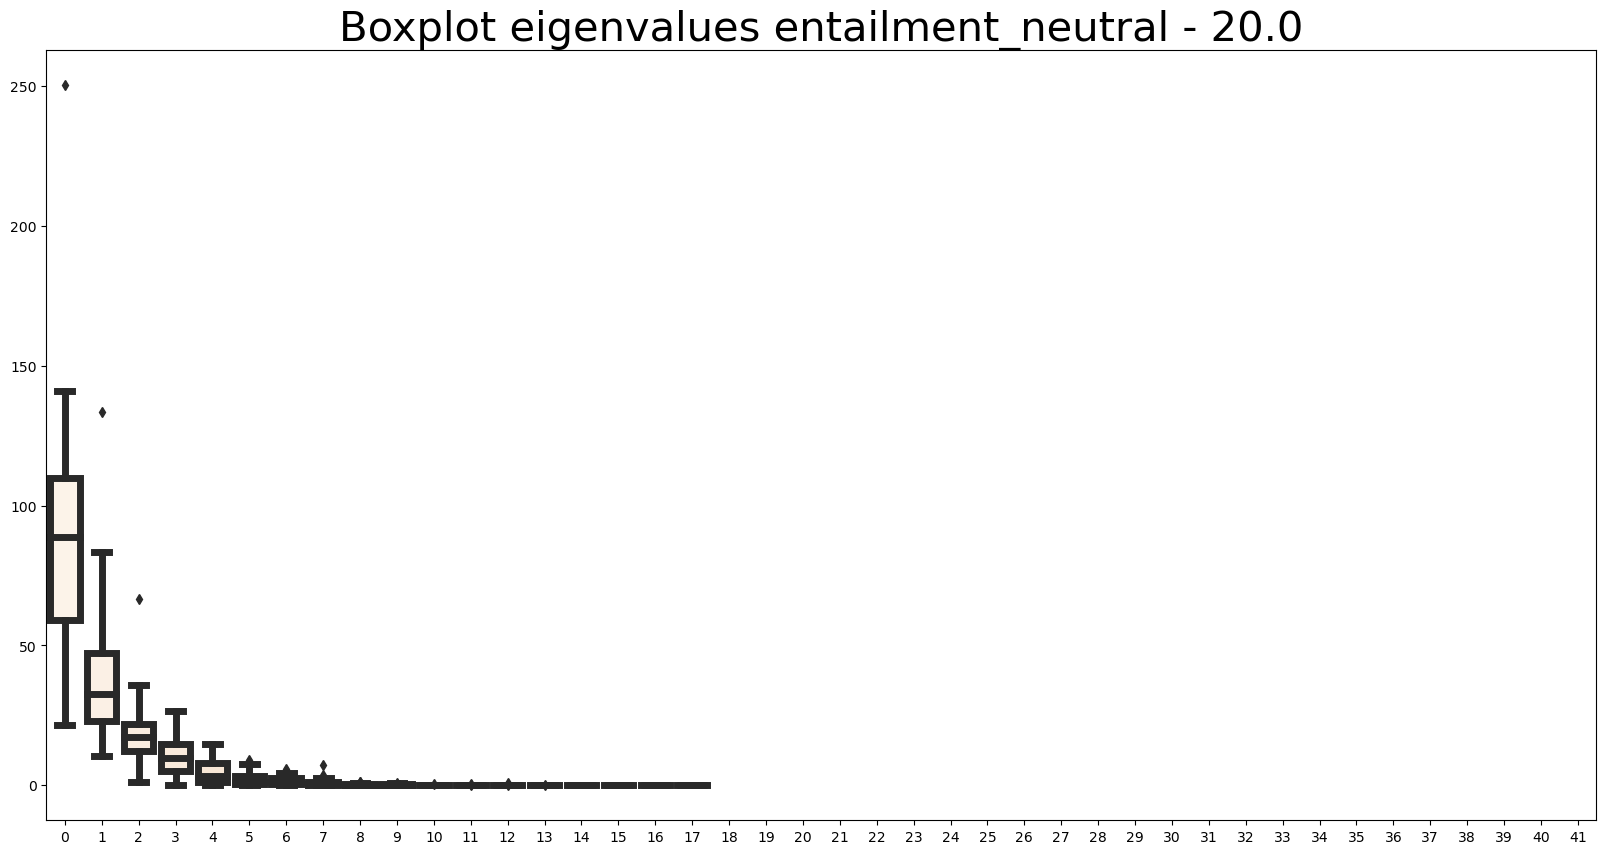

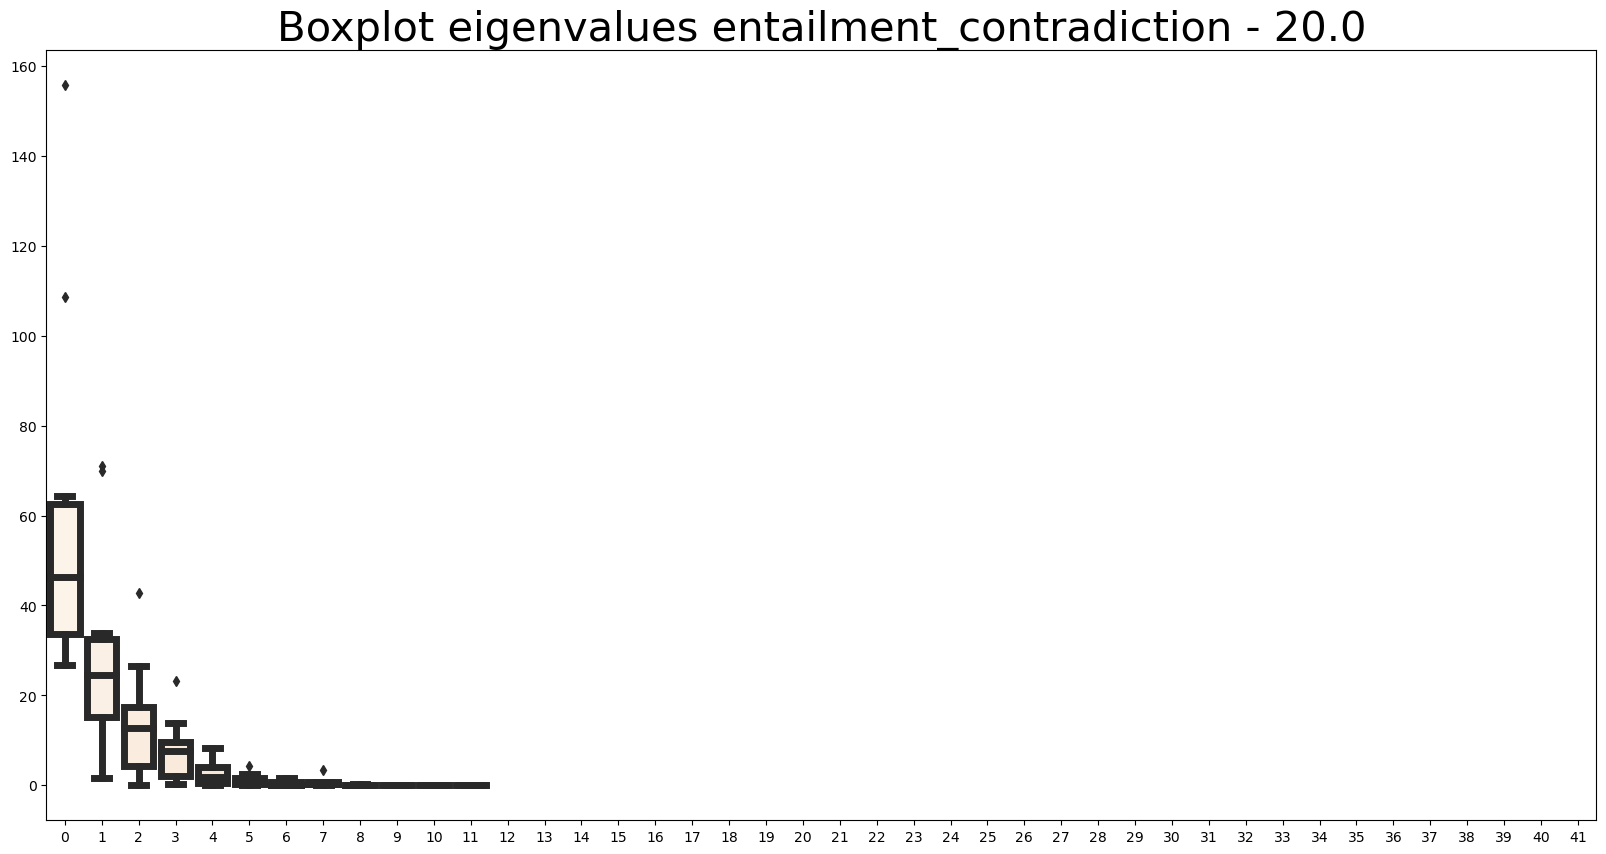

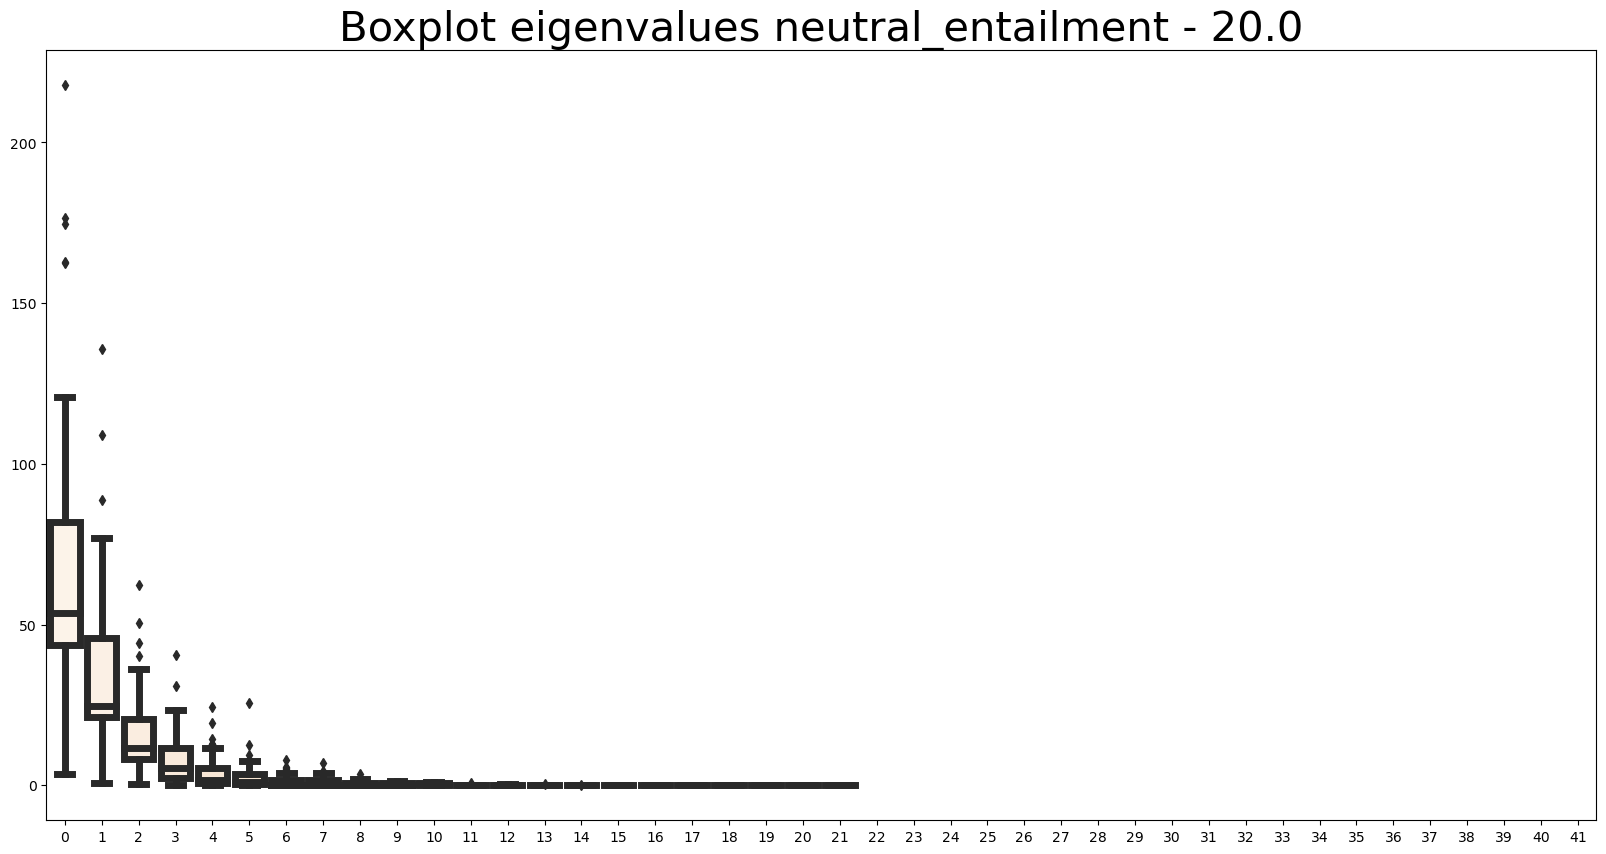

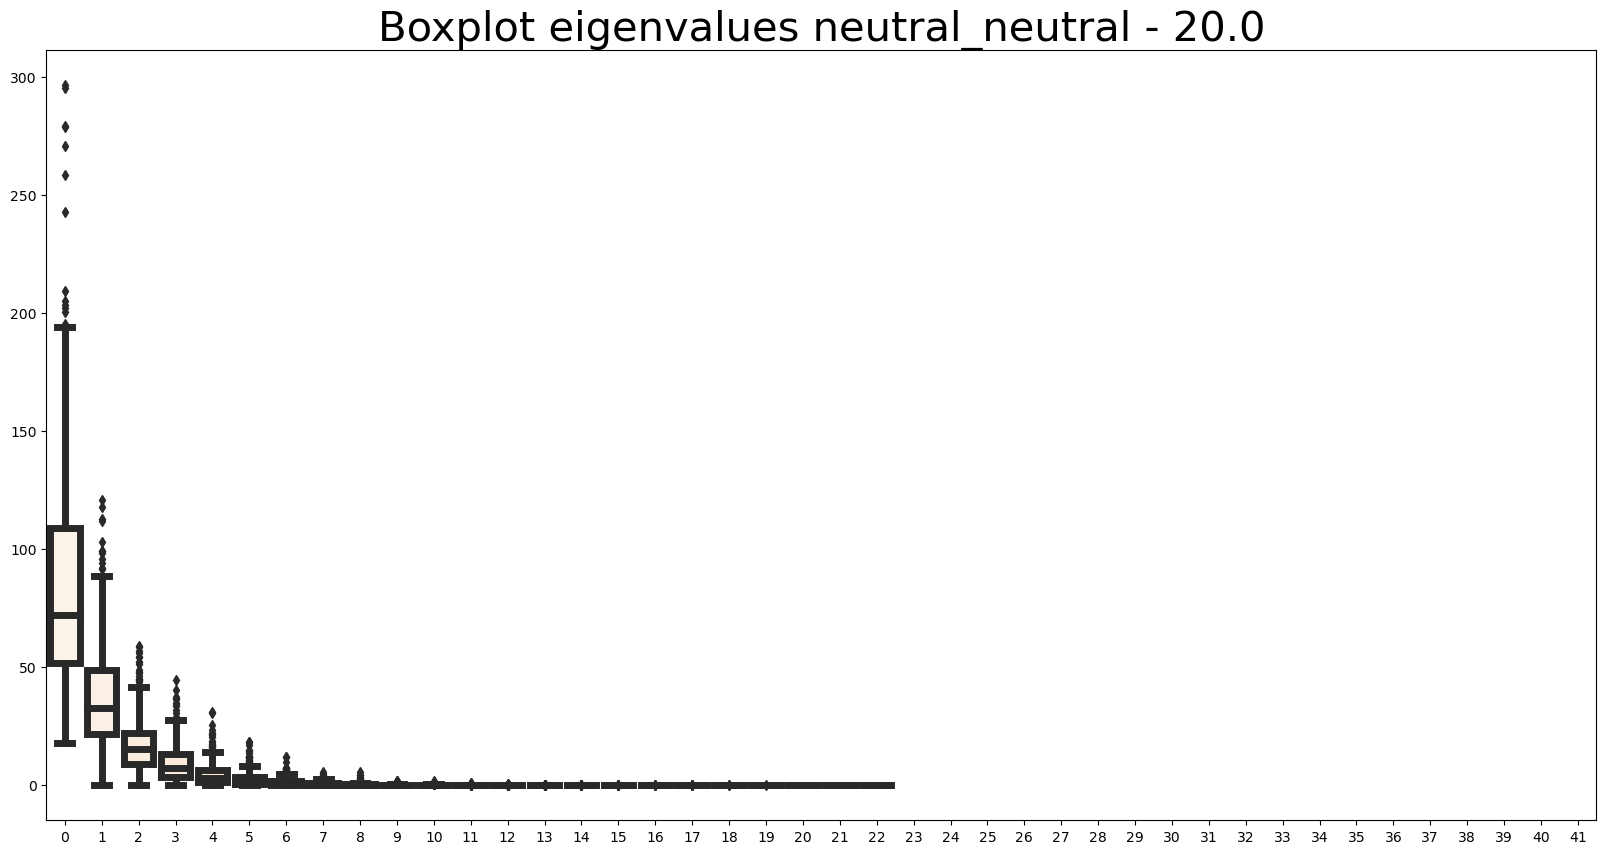

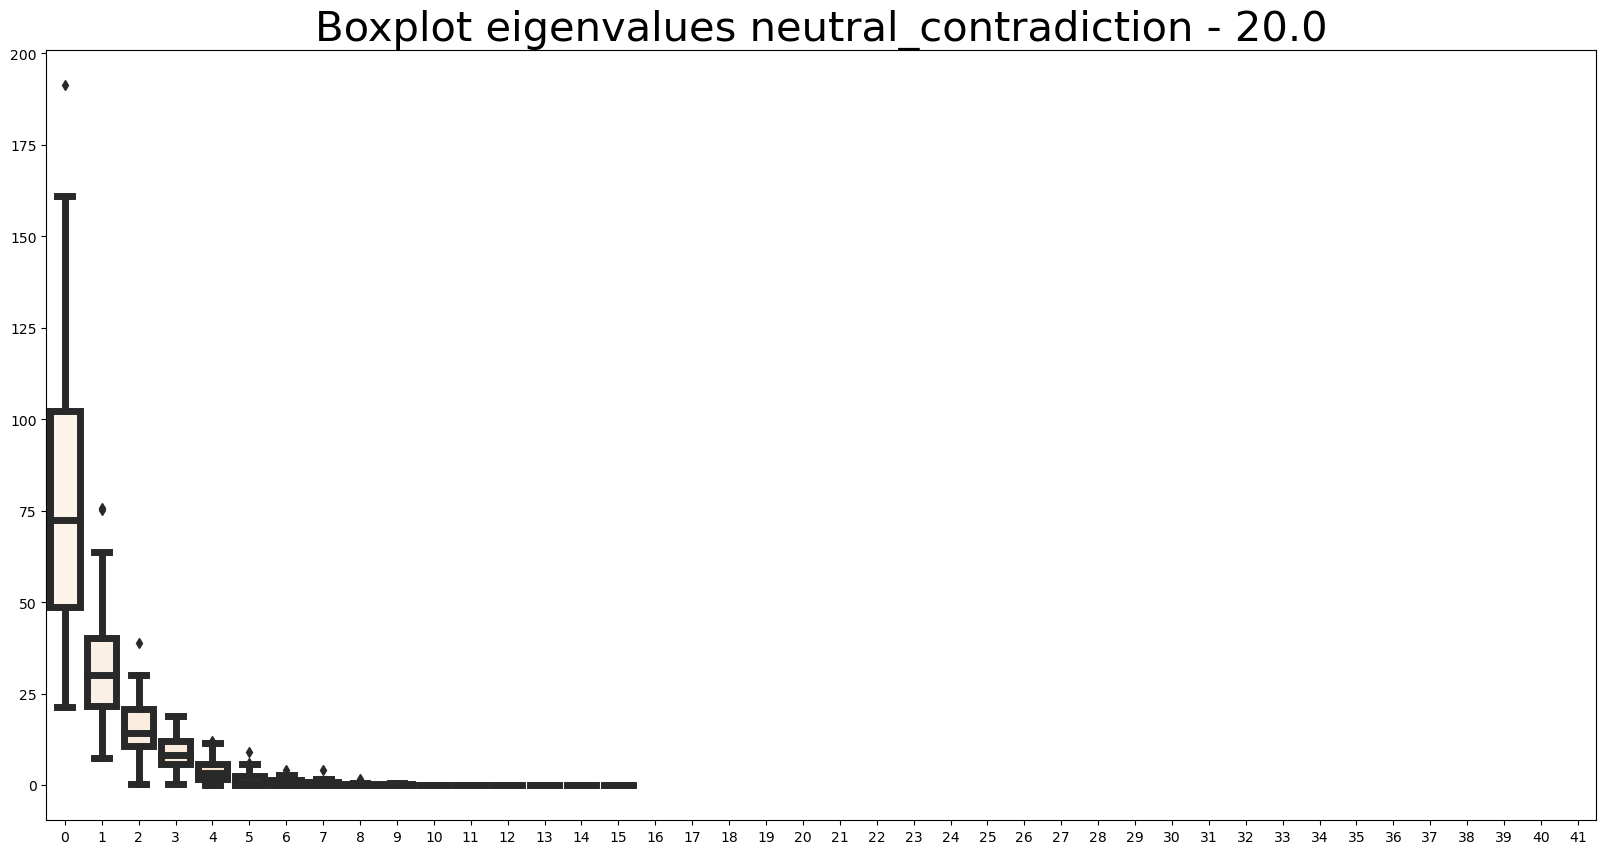

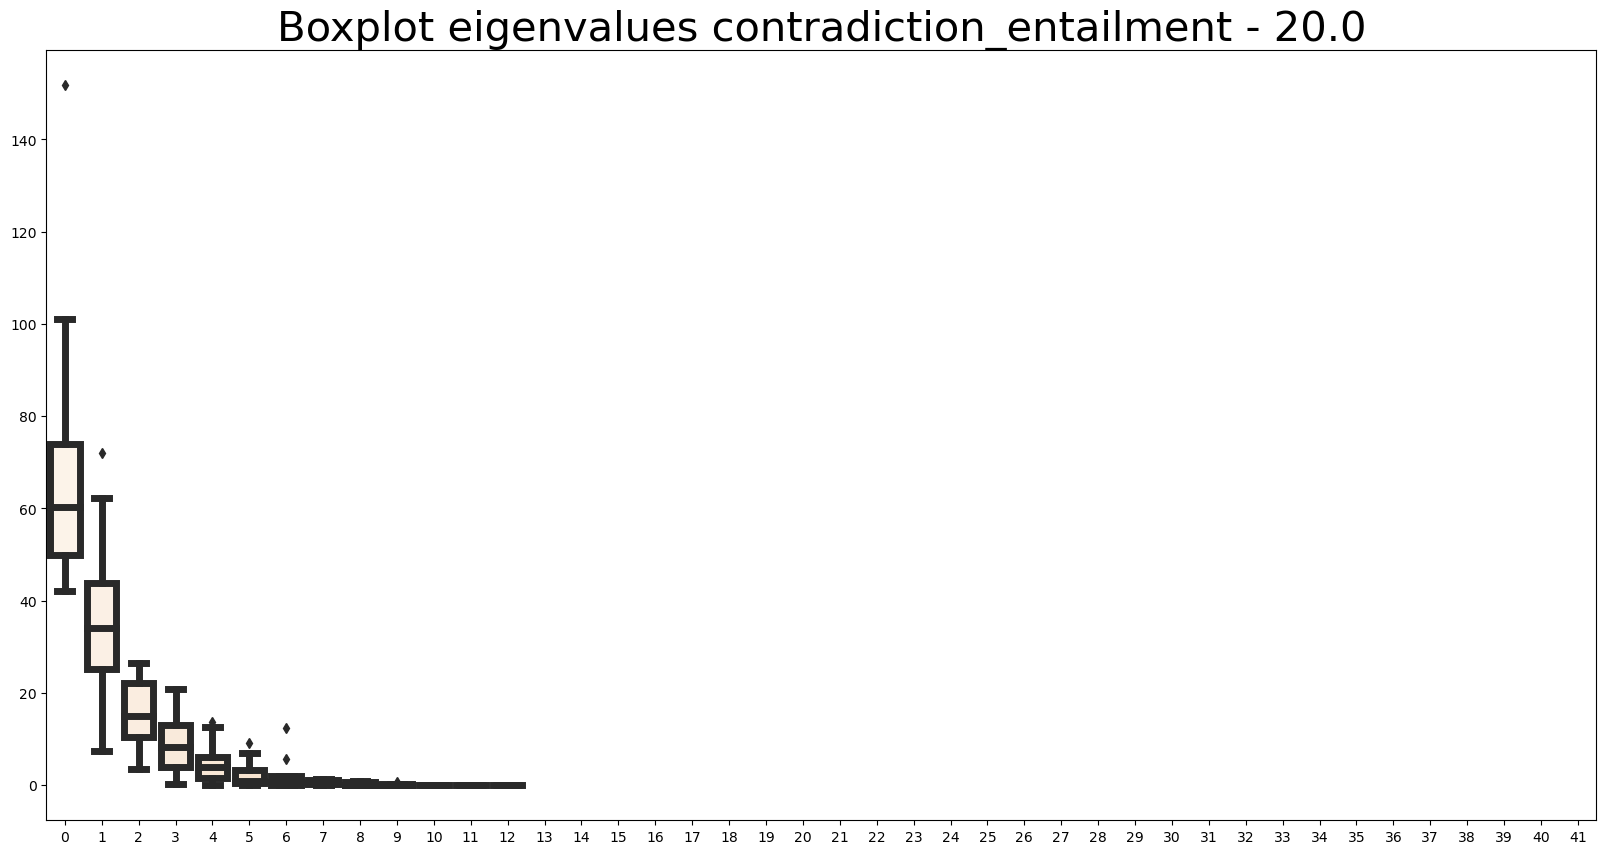

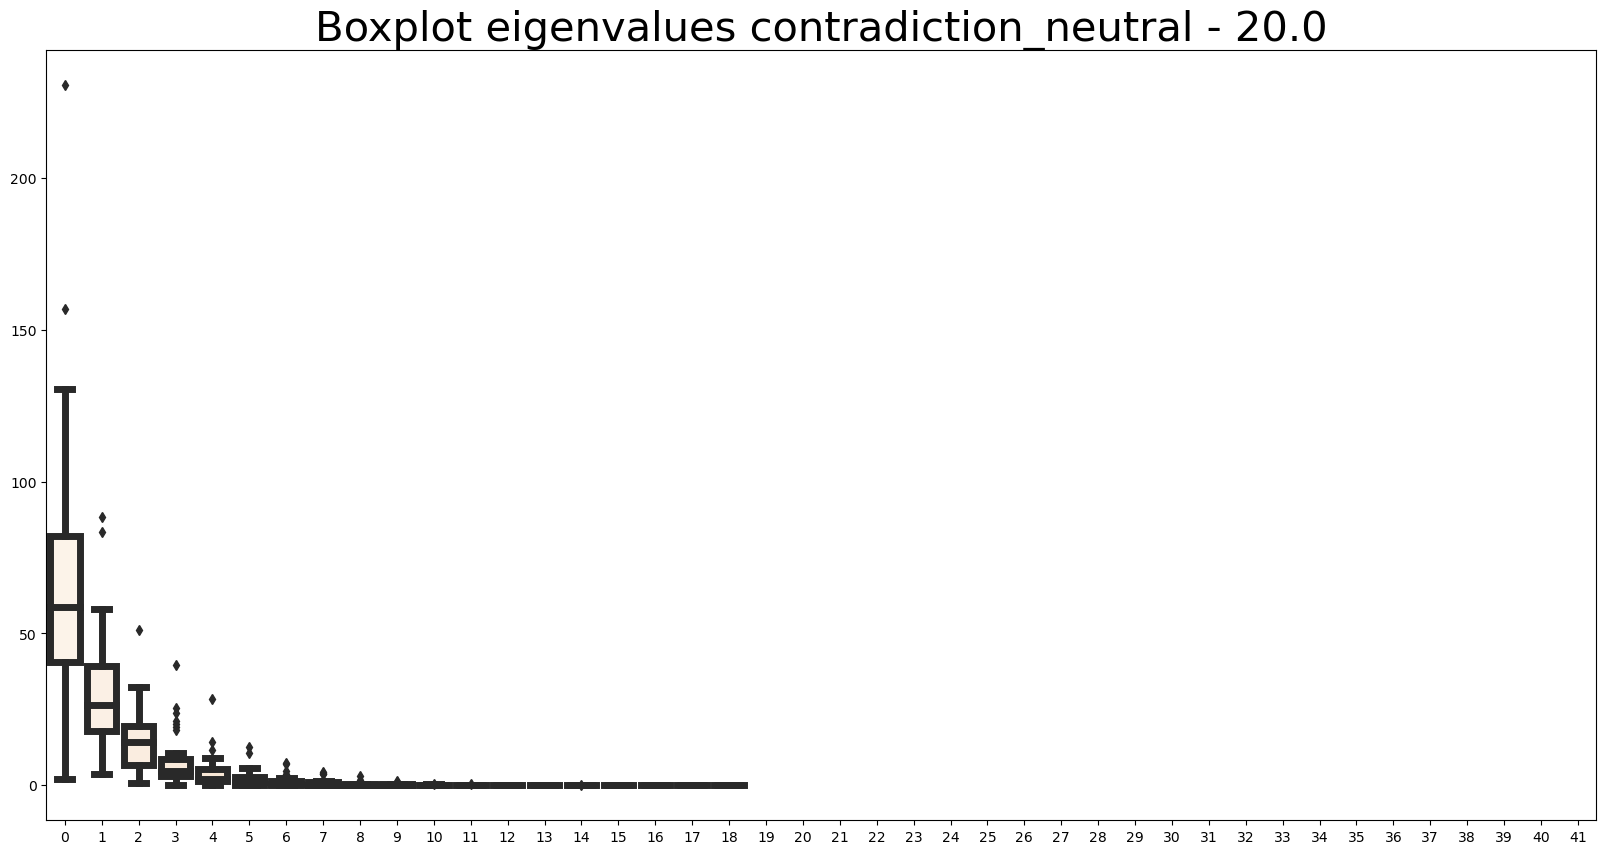

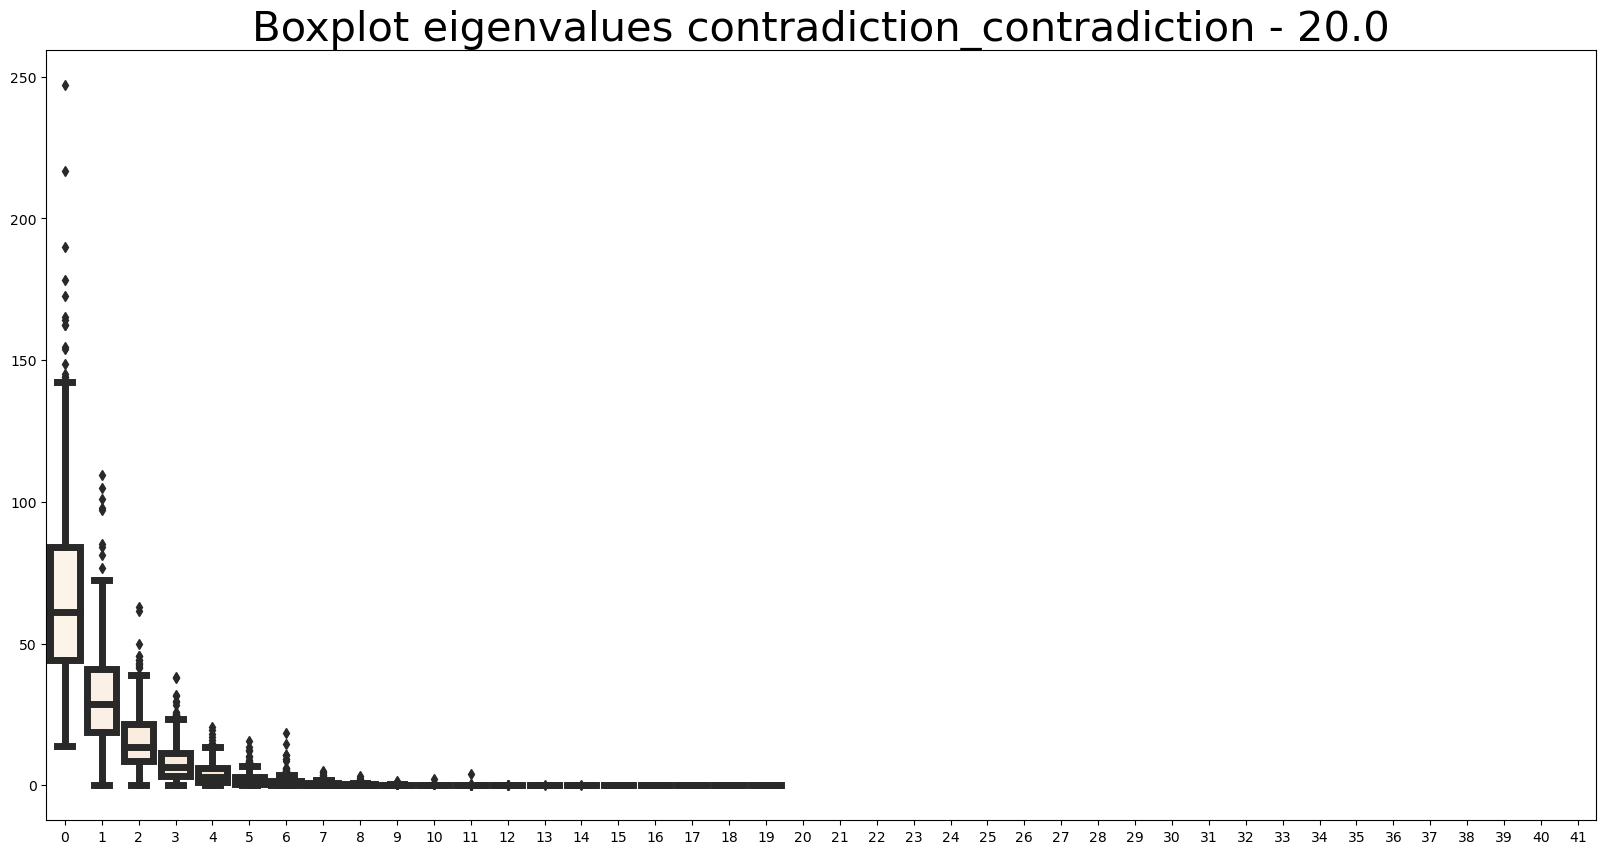

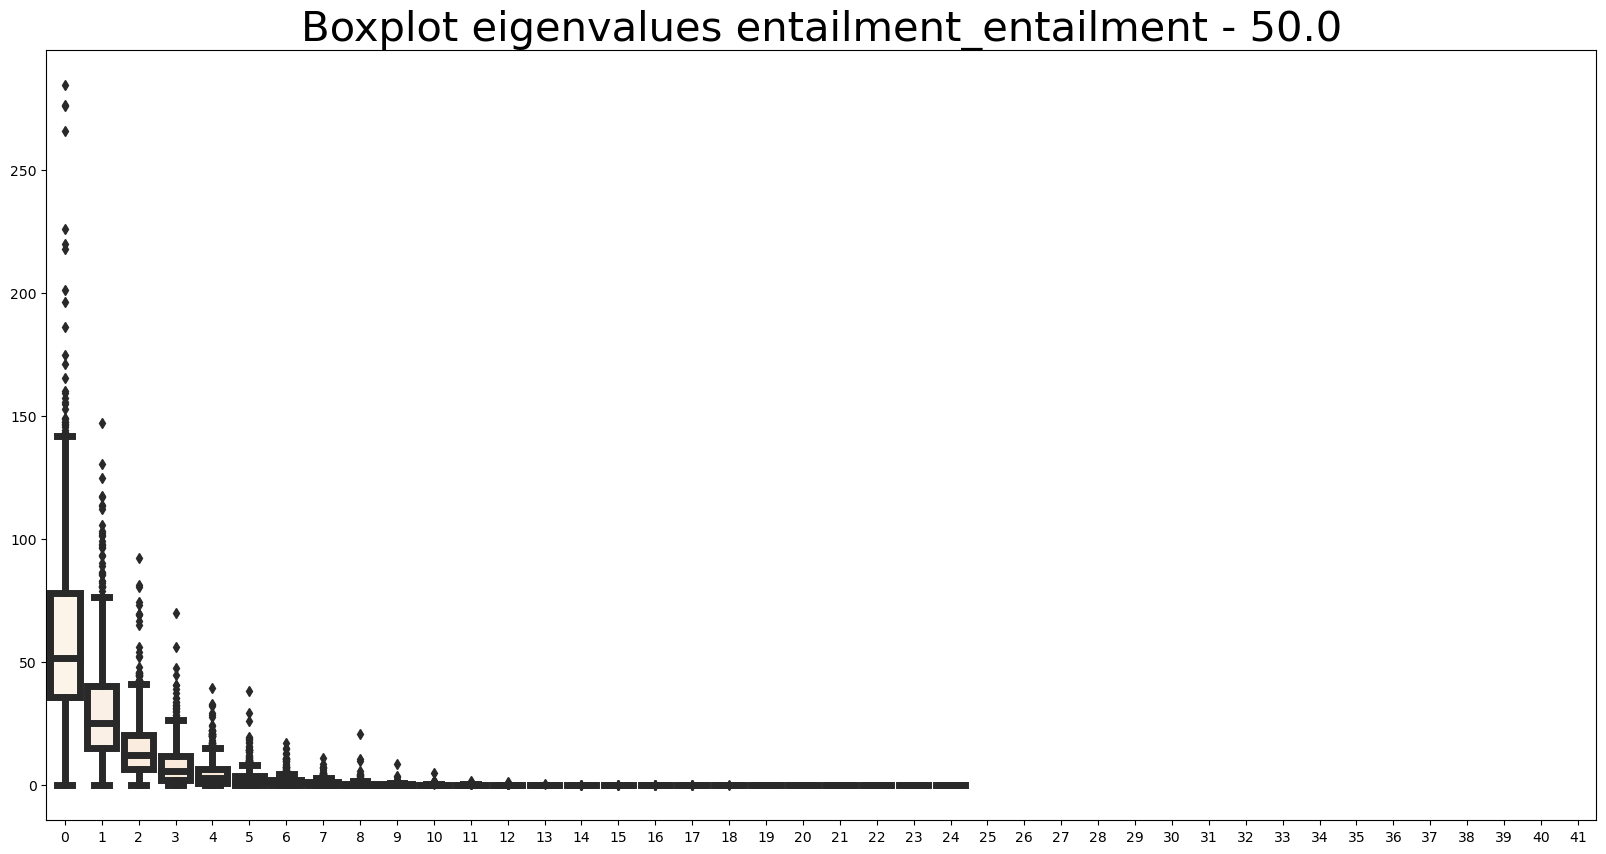

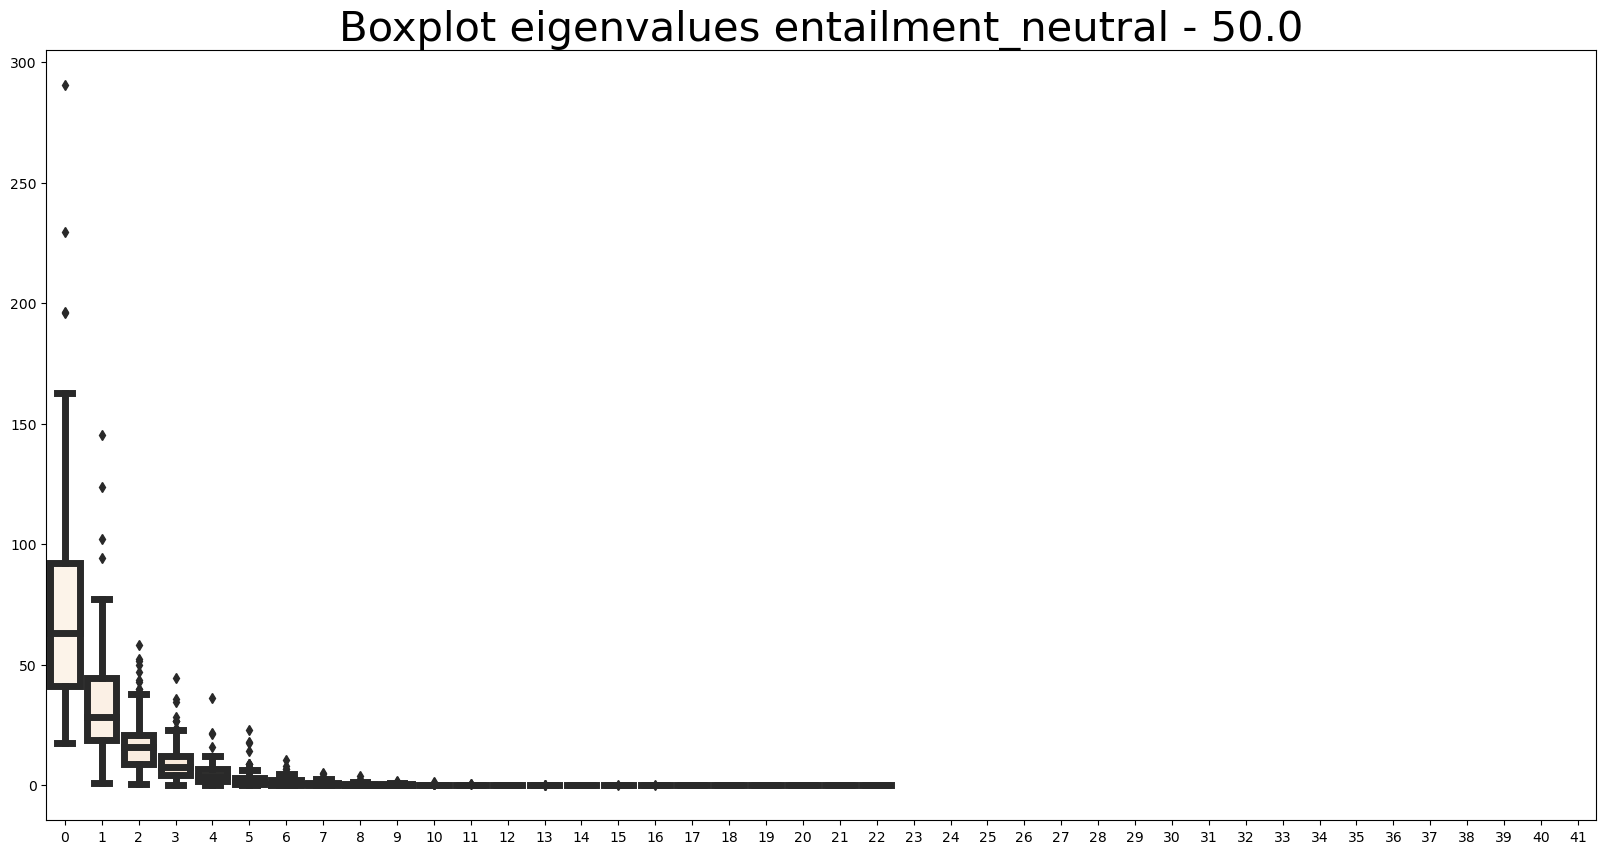

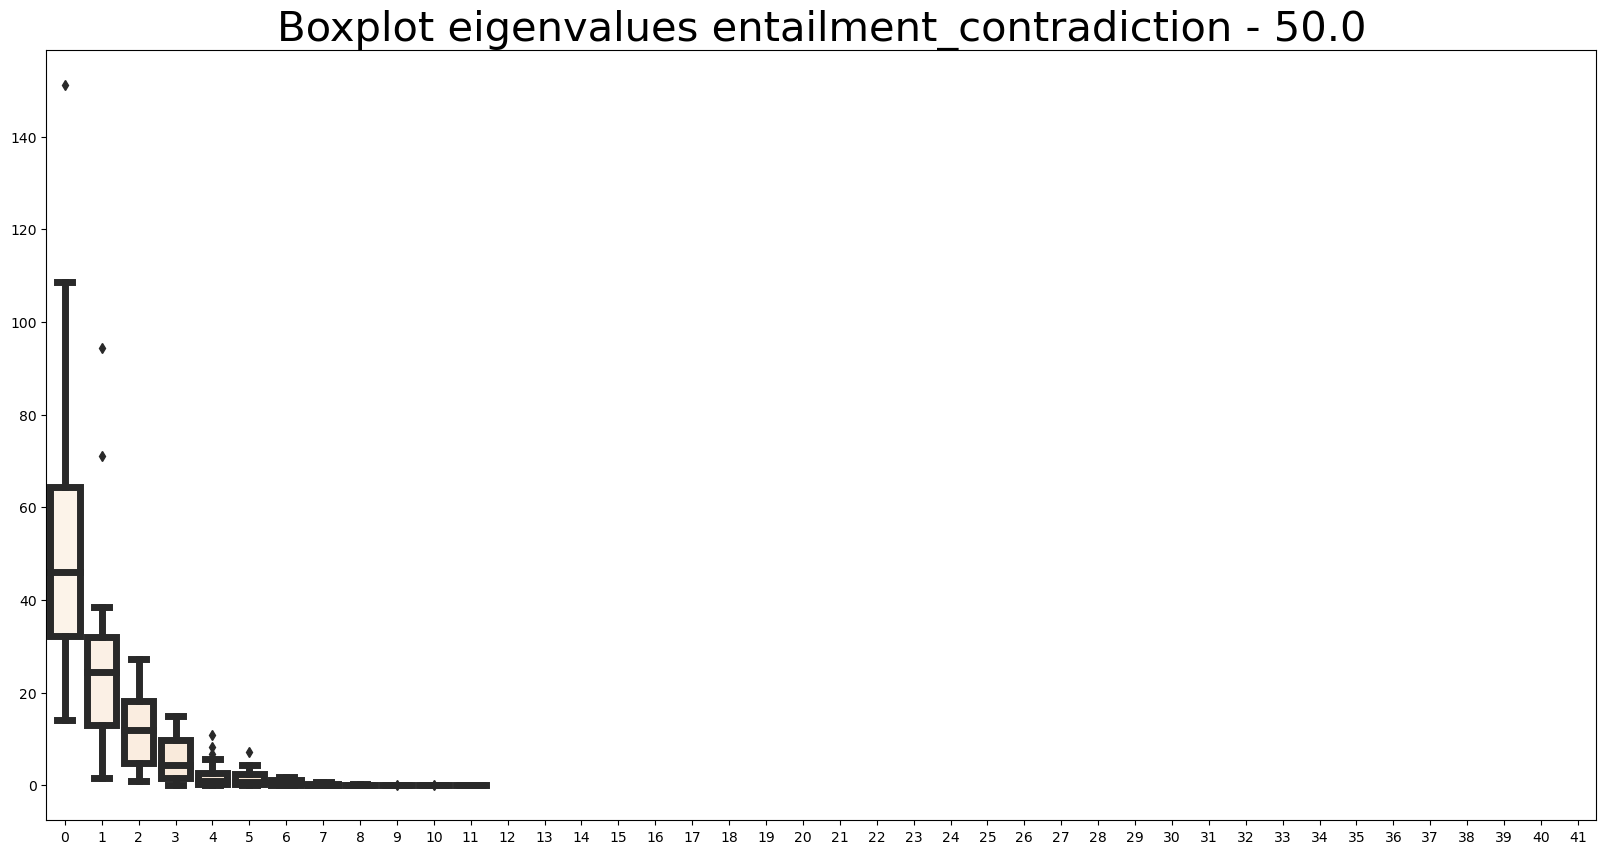

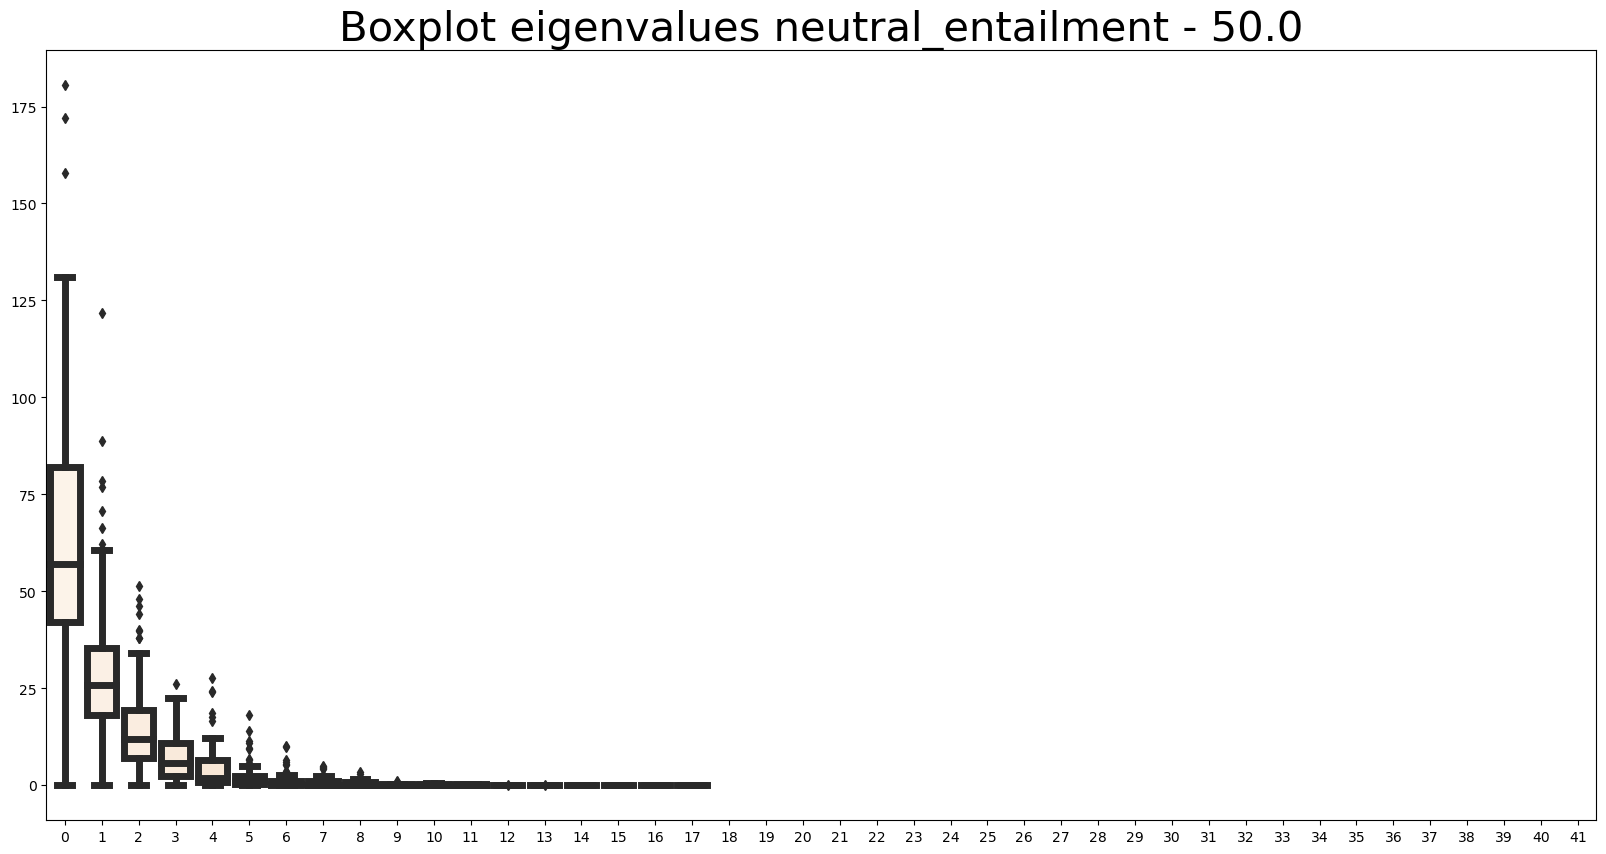

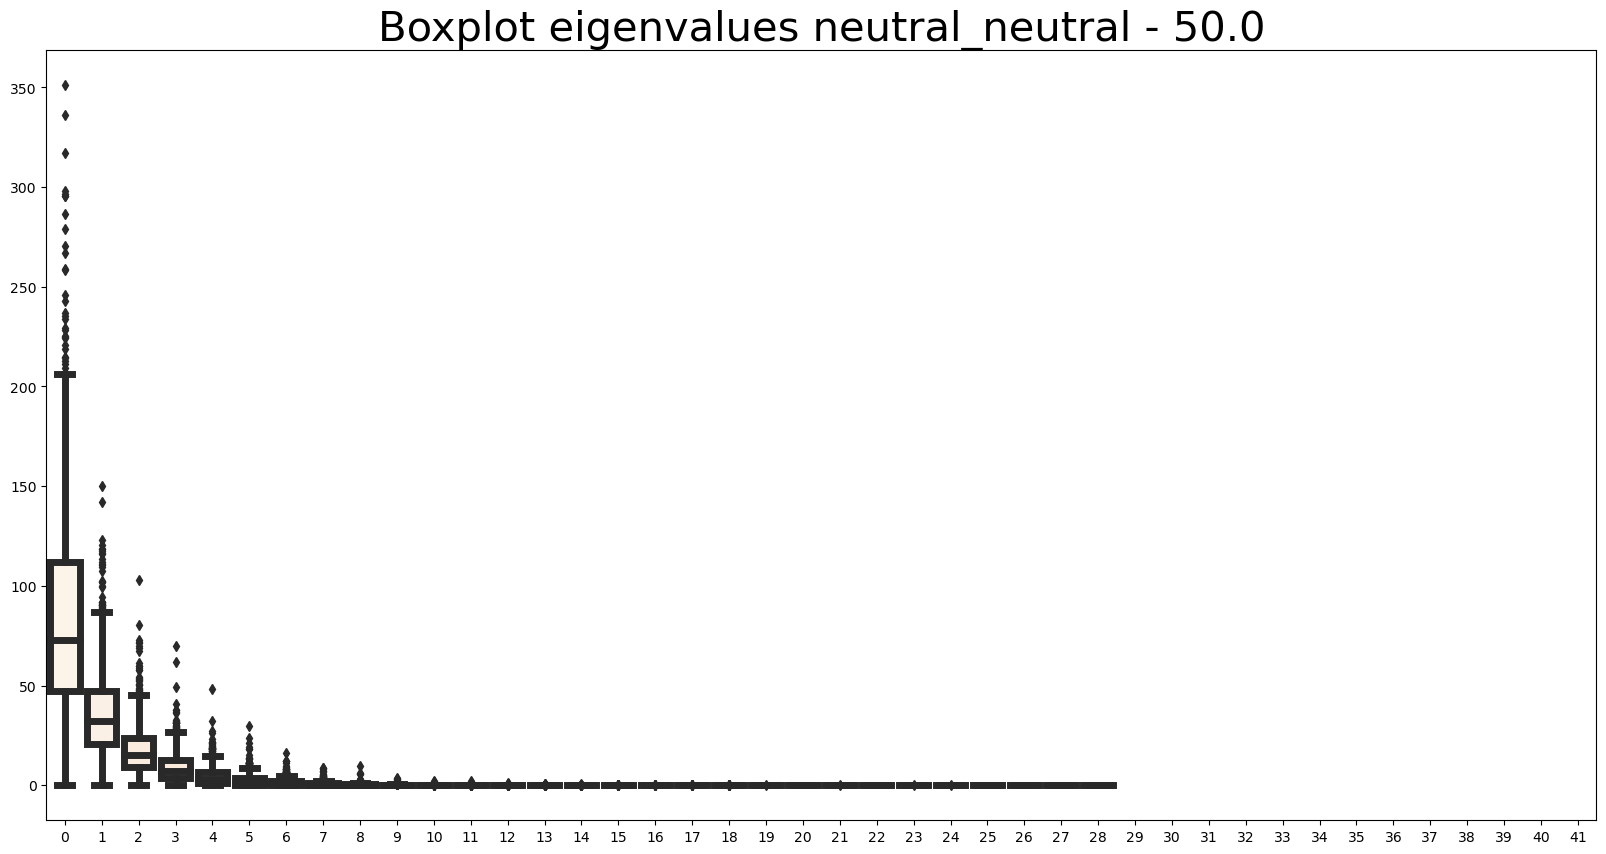

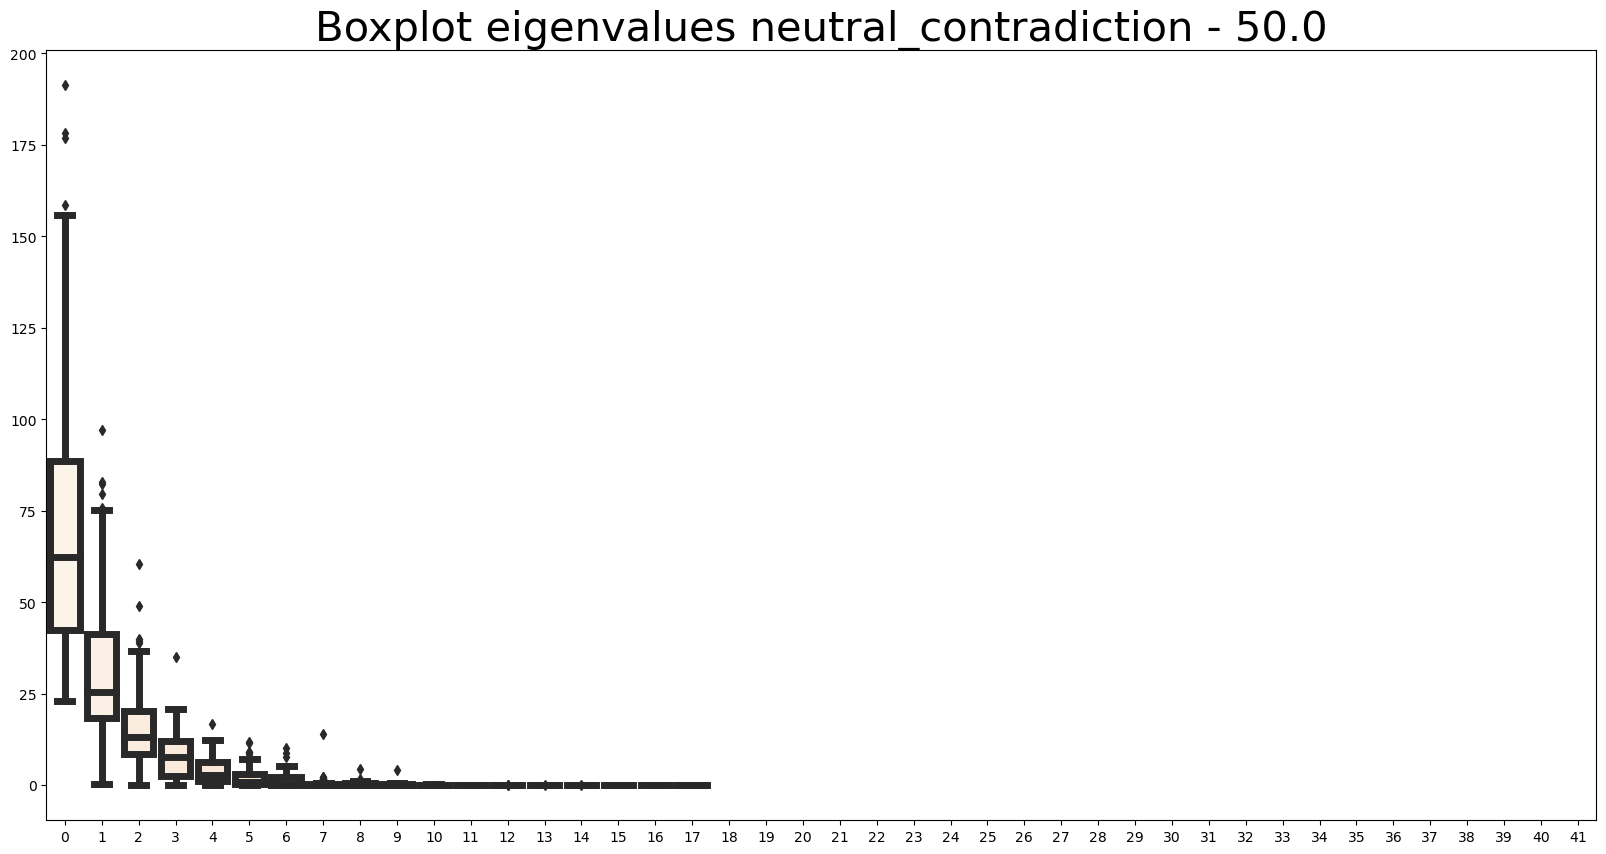

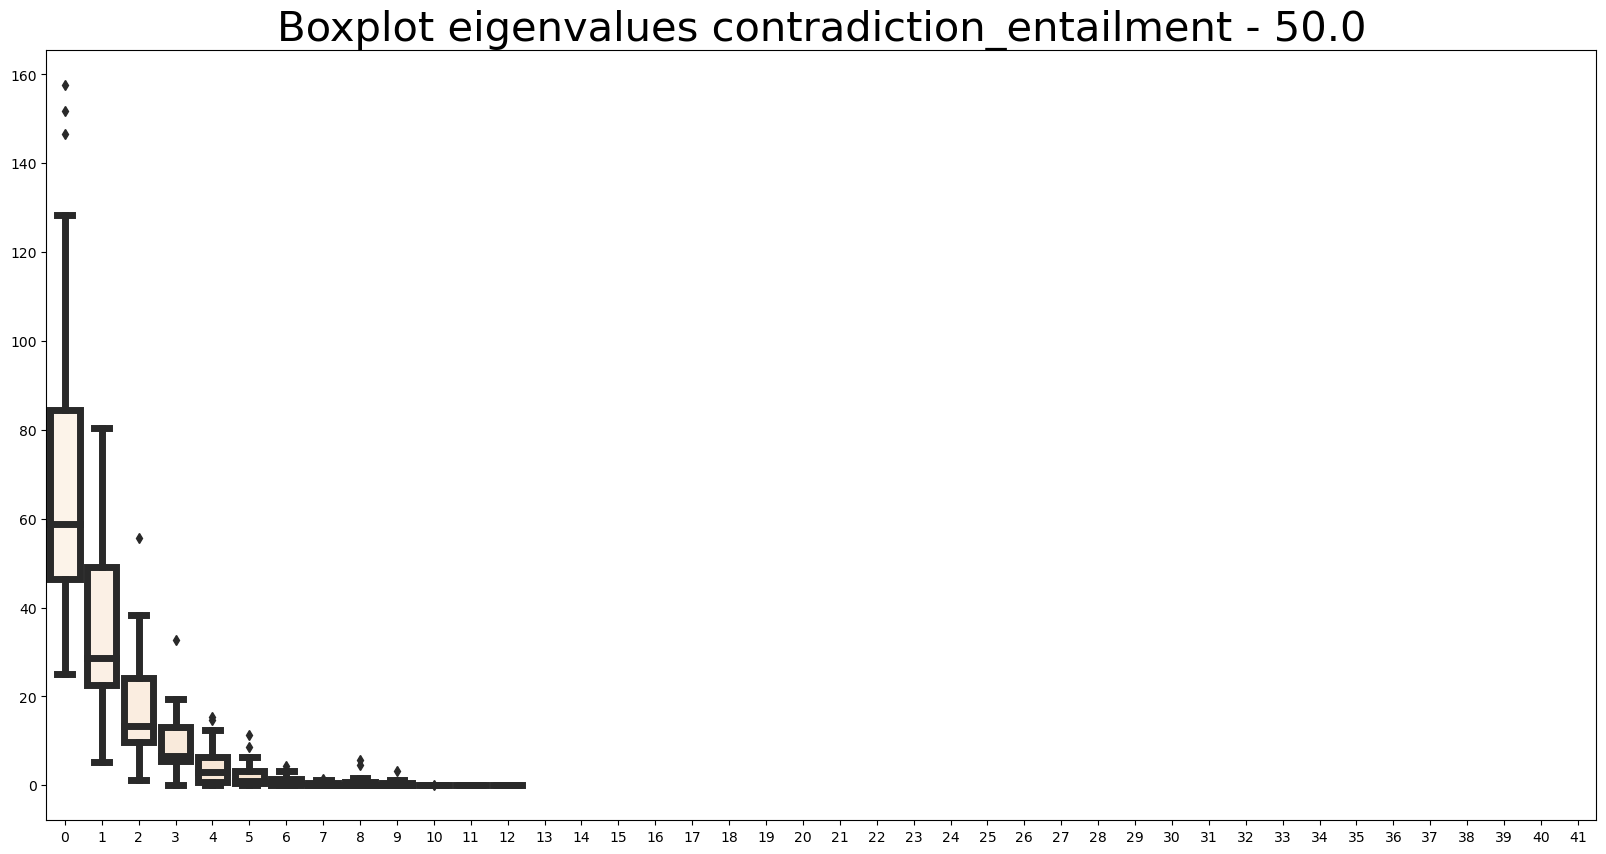

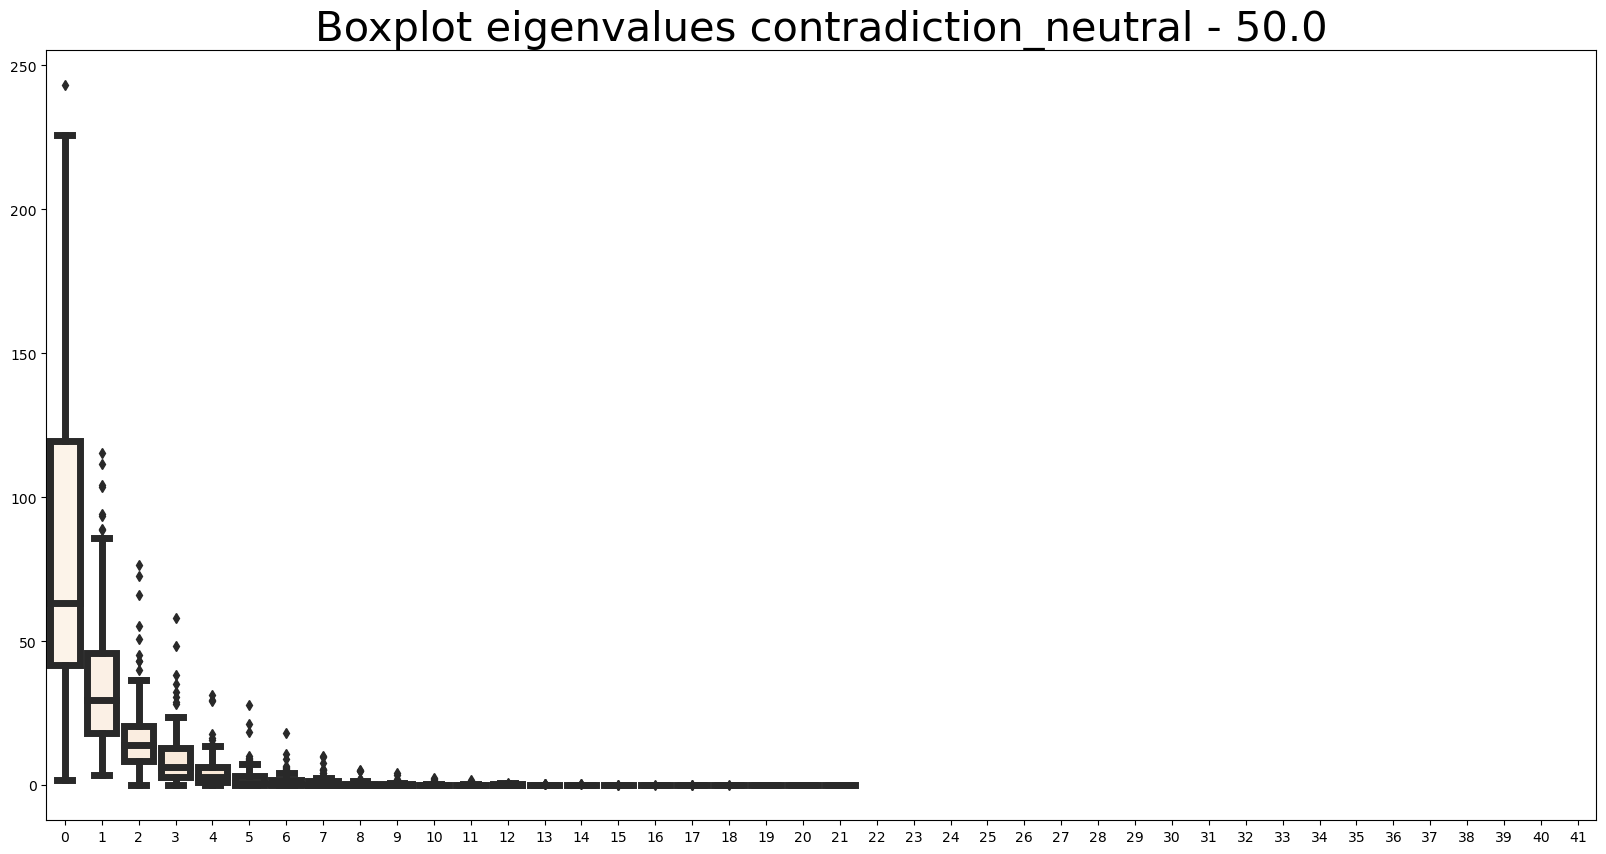

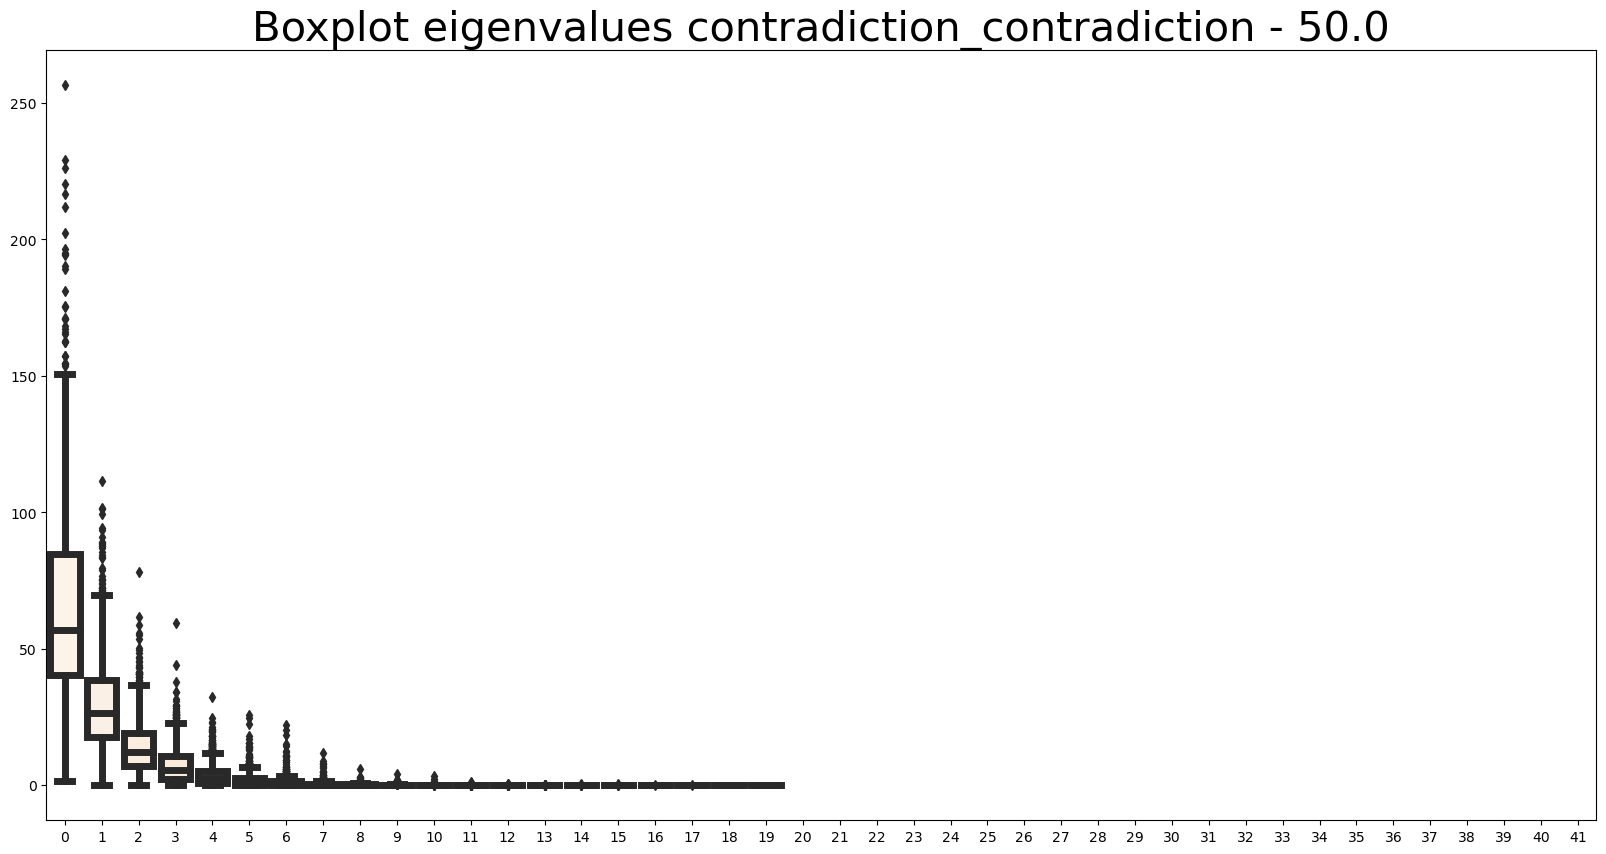

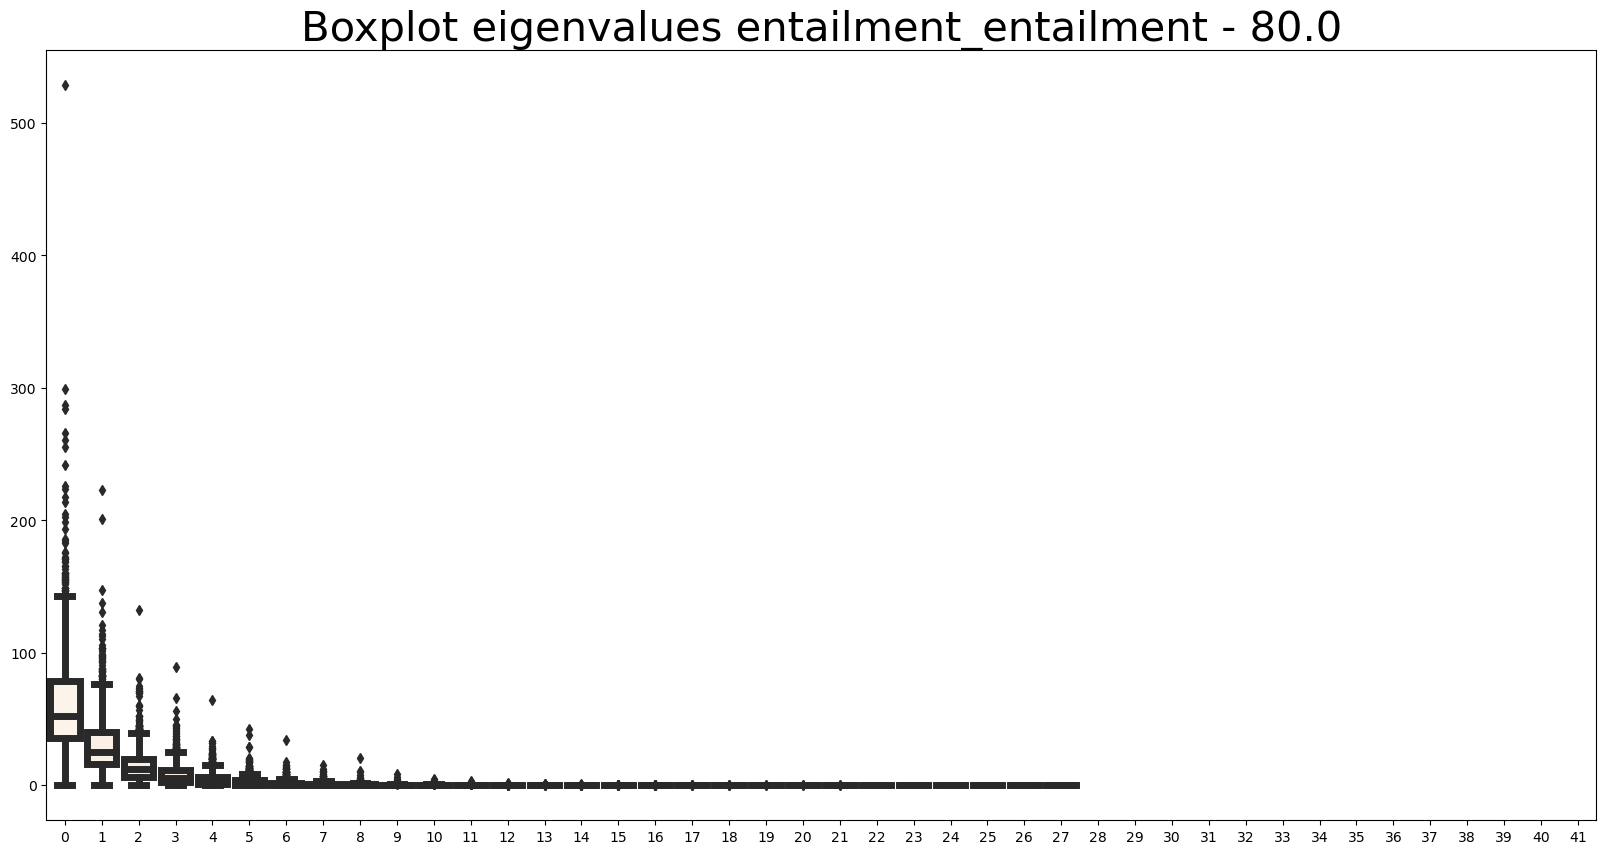

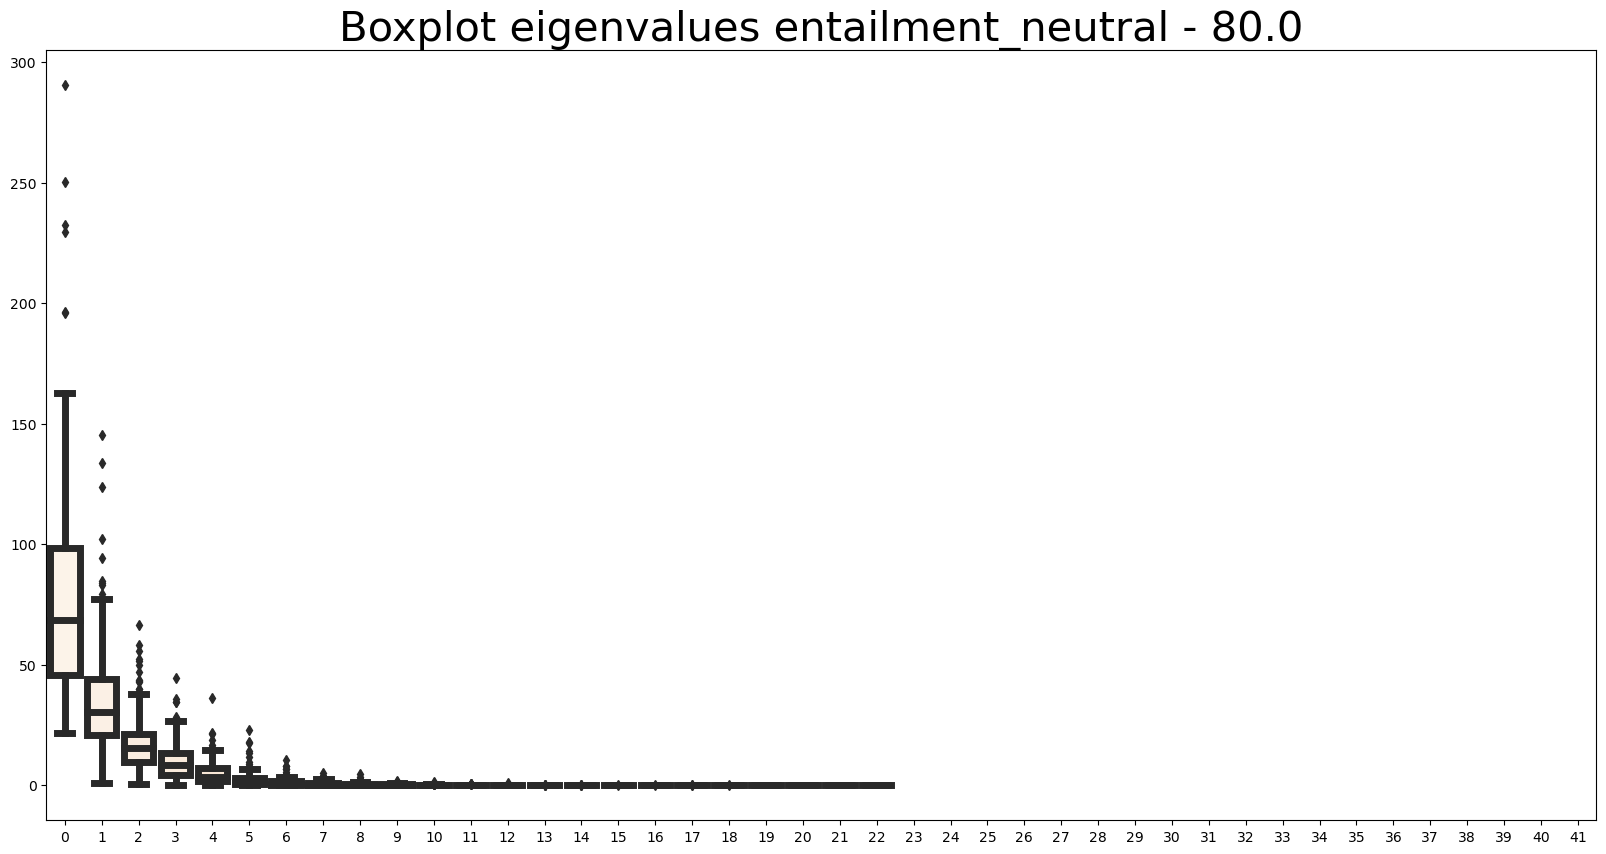

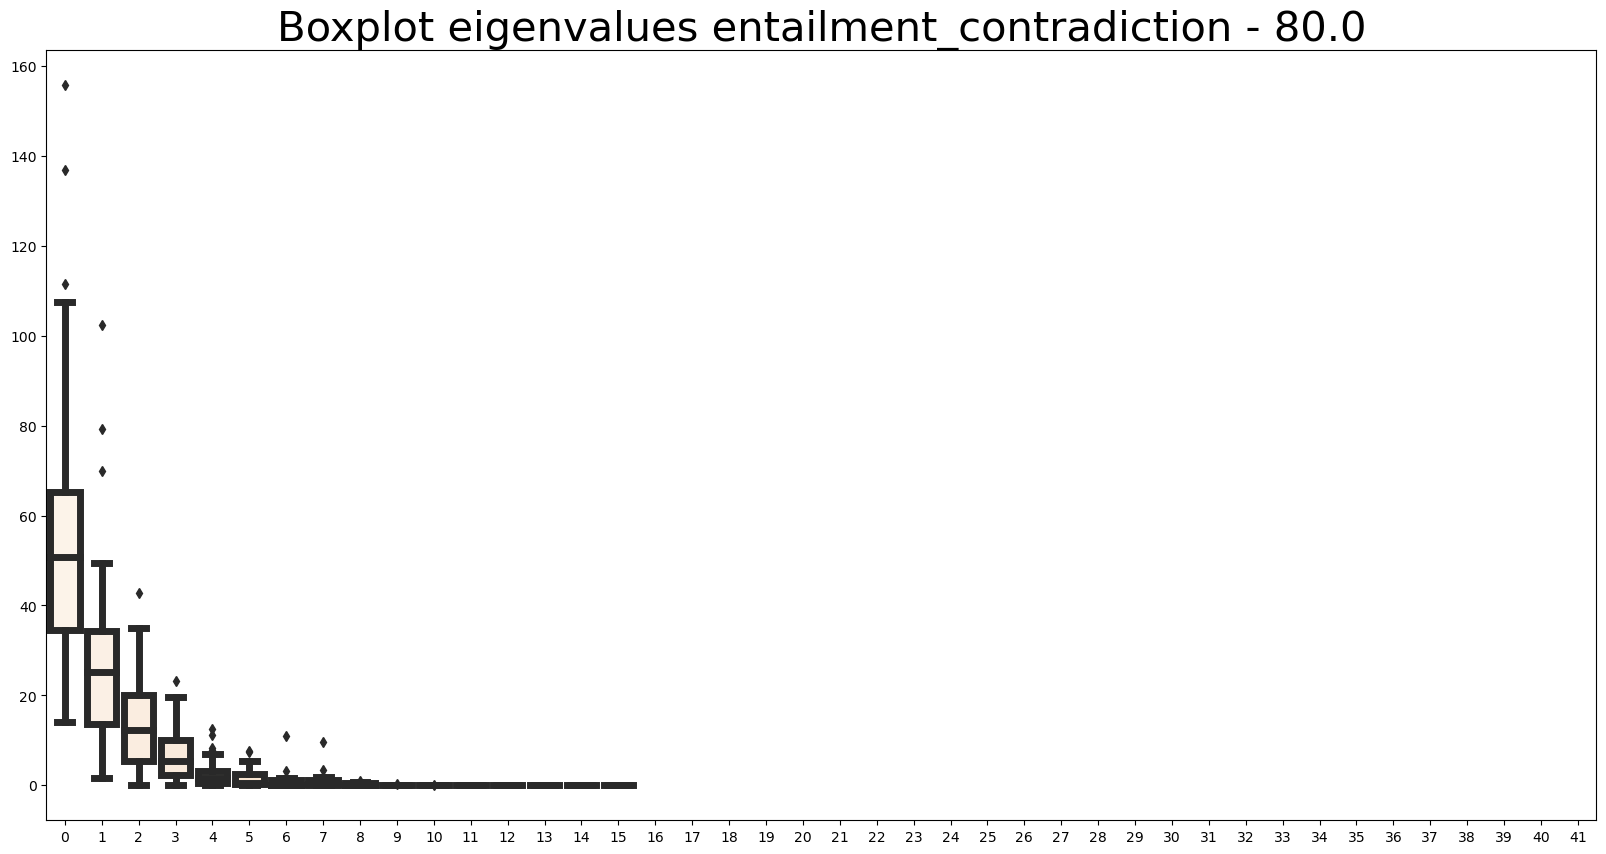

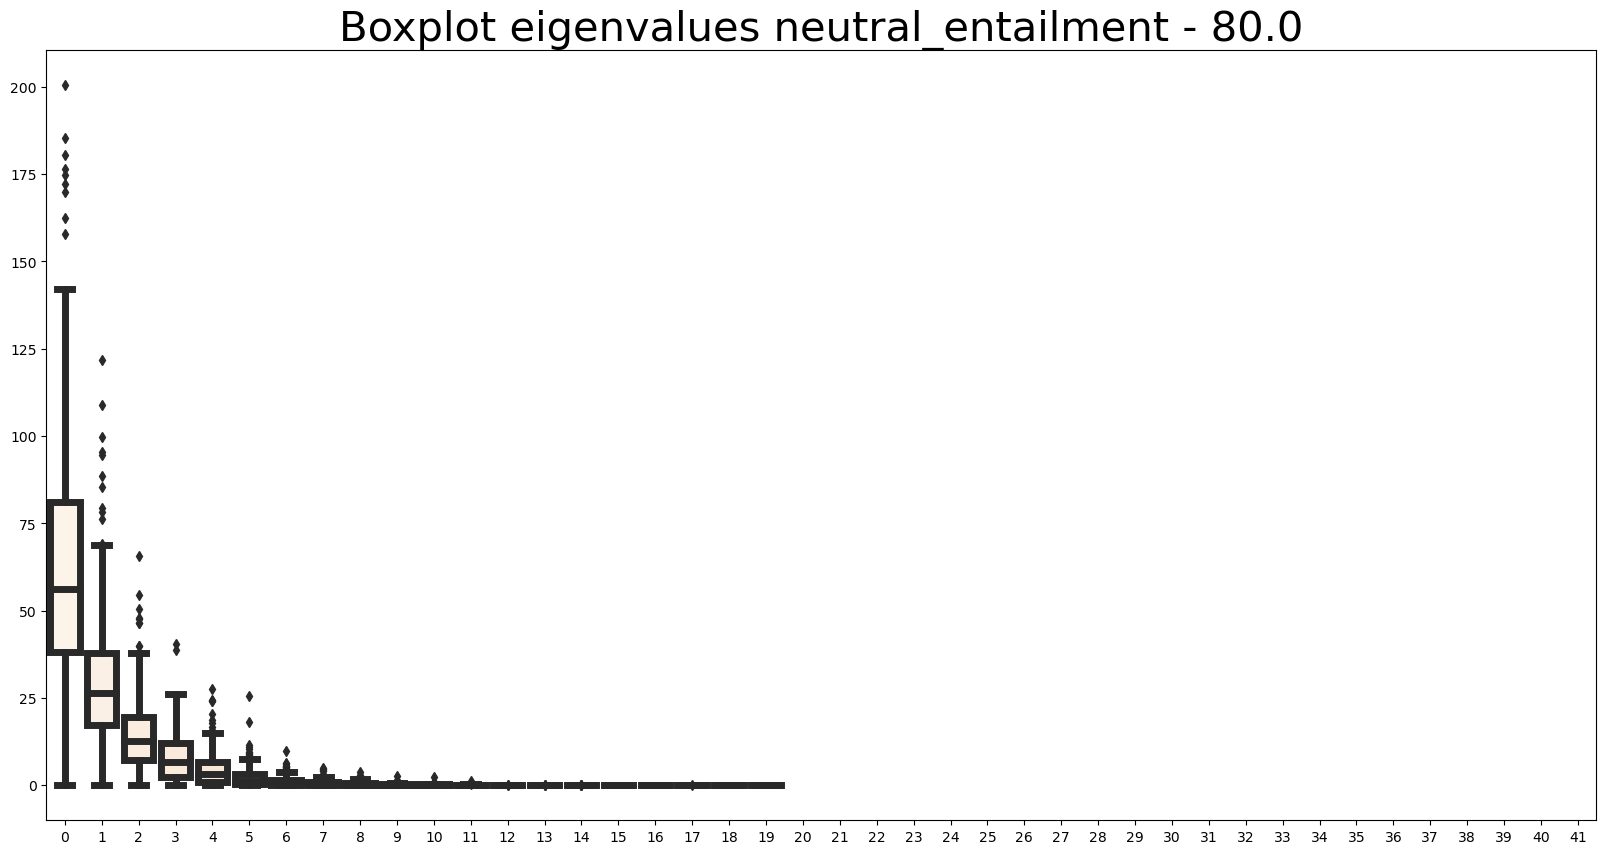

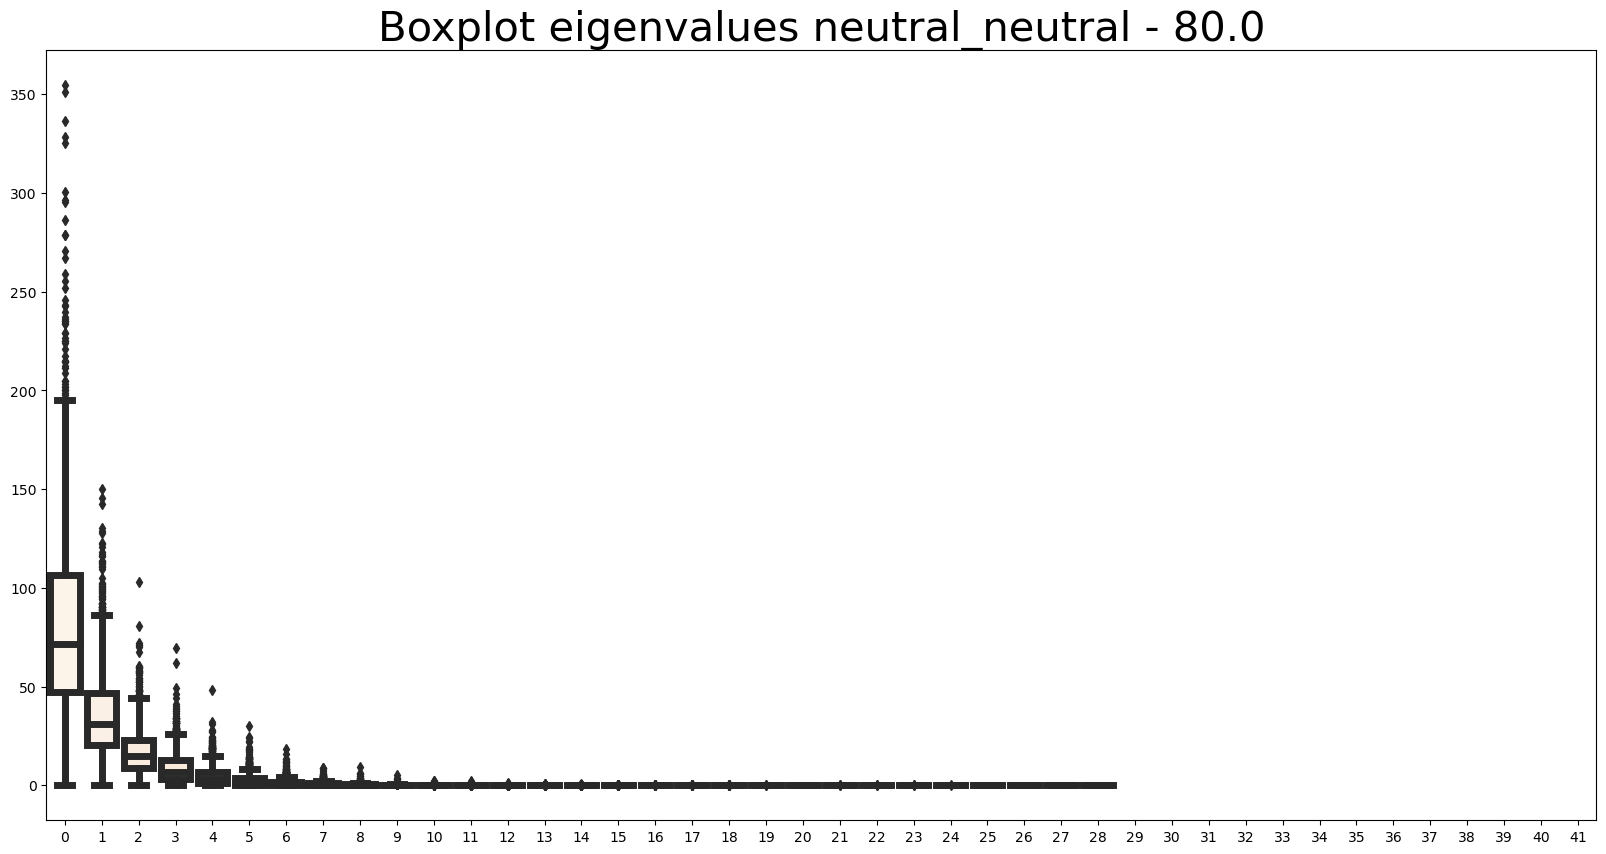

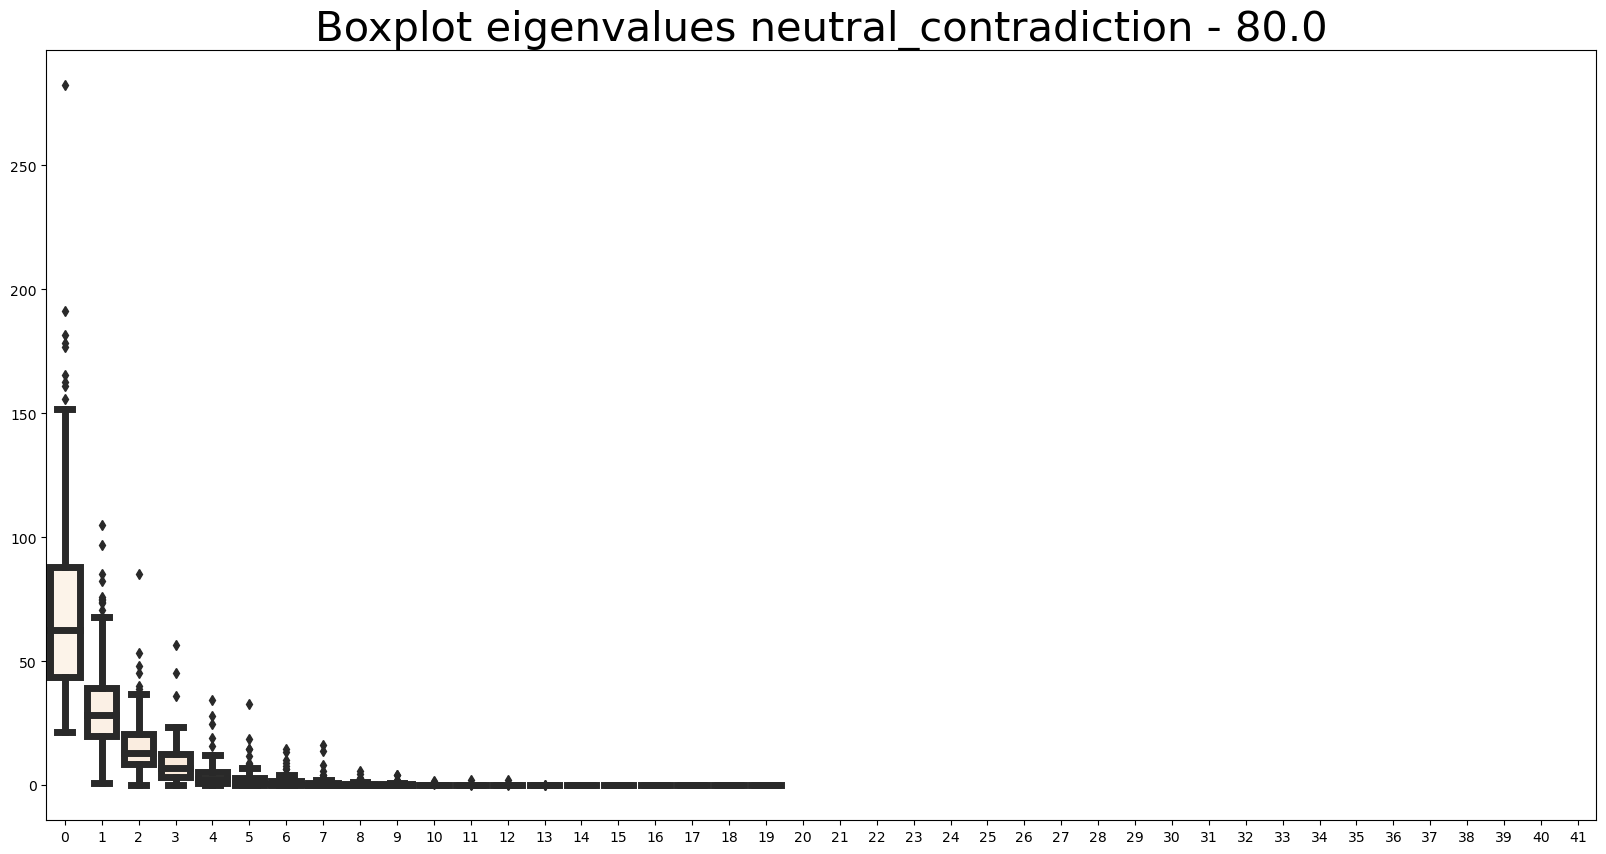

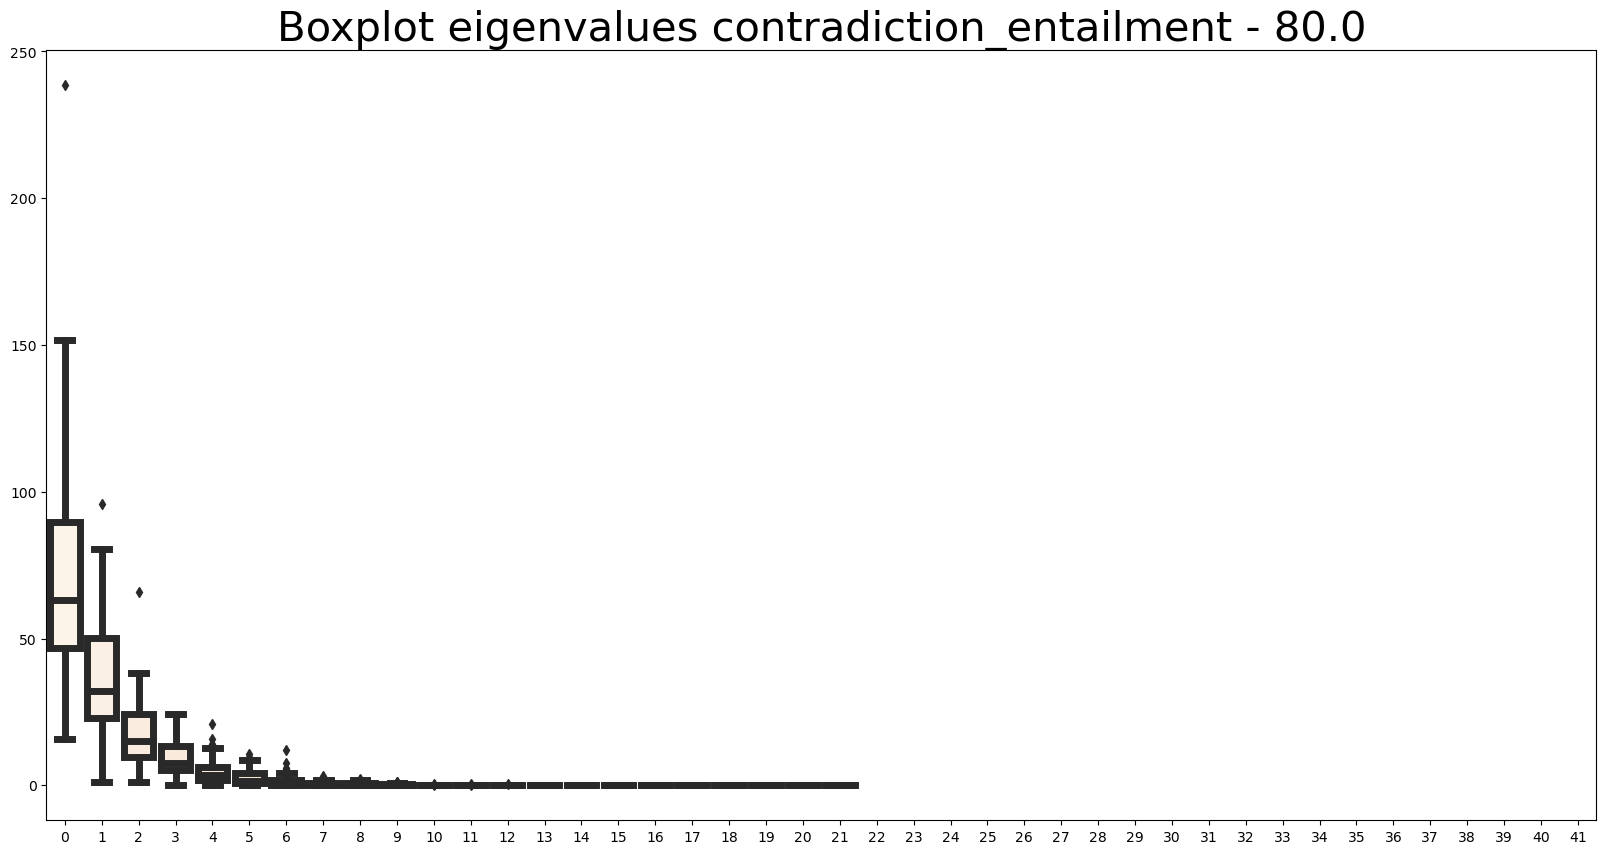

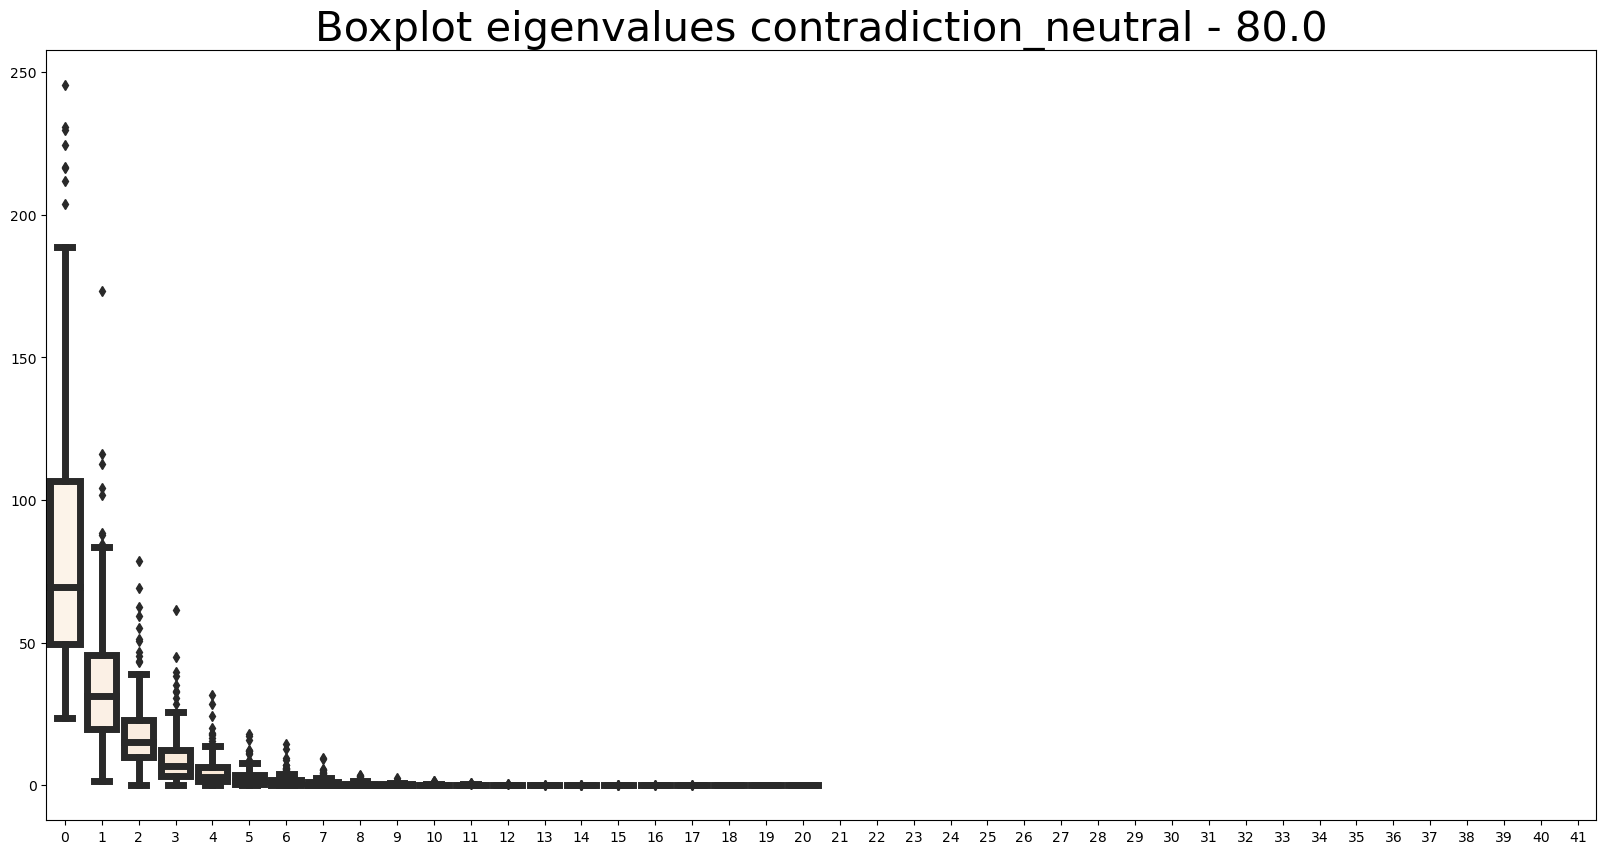

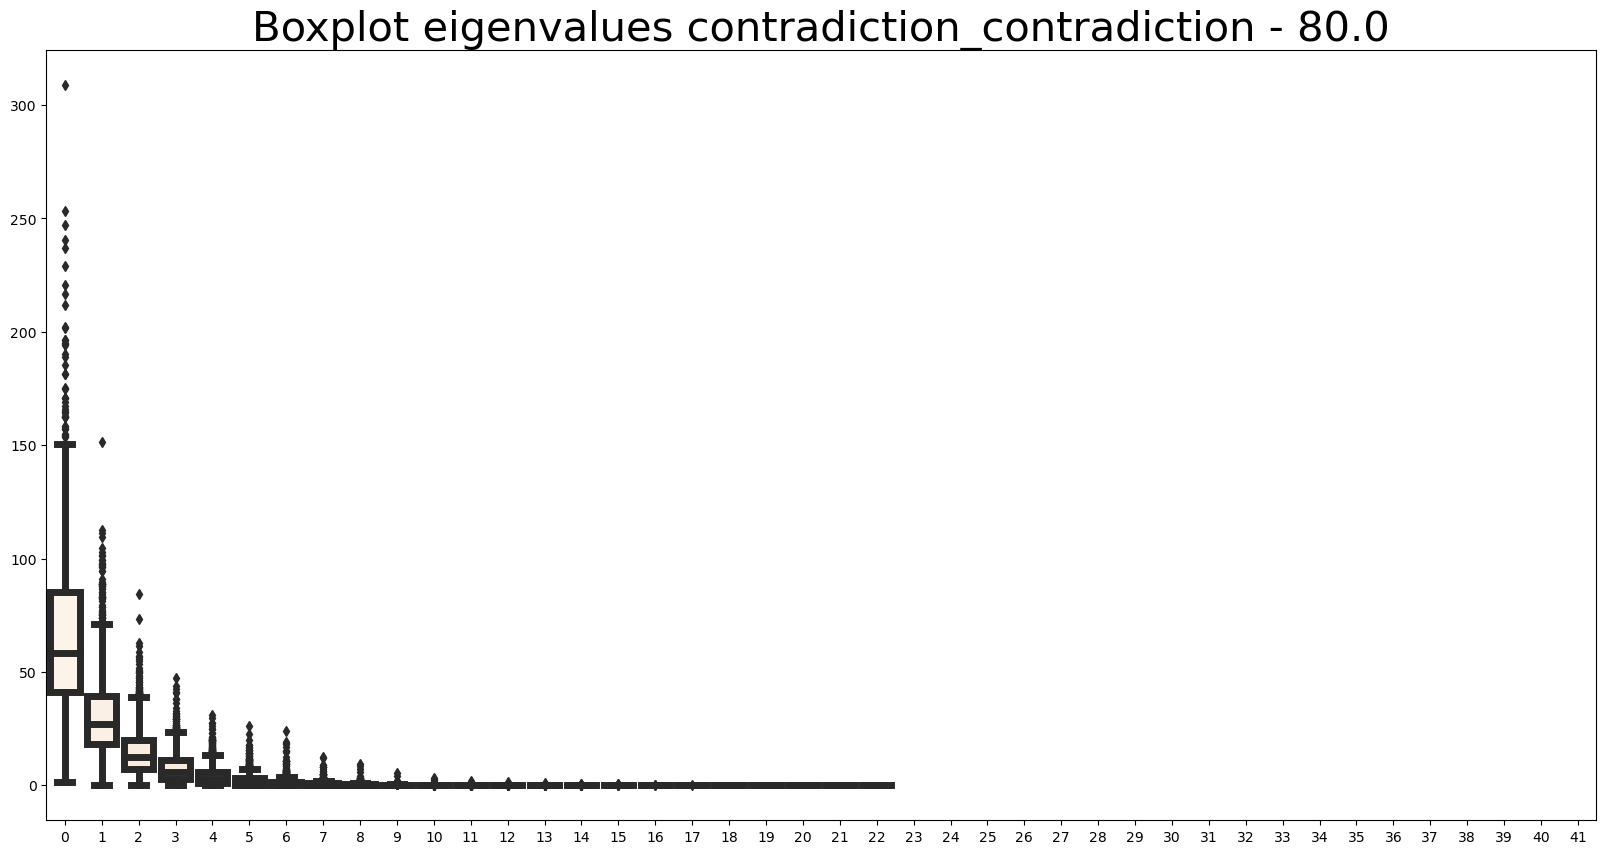

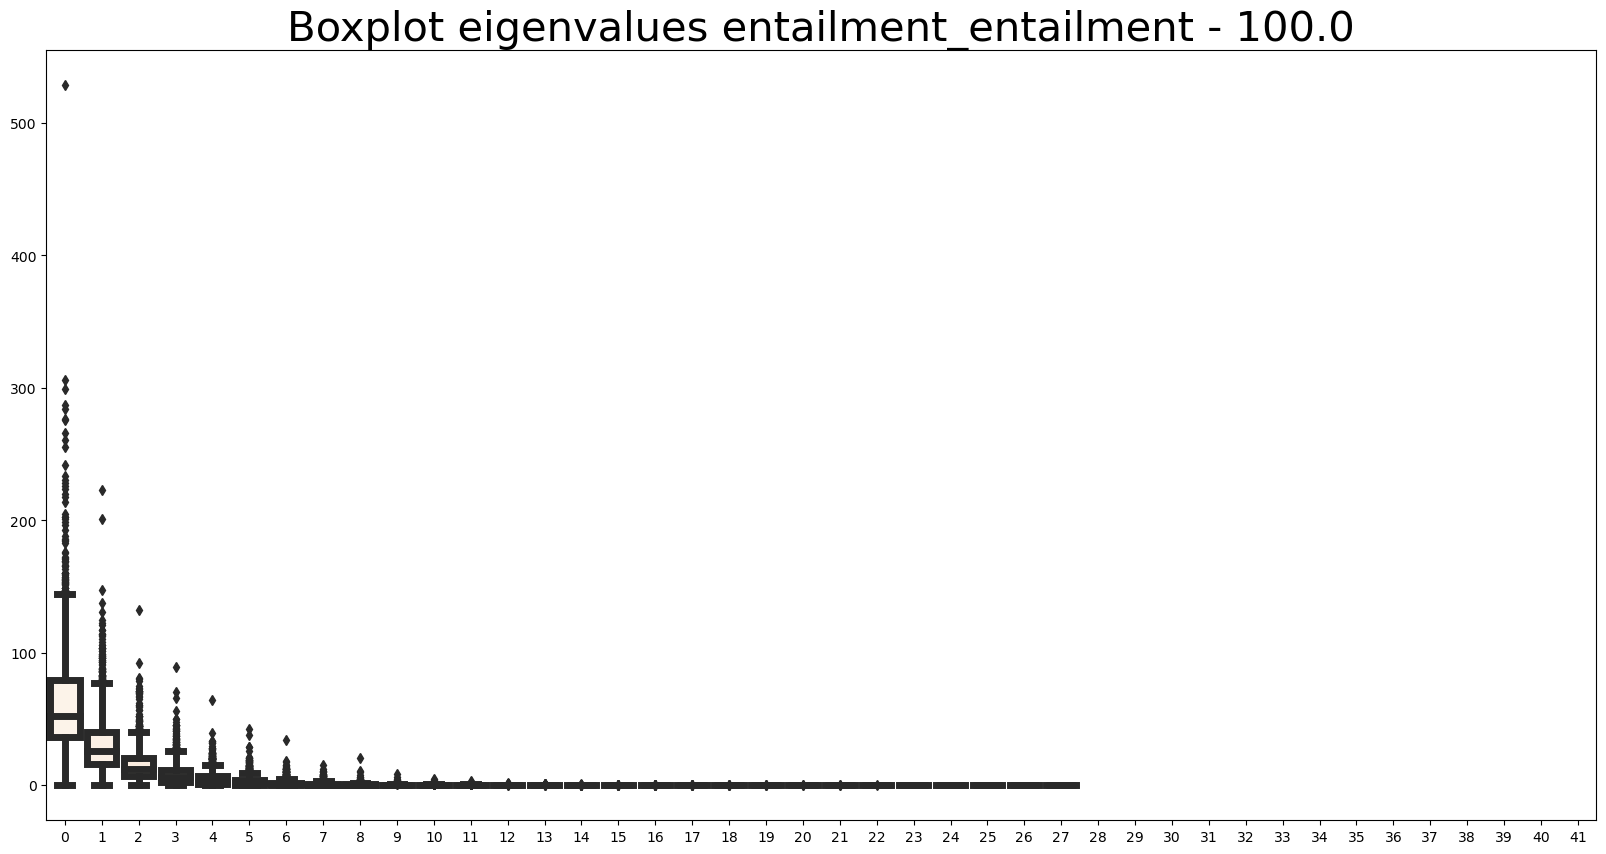

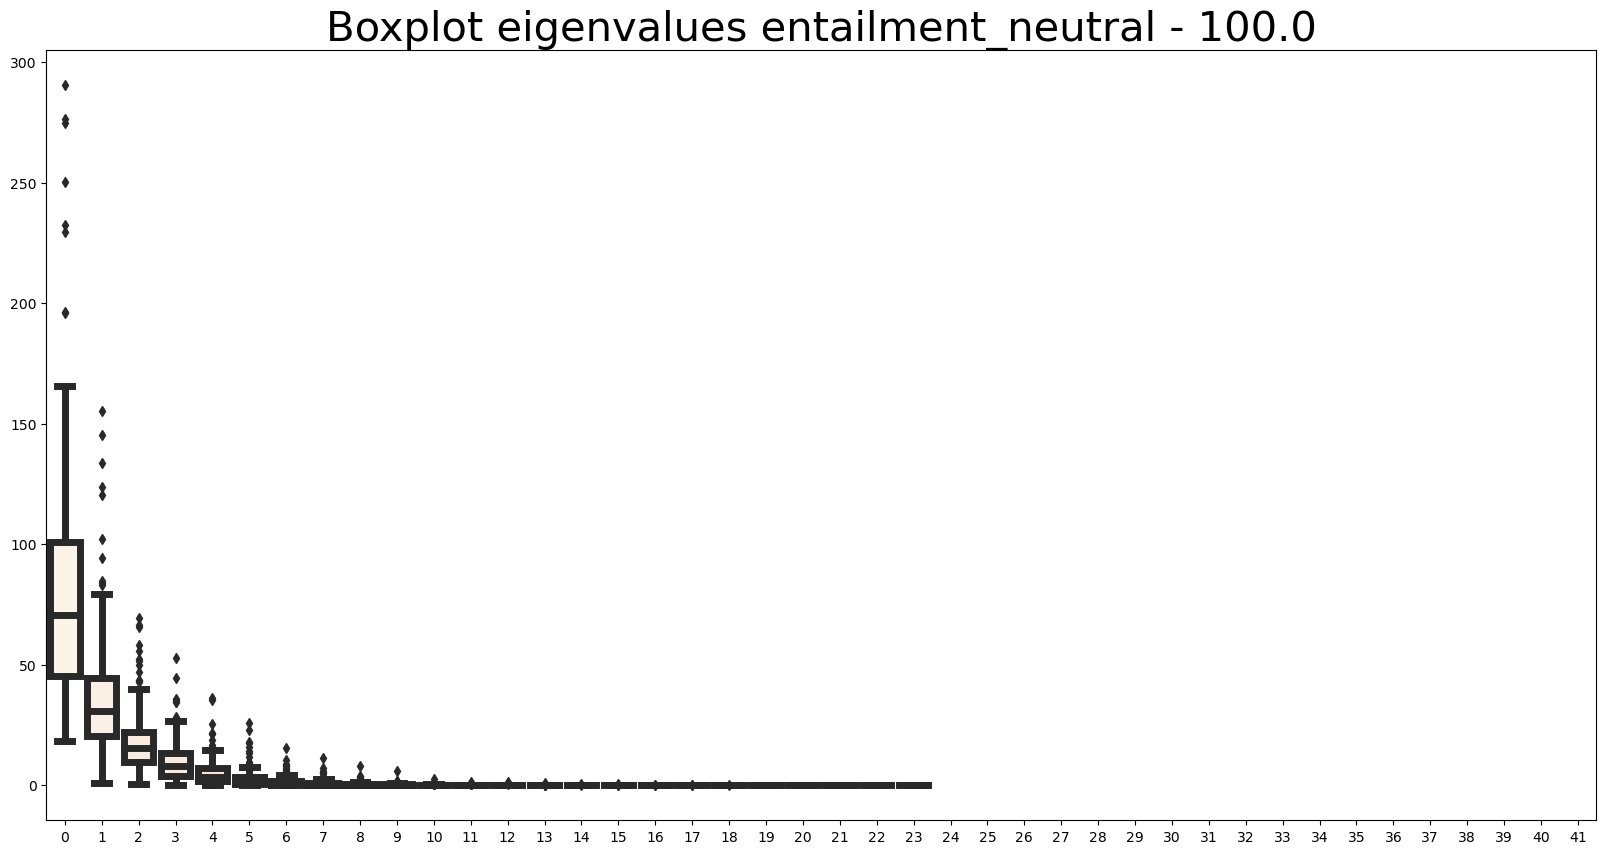

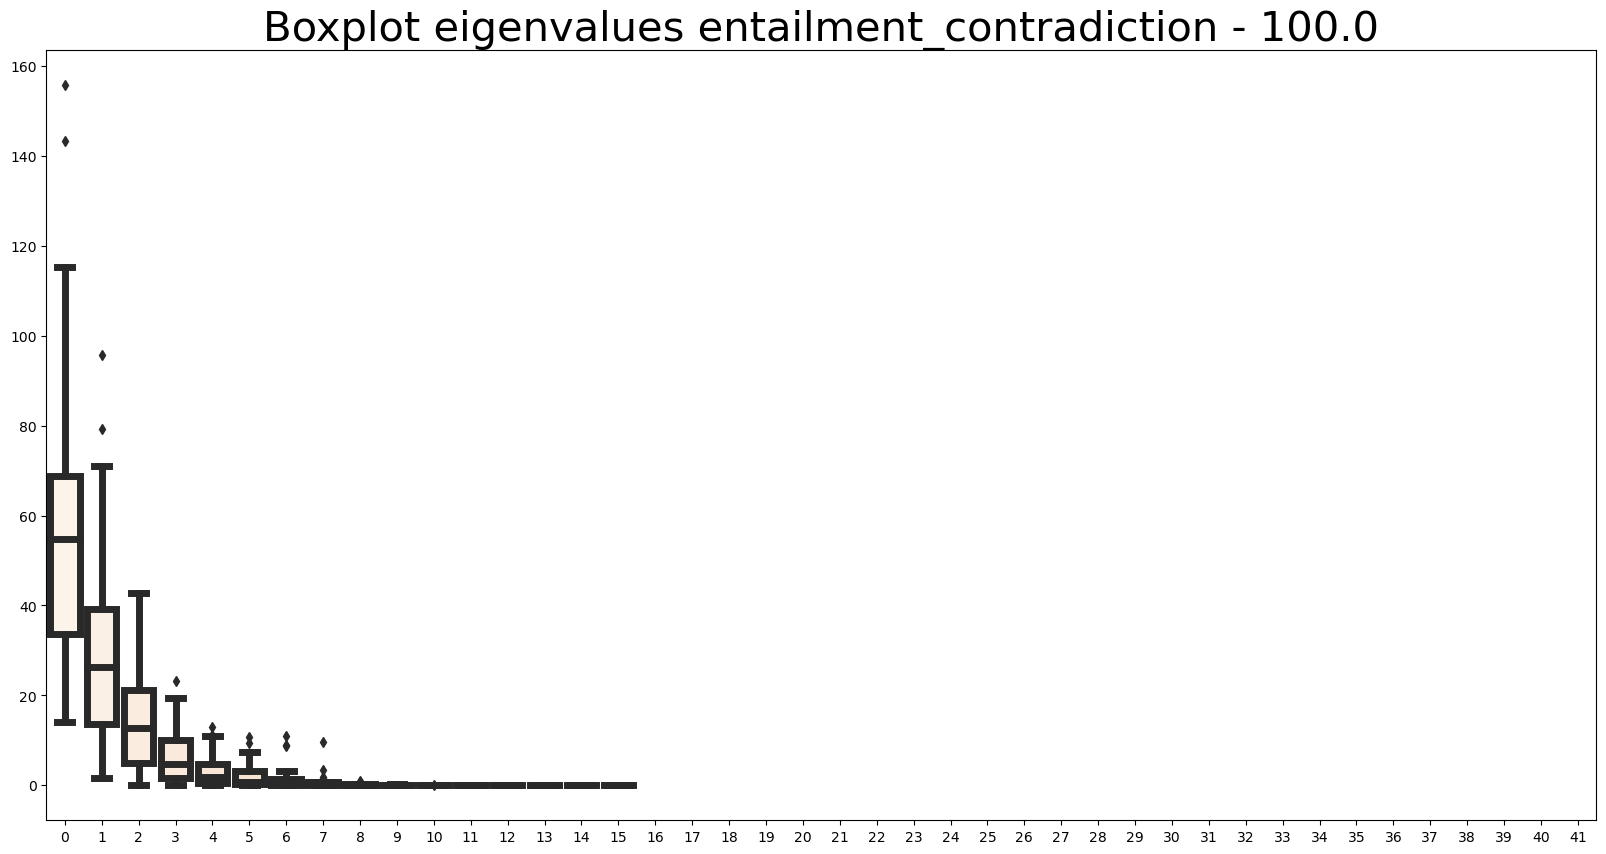

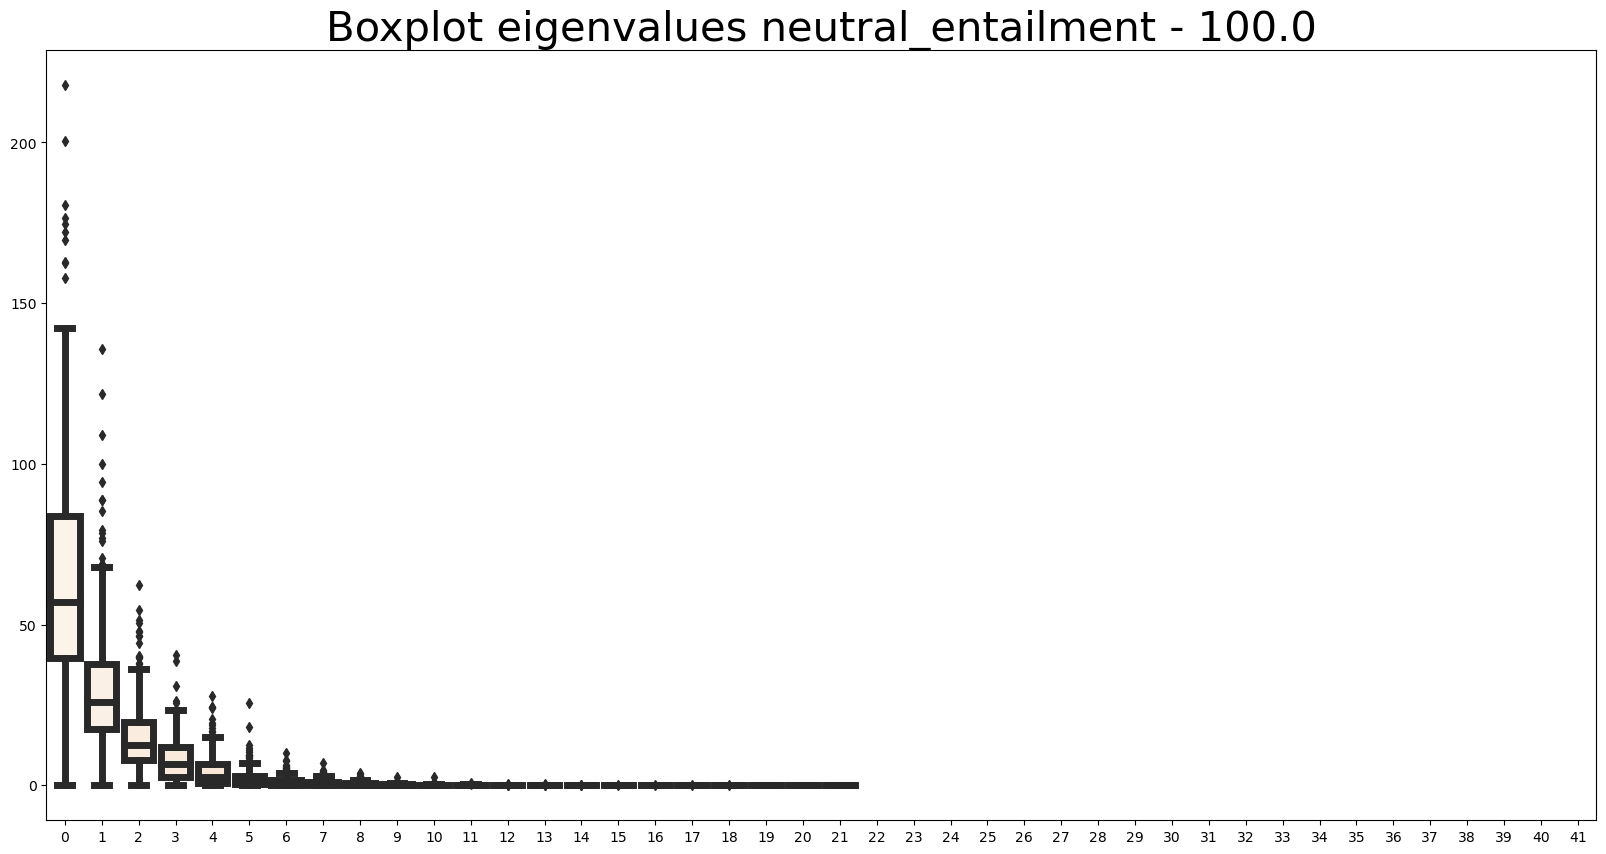

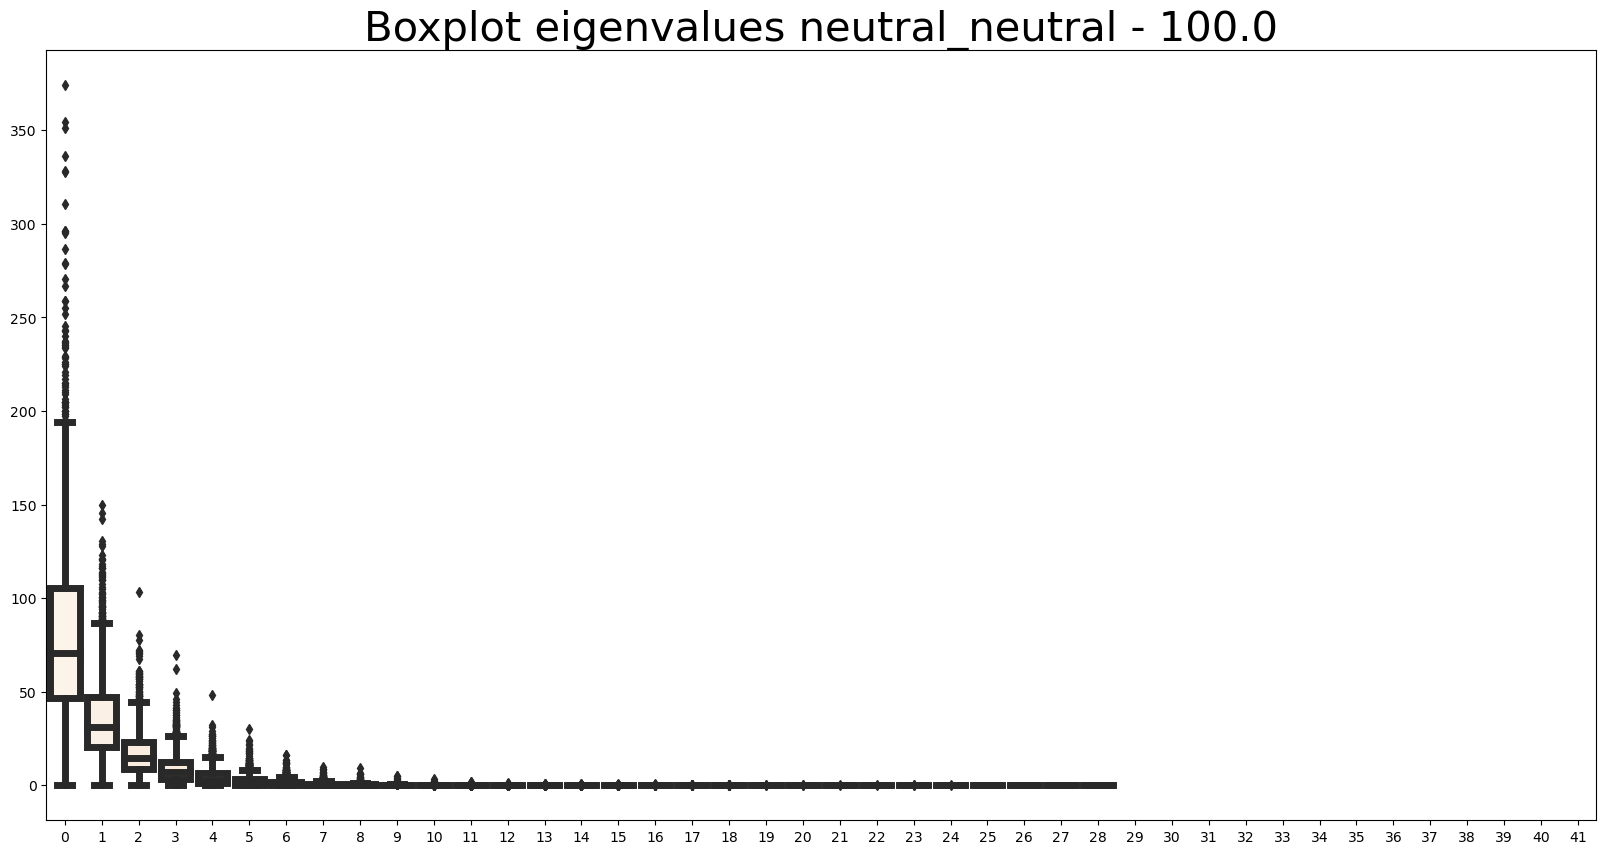

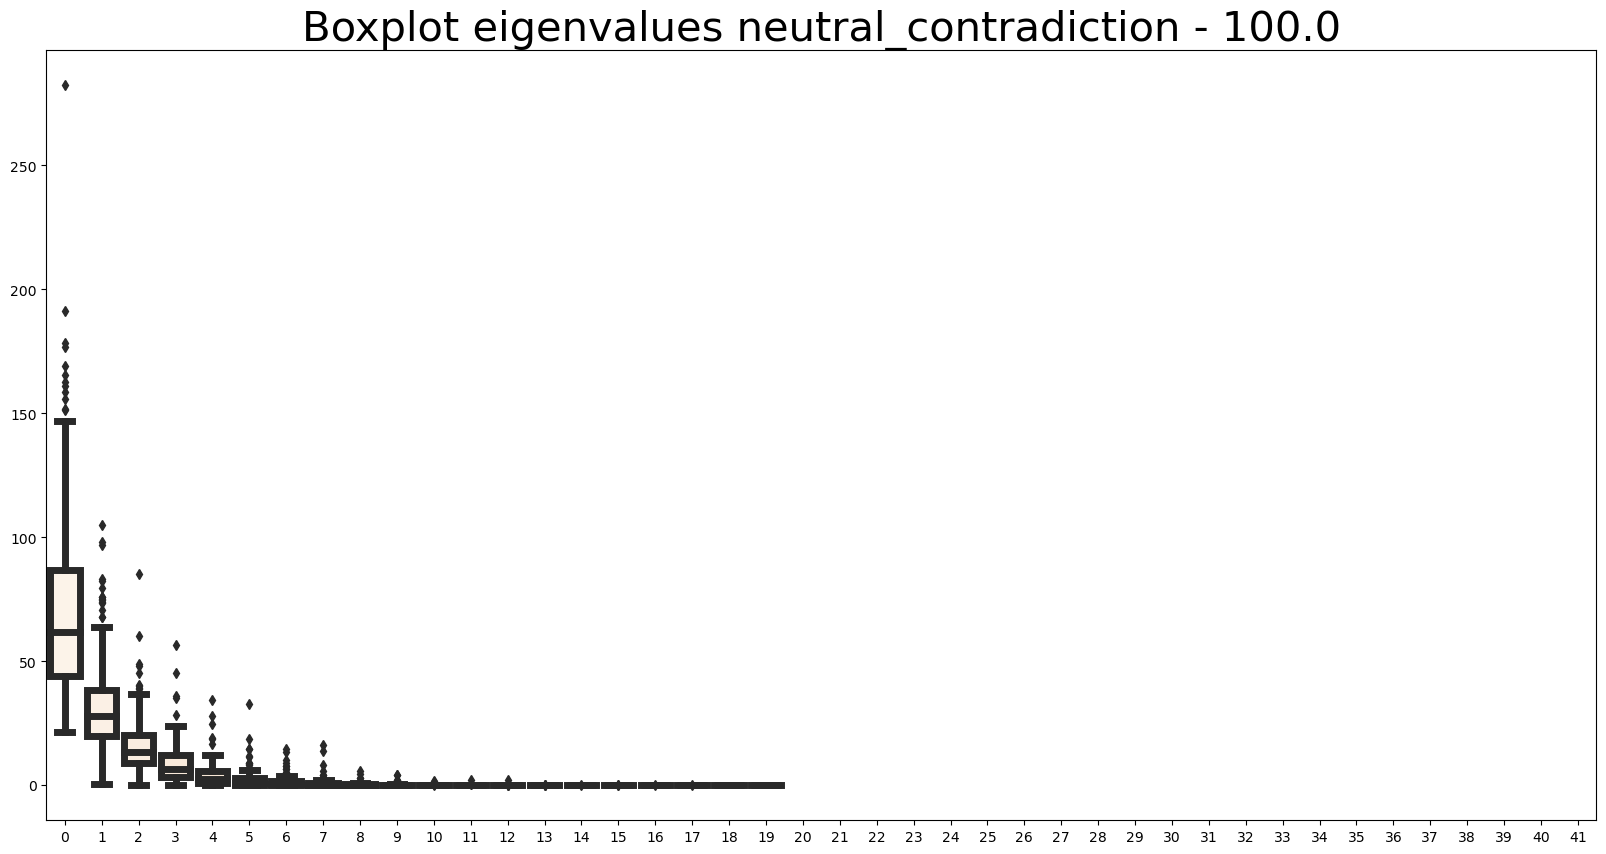

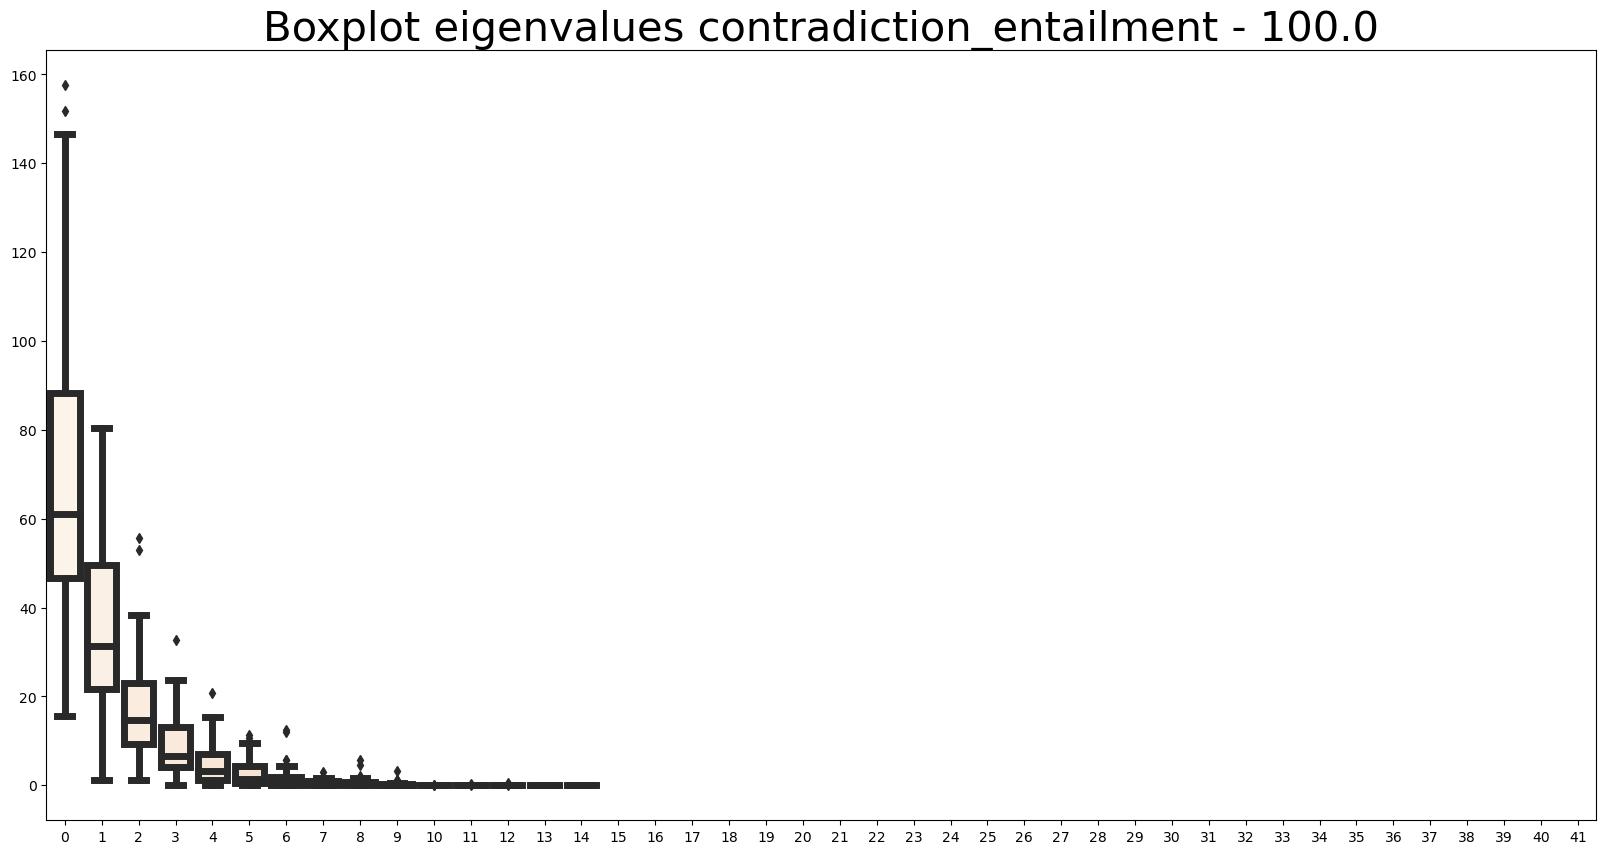

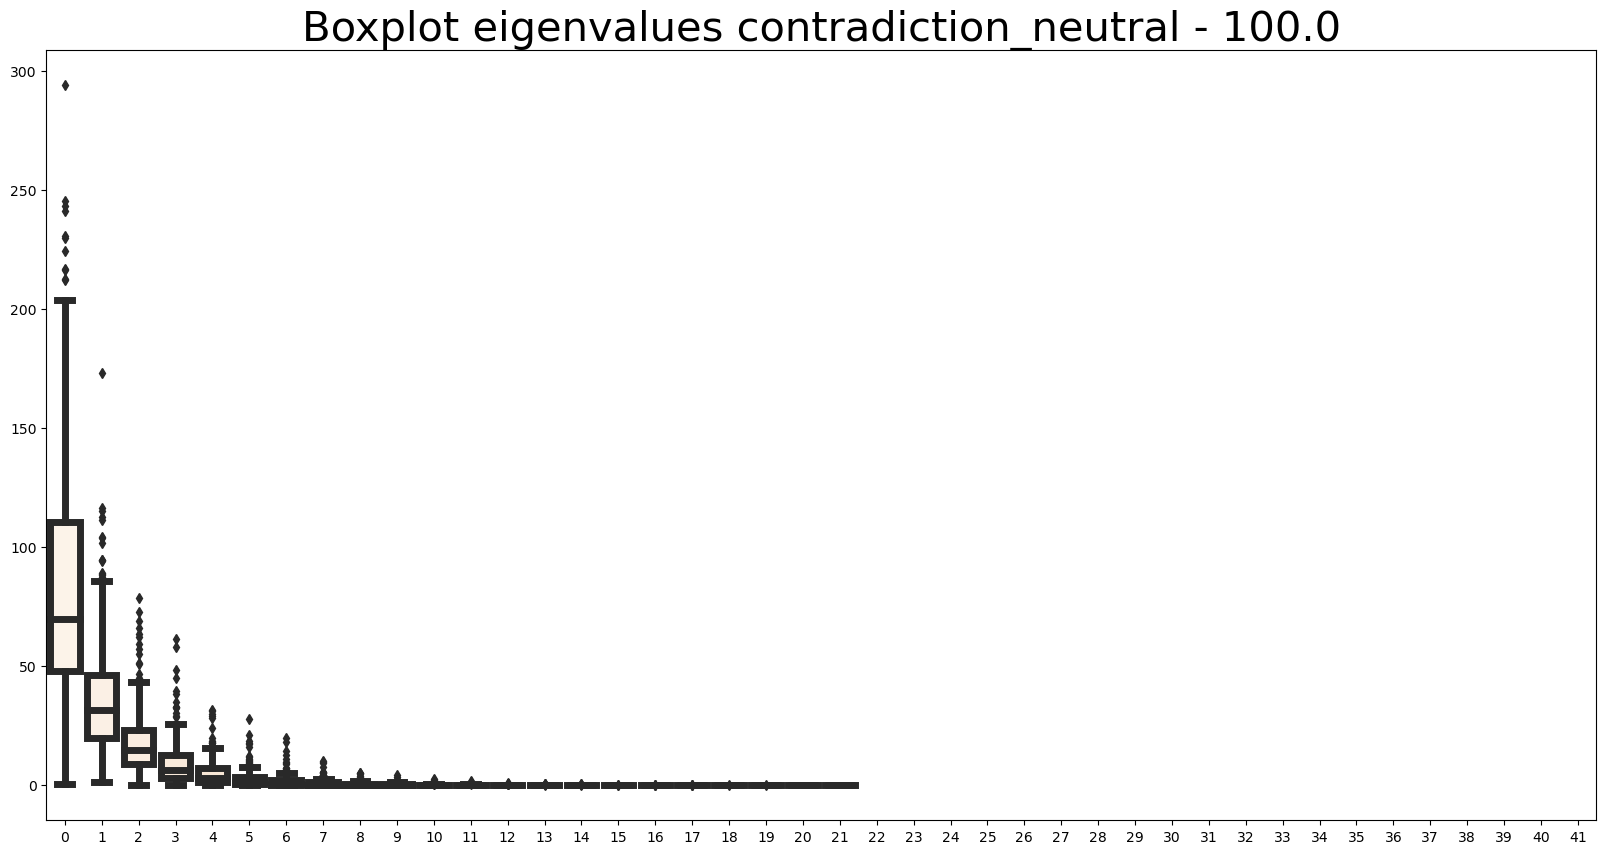

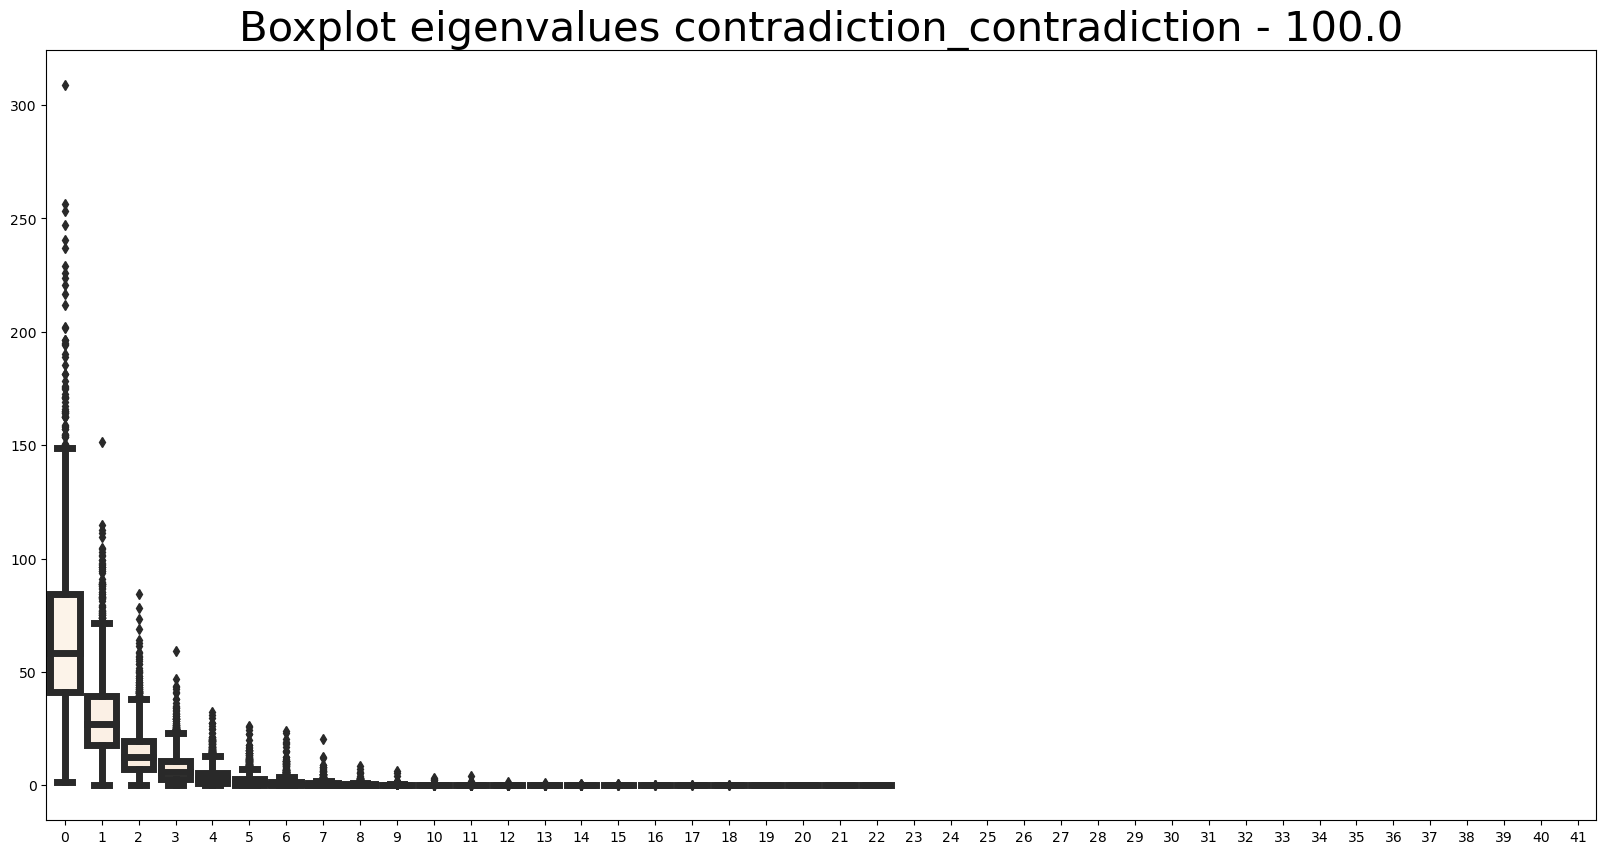

In [47]:
for gb in grupos_box:
    for et in eti_box:
        df=dfn[(dfn["grupo"]==gb) & (dfn["E_P"]==et)]
        lista_eigenvalues=[]
        for index,strings in df.iterrows():
            data=strings[6]
            #print(strings["E_P"],strings["grupo"])
            #print(data[0])
            #print(data[1:])
            for i in range(42):
                columna = [float(fila[i]) for fila in data if i < len(fila)]
                #print(columna)
                lista_eigenvalues.append(columna)
            fig2 = plt.figure(figsize=(20,10))
            #ax.tick_params(labelsize=10)
            #ax.grid(visible=True)
            plt.title("Boxplot eigenvalues "+et+" - "+str(gb),fontsize=30)
            bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")
            break
        

In [42]:
lista_eigenvalues

[[114.70648956298828,
  43.17726135253906,
  128.25914001464844,
  100.27702331542969,
  122.92427062988281,
  27.77812957763672,
  75.40182495117188,
  27.294857025146484,
  94.30683898925781,
  53.002262115478516,
  64.0809097290039,
  62.7680549621582,
  241.53981018066406,
  35.9681282043457,
  41.35331726074219,
  42.26338577270508,
  66.86153411865234,
  76.7496109008789,
  29.010631561279297,
  55.83342361450195,
  37.70979690551758,
  24.233003616333008,
  50.366119384765625,
  41.874629974365234,
  59.71815872192383,
  51.5324821472168,
  62.60270309448242,
  26.680713653564453,
  18.384389877319336,
  45.69569396972656,
  24.51869773864746,
  46.61131286621094,
  62.54122543334961,
  53.44395065307617,
  22.142074584960938,
  38.068145751953125,
  34.066959381103516,
  49.48790740966797,
  32.025020599365234,
  76.09321594238281,
  52.31376647949219,
  156.06166076660156,
  125.40757751464844,
  31.88990592956543,
  37.774078369140625,
  47.52901840209961,
  110.9861831665039

([<matplotlib.axis.XTick at 0x246c3f9f3d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41')])

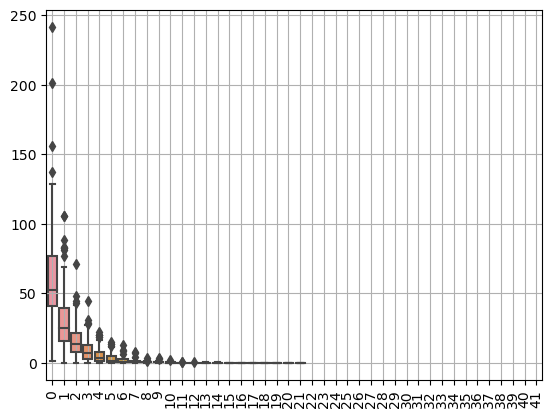

In [43]:
sns.boxplot(data=lista_eigenvalues)
plt.grid()
plt.xticks(np.arange(42),rotation=90)

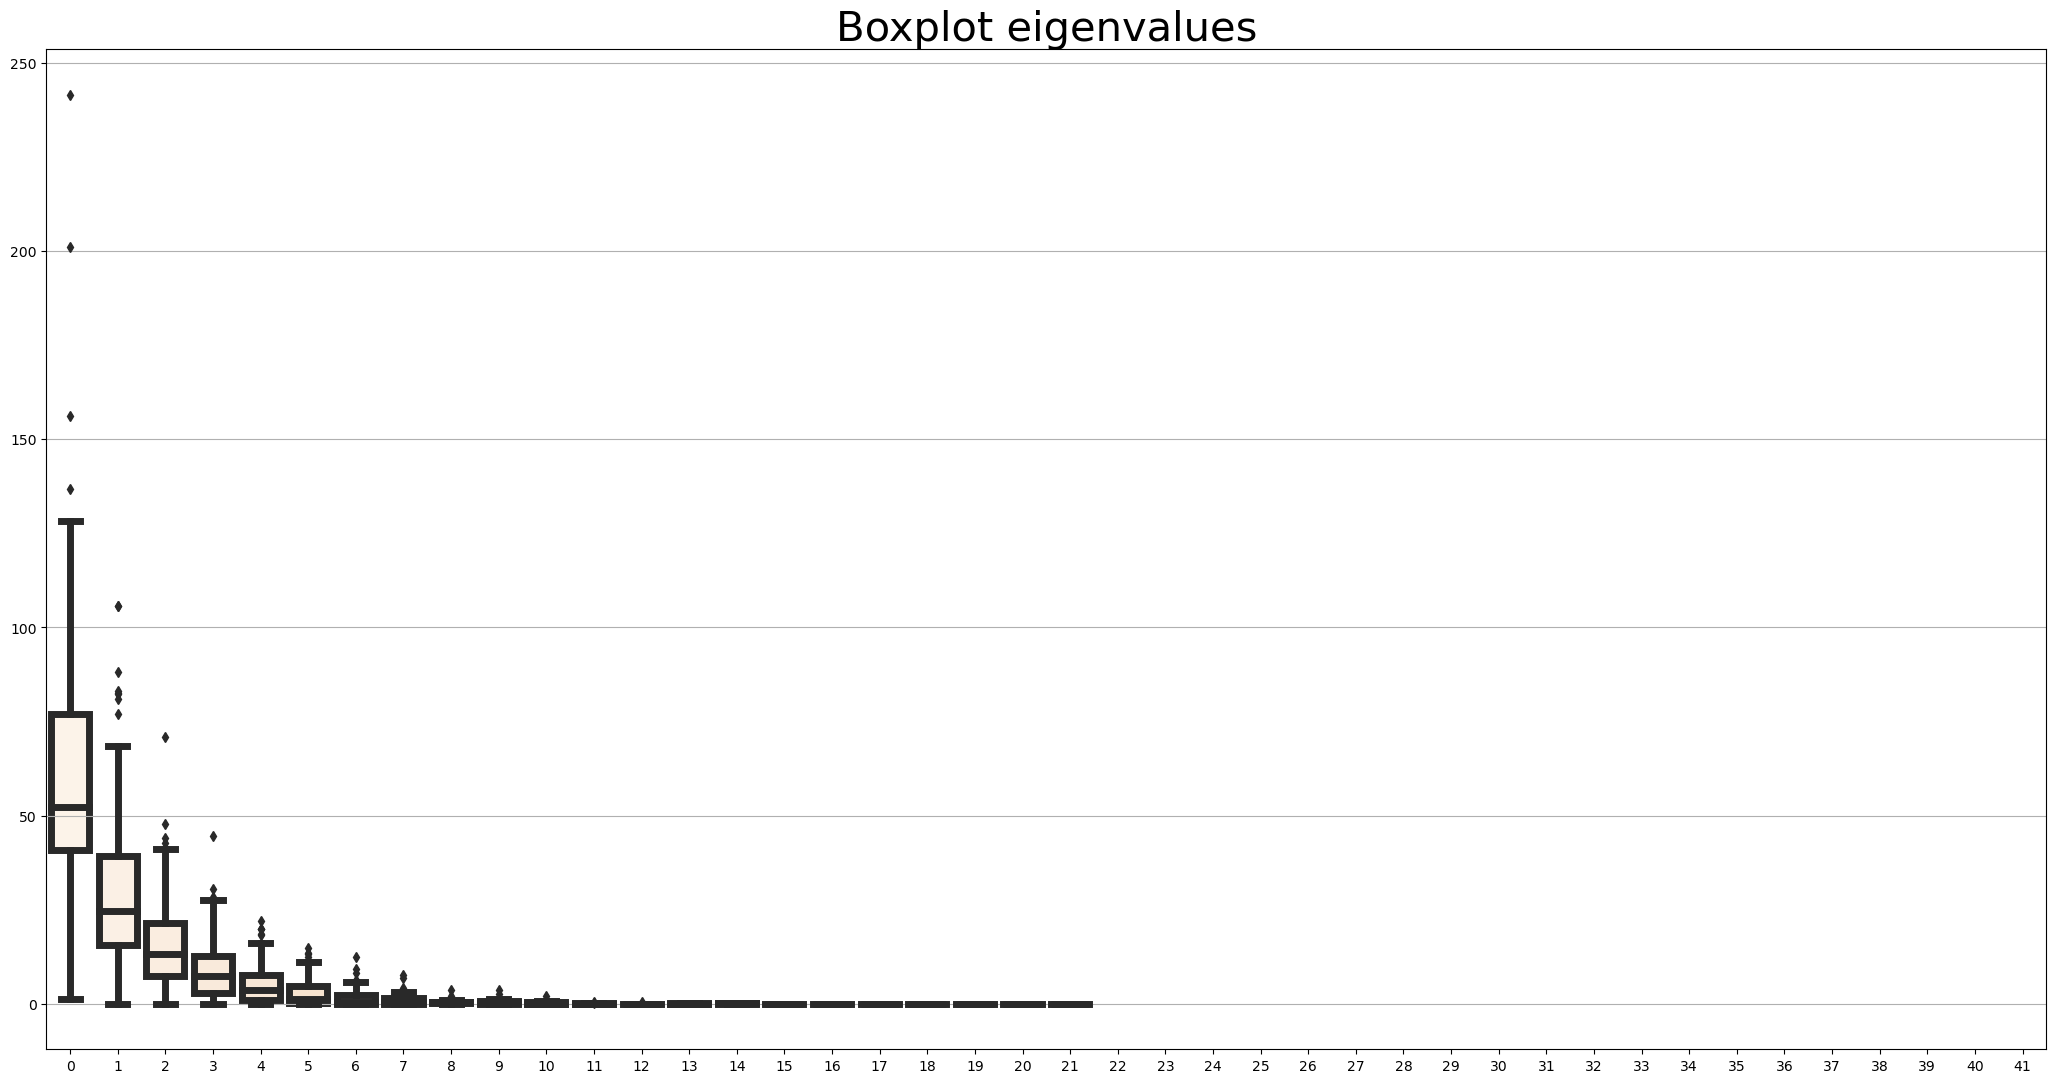

In [44]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=10)
ax.grid(visible=True)
plt.title("Boxplot eigenvalues",fontsize=30)
bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")

In [45]:
s=np.transpose(m)*m

ValueError: operands could not be broadcast together with shapes (16,7) (7,16) 

In [ ]:
m_n=normalize_2d(s)

In [46]:
x, v = np.linalg.eig (m_n)

NameError: name 'm_n' is not defined

In [ ]:
x

array([ 8.2198036e-01,  4.4953737e-01,  3.3778334e-01,  9.0338141e-02,
        1.5342963e-03, -1.3962749e-03, -1.1090860e-03,  5.2070891e-04,
       -8.6099935e-05,  2.1168440e-04,  1.3158313e-04,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
v

array([[-1.8347610e-03,  8.8550820e-04, -2.9179843e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.8047651e-02,  5.6653398e-01, -8.1549281e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.6764369e-01,  7.7380818e-01,  5.7283217e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=float32)

In [ ]:
len(v)

42